# Introduction
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. For further details about the dataset please refer to this [Kaggle link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

In this kernel we will be analyzing credit card transaction dataset and build machine learning model(s) to be able to predict fraud credit card transactions. 

# Content
1. [Importing Libraries and the Dataset](#1) 
2. [Data Exploratory Analysis](#2) <br> 
    2.1 [Dataset Exploration](#2.1) <br> 
    2.2 [Transaction Time Series Analysis](#2.2) <br> 
    2.3 [Statistical Analysis](#2.3) <br> 
    2.4 [Feature Impact Analysis](#2.4) <br> 
    2.5 [Feature Distribution Analysis](#2.5) <br> 
    2.6 [Correlation Analysis](#2.6) <br> 
    2.7 [Transactions with Zero Amount](#2.7) <br>
    2.8 [Duplicate Transactions](#2.8) <br>
3. [Baseline Performance of Predictive Models ](#3) <br>
    3.1 [Baseline Performance of Selected Predictive Models](#3.1) <br>
    3.2 [Removing Duplicates and its Impact on Predictive Model Performance](#3.2) <br>
    3.3 [Computing Predictive Model Baseline Cross Validation Scores](#3.3) 
4. [Outlier Detection](#4) 
5. [Feature Scaling](#5) 
6. [Strategies to Deal with Imbalanced Data](#6)  
    6.1 [Data-level Pre-processing](#6.1) <br>
    ◦ [Data Oversampling](#6.1.1)   <br>
    ◦ [Data Undersampling](#6.1.2) <br>
    ◦ [Combination of Data Oversampling Undersampling](#6.1.3)    
    6.2 [Cost Sensitive Learning](#6.2) <br>
    6.3 [Ensemble Learning](#6.3) <br>
7. [Feature Selection](#7) <br>
    7.1 [Filter Based Feature Selection Methods](#7.1) <br>
    7.2 [Model Embedded Feature Selection Methods](#7.2) <br>
    7.3 [Recersive Feature Elimination Method](#7.3) 
8. [Hyperparameter Tuning](#8)

## 1. Importing Libraries and the Dataset <a id='1'></a>
Importing necessary Python libraries and the credit card dataset 

### 1.1 Importing Libraries <a id='1.1'></a>

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import recall_score, precision_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,  precision_recall_curve 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection

pd.set_option("display.max_columns", None)

### 1.2 Loading the Dataset <a id='1.2'></a>

In [768]:
# Loading the dataset
df = pd.read_csv("creditcard.csv")

## 2. Data Exploratory Analysis <a id='2'></a>
Analyze the credit card dataset, get to know about the features and create insights on their behaviours.

### 2.1 Dataset Exploration <a id='2.1'></a>
- All attributes are in float format and target 'Class' consists of integer values
- Dataset consists of 284,807 transactions and 30 features (V1-V28, Time and Amount)
- Anonymized features V1-V28 are already scaled whereas Time and Amount features are showing greater variance 
- Time feature spans from 0 to 172,792 (in secs) which is equivalent to roughly 2 days of transactions 
- Amount feature varies from 0€ to 25,691€ with mean of 88.3€ and standard deviation 250.1€

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [4]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

#### 2.1.1 Checking for missing data
There are no missing data in any of the features in the dataset, which eliminates a potential data imputation efforts. 

In [7]:
missing_data = df.isnull().sum().sort_values(ascending = False)
missing_data_ratio = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
pd.concat([missing_data, missing_data_ratio], axis=1, keys=['Missing rows', 'Missing Rows Percentage']).transpose()

Time  V16  Amount  V28  V27  V26  V25  V24  V23  V22  \
Missing rows              0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Missing Rows Percentage   0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                         V21  V20  V19  V18  V17  V15   V1  V14  V13  V12  \
Missing rows             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Missing Rows Percentage  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                         V11  V10   V9   V8   V7   V6   V5   V4   V3   V2  \
Missing rows             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Missing Rows Percentage  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                         Class  
Missing rows               0.0  
Missing Rows Percentage    0.0

#### 2.1.2 Class Distribution
Dataset is highly skewed as the distribution of fraud transactions are only comprising of 0.17% of the dataset

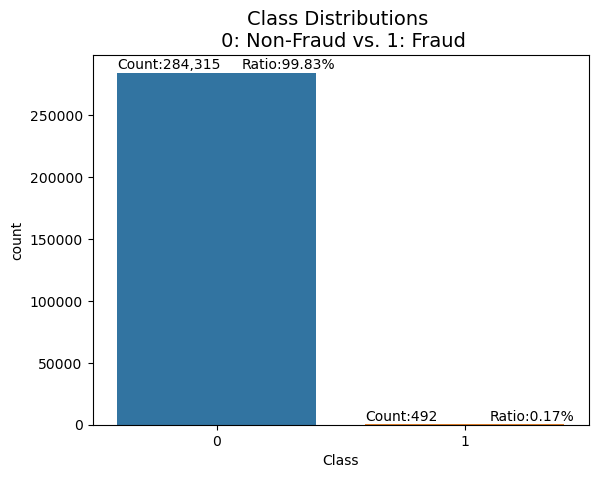

In [9]:
plt.title('Class Distributions \n 0: Non-Fraud vs. 1: Fraud', fontsize=14)

ax = sns.countplot(x="Class", data=df)

for p in ax.patches:
    ax.annotate('Count:{:,}'.format(p.get_height()), (p.get_x(), p.get_height()+3000))
    ax.annotate('Ratio:{:.2f}%'.format(p.get_height()/len(df)*100), (p.get_x()+0.5, p.get_height()+3000))

plt.show()

### 2.2 Transaction Time Series Analysis <a id='2.2'></a>
The credit card dataset contains transactions over 2 days. Therefore, it would be interesting to find out how transaction count and amount behaves over time.

#### 2.2.1 Transaction Count Time Series Analysis
- Normally a similar analysis will require much more than 2 days of transactions to identify more accuracte trends
- Converting seconds into hour to analyze the transaction amount trend over hours
- Geniune transaction activity is the busiest between 9AM-10PM with night time having the least transactions
- Fraud transactions on the other hand is less predictable with few local peaks distributed across the 48 hr time span

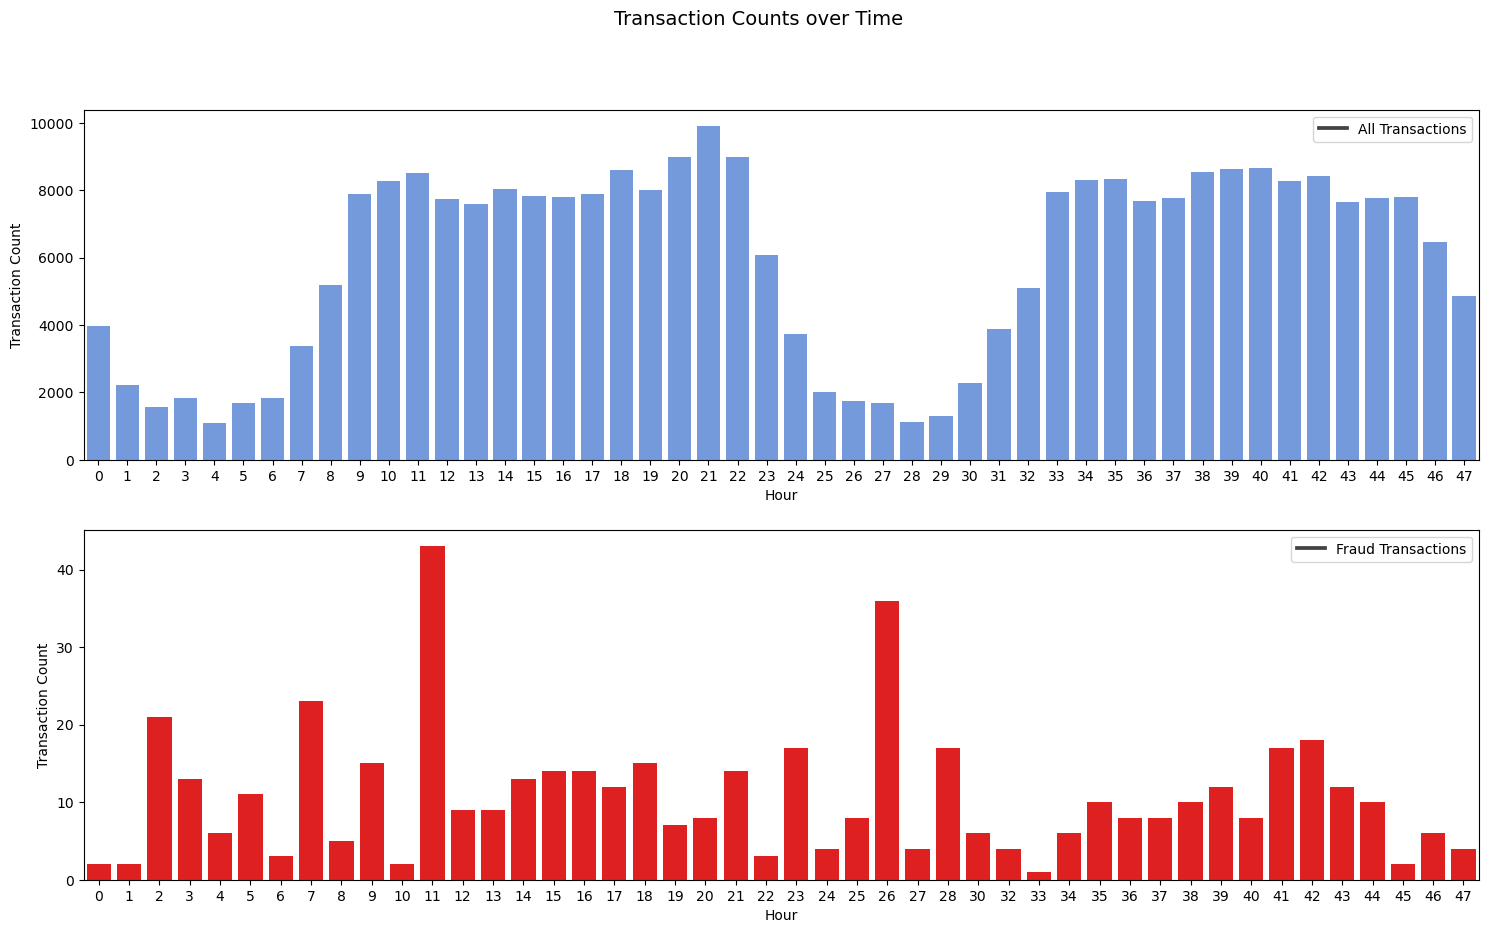

In [595]:
df_hour = df
df_hour['Hour'] = df_hour['Time'].apply(lambda x: np.floor(x / 3600)).astype(int)
df_by_hour = df_hour.groupby(['Hour'], as_index=False)['Amount'].count()
df_by_hour = df_by_hour.rename(columns={'Amount': 'Transaction Count'})

df_by_hour_groupby_class = df_hour.groupby(["Hour", "Class"], as_index=False)["Amount"].count()
df_by_hour_groupby_class = df_by_hour_groupby_class.rename(columns={'Amount': 'Transaction Count'})

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(18,10))

sns.barplot(x="Hour", y='Transaction Count', data=df_by_hour, color='cornflowerblue', ax=ax1)

sns.barplot(x="Hour", y='Transaction Count',
            data=df_by_hour_groupby_class.loc[df_by_hour_groupby_class.Class==1], 
            color='red', ax=ax2)

ax1.legend(labels=['All Transactions'])
ax2.legend(labels=['Fraud Transactions'])
plt.suptitle('Transaction Counts over Time', fontsize=14)
plt.show()

#### 2.2.2 Transaction Amount Time Series Analysis
- Very similar pattern compared to transaction count distibution analysis above
- Amount flactuation on fraud transactions considerably higher than geniune transactions, which makes it challanging to predict
- The highest peak on the transaction amount for fraud takes place around 11AM of the second day

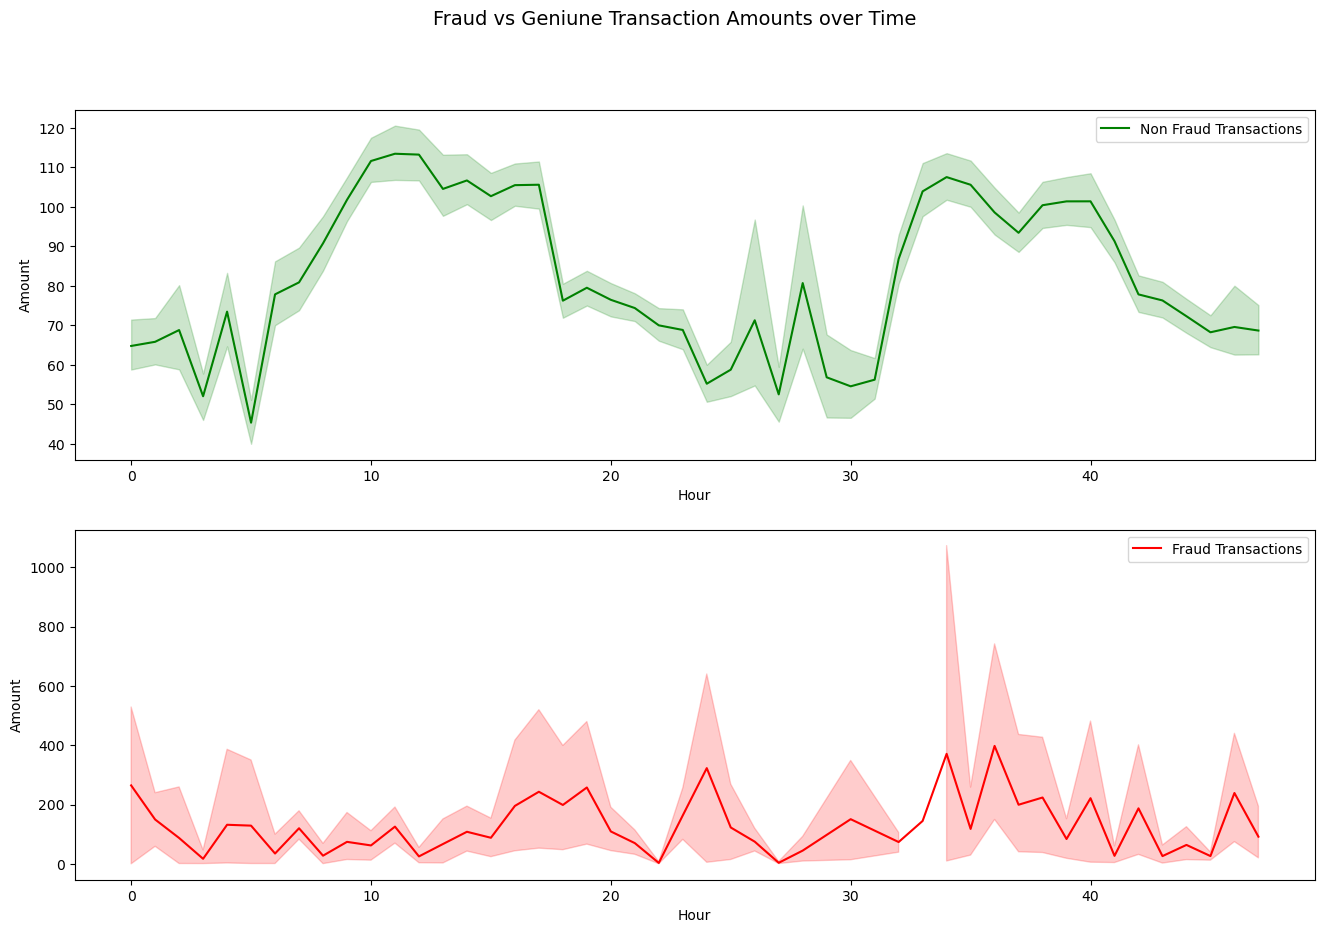

In [596]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,10))
sns.lineplot(ax = ax1, x="Hour", y="Amount", data=df_hour.loc[df_hour.Class==0], color="green")
sns.lineplot(ax = ax2, x="Hour", y="Amount", data=df_hour.loc[df_hour.Class==1], color="red")

ax1.legend(labels=['Non Fraud Transactions'])
ax2.legend(labels=['Fraud Transactions'])
plt.suptitle('Fraud vs Geniune Transaction Amounts over Time', fontsize=14)
plt.show()

### 2.3 Statistical Analysis on Fradulent and Geniune Transactions  <a id='2.3'></a>
- Fraud transactions compared to geniune kinds showing a higher mean (122€ vs. 88€) and slightly higher standard deviation (250€ vs. 256€)
- The boxplot shows considerably higher dispersion on transaction amounts in fraud transactions which is inline with the time series analysis above
- The most expensive transaction for geniune transaction  is 25,691.16€ vs fraud 2,125.87€

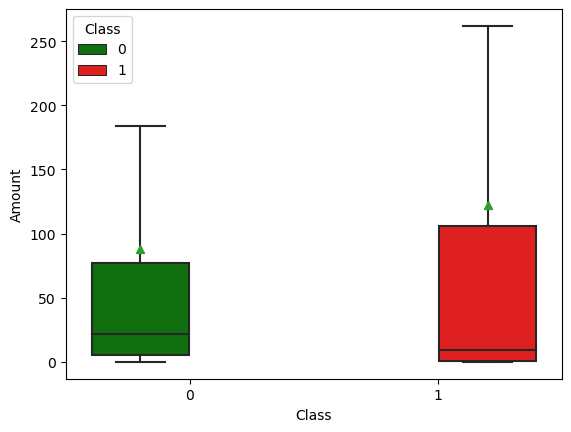

In [20]:
custom_pal = {Class: "r" if Class == 1 else "g" for Class in df.Class.unique()}
ax = sns.boxplot(x="Class", y="Amount", hue="Class",data=df, showfliers=False, palette=custom_pal, showmeans=True)
plt.show()

In [23]:
print('Statistical relationship between fradulent and geniune transaction amounts')
df_class_0 = df.loc[df["Class"] == 0]["Amount"]
df_class_1 = df.loc[df["Class"] == 1]["Amount"]

df_class_0_stats = df_class_0.describe().to_frame(name='Geniune').round(2)
df_class_1_stats = df_class_1.describe().to_frame(name='Fraud').round(2)
df_amount_stats = pd.concat([df_class_0_stats, df_class_1_stats], axis=1)
display(df_amount_stats)

Statistical relationship between fradulent and geniune transaction amounts


Geniune    Fraud
count  284315.00   492.00
mean       88.29   122.21
std       250.11   256.68
min         0.00     0.00
25%         5.65     1.00
50%        22.00     9.25
75%        77.05   105.89
max     25691.16  2125.87

### 2.4 Feature impact analysis on the target class <a id='2.4'></a>
- Features: V4, V11 and V19 has +'ve correleation with fraud transactions
- Features: V1, V3, V9, V10, V12, V14, V16, V17, V18 has -'ve correleation with fraud transactions
- Box plots shows that almost all features contain outliers

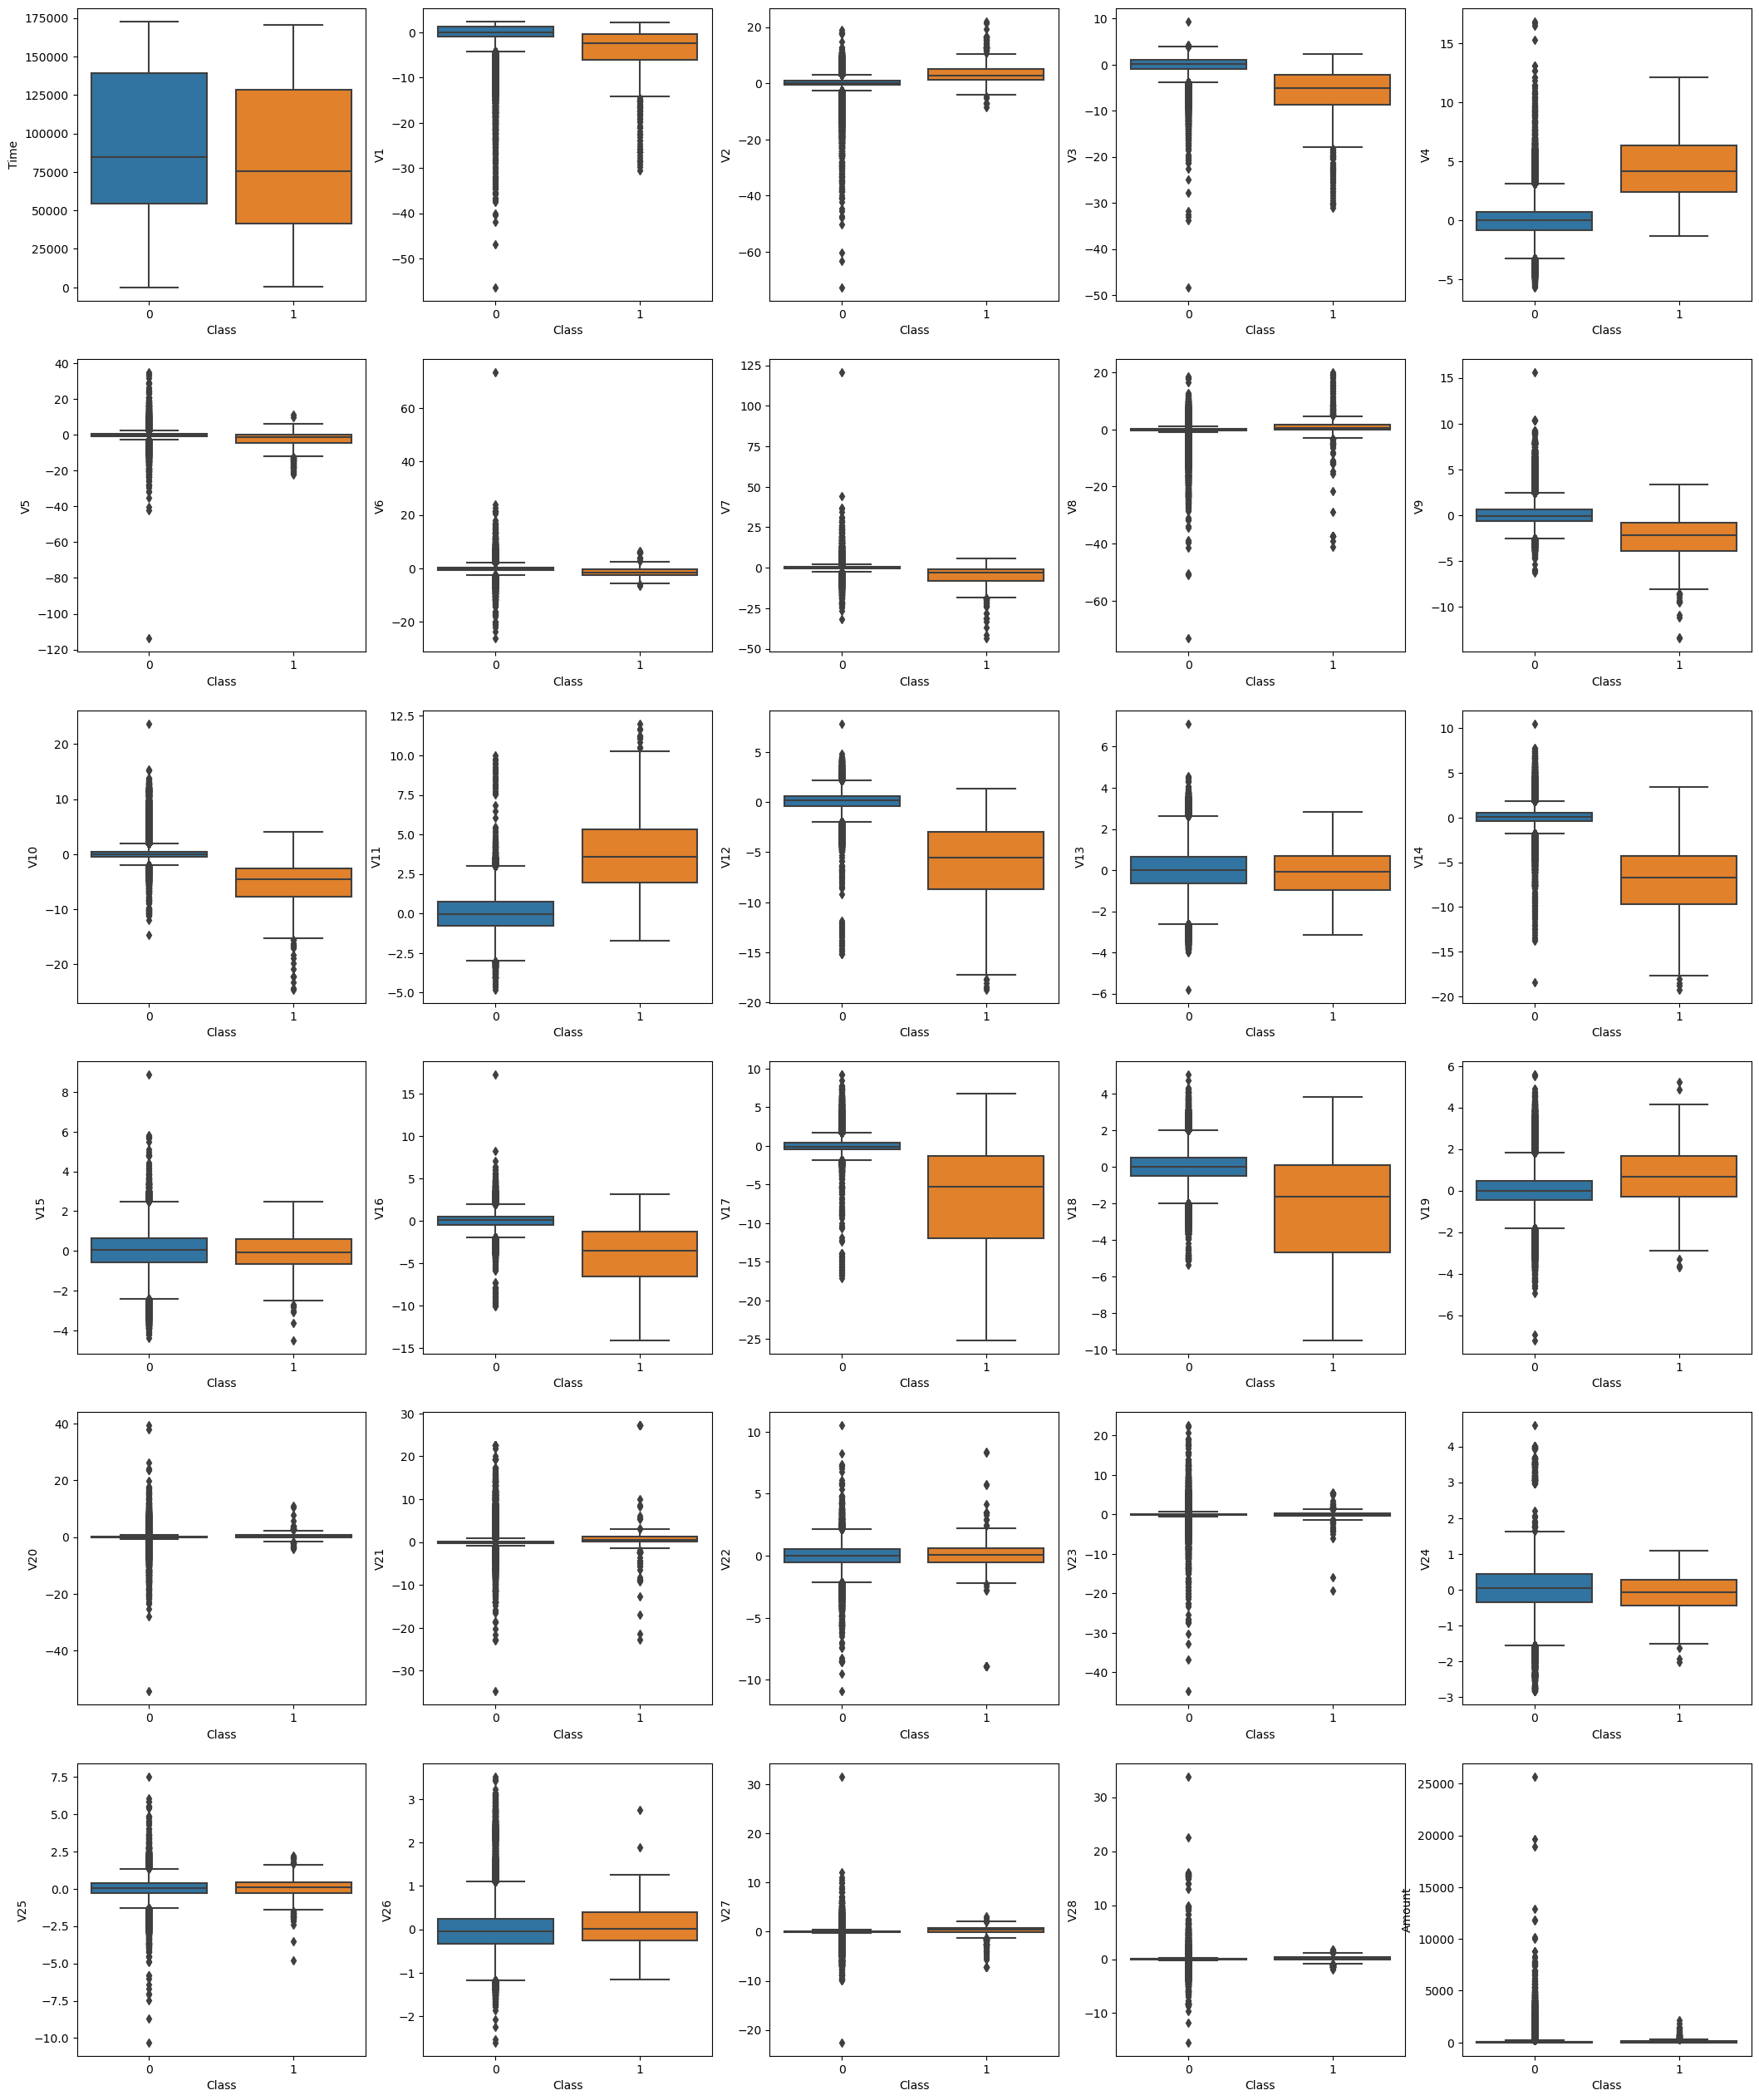

In [43]:
# Custom function to draw multivarient box plot to understand the relationship between attributes and the target
def draw_multivarient_box_plot(dataset, rows, cols):
    
    features = dataset.columns.values
    number_of_features=len(features)

    fig, axes=plt.subplots(rows,cols, figsize=(26,32))

    counter=0
    
    for i in range(rows):
        for j in range(cols):
            sns.boxplot(x='Class', y=features[counter],data=dataset, ax=axes[i][j])            
            counter+=1
            if counter==(number_of_features-1,):
                break
                

draw_multivarient_box_plot(df, 6, 5)

### 2.5 Feature Distribution Analysis <a id='2.5'></a>
- Determining the distribution of features is crucial for feature scaling and outlier detection
- All features are showing close to normal distribution except the features: 'Time', 'Amount' and 'V1'

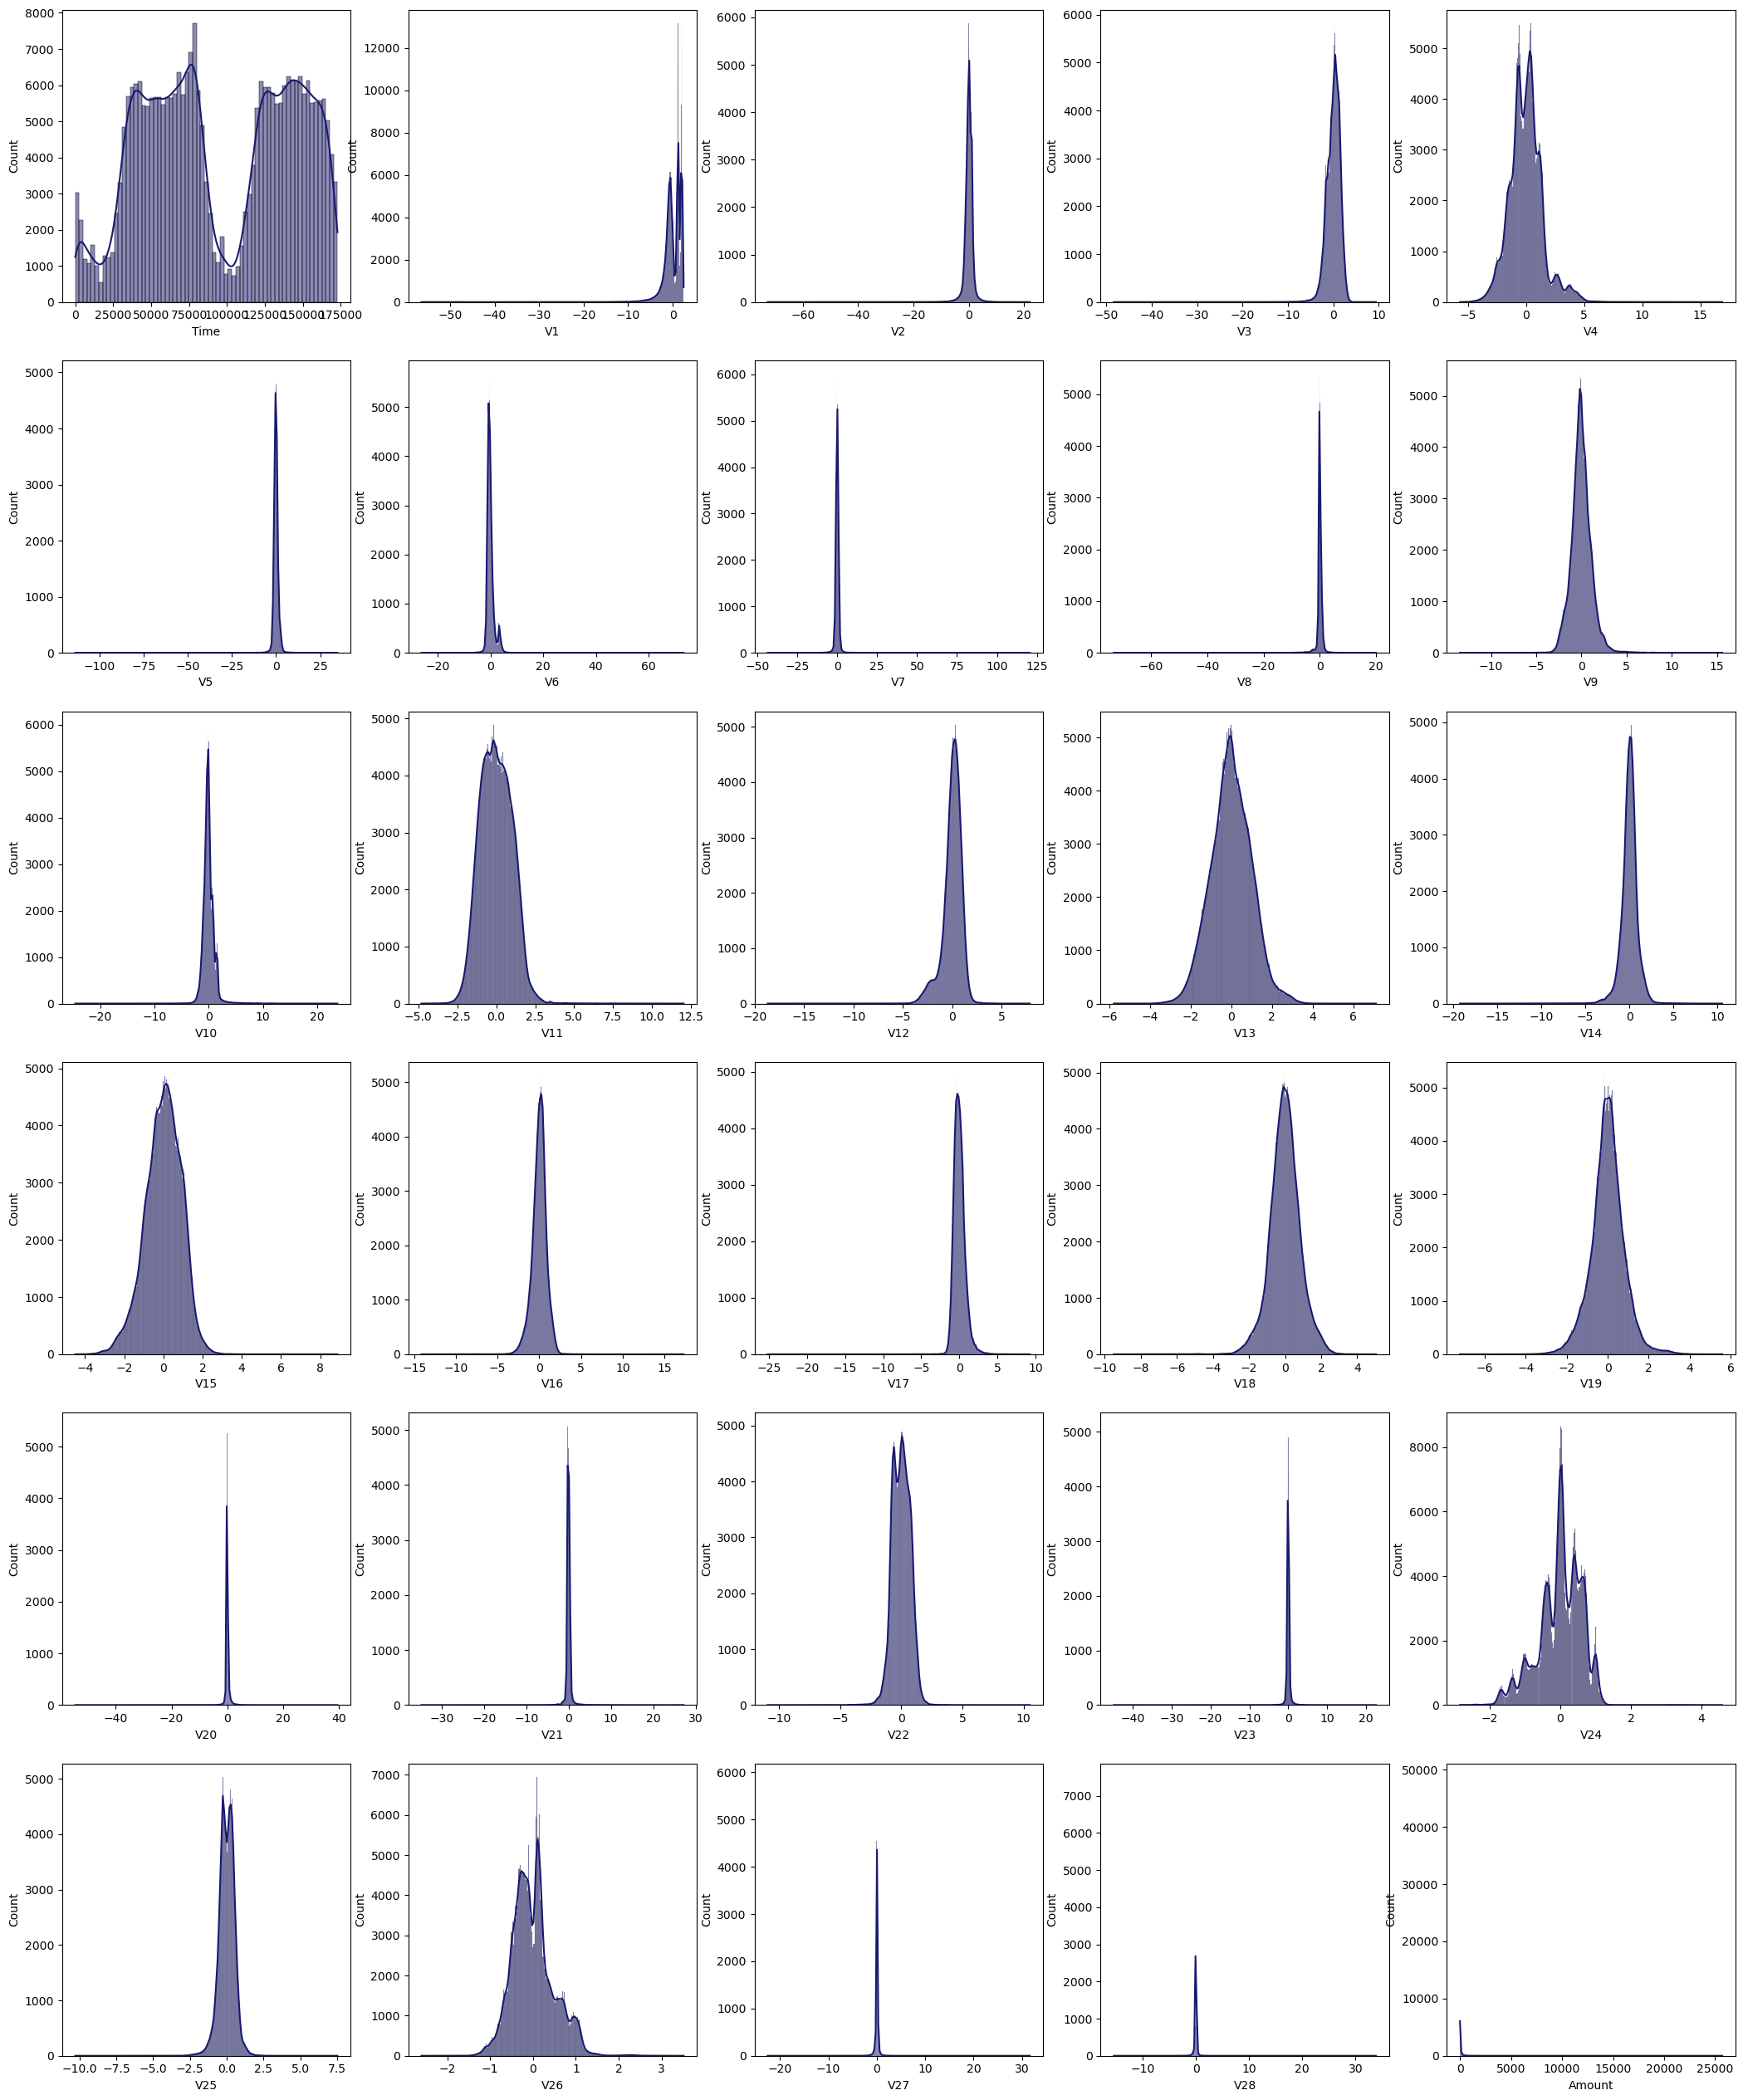

In [44]:
# custom function to draw histogram plot of each feature
def draw_hist_plot(dataset, rows, cols):
    
    features = dataset.columns.values
    number_of_features=len(features)

    fig, axes=plt.subplots(rows,cols, figsize=(26,32))

    counter=0
    
    for i in range(rows):
        for j in range(cols):
            sns.histplot(data=dataset, x=features[counter], color='midnightblue', kde=True, ax=axes[i][j])           
            counter+=1
            if counter==(number_of_features-1,):
                break
                
draw_hist_plot(df, 6, 5)

### 2.6 Correlation Analysis <a id='2.6'></a>
- Time and Amount features are showing noticable correlation with most of the anonymized features (V1-V28)
- Amount feature shows very high correlation with features: V2, V7 and V20
- Time feature shows noticable correlation with V3 and V5
- Top influential predictors to target class are V4, V11, V12, V14 and V17 

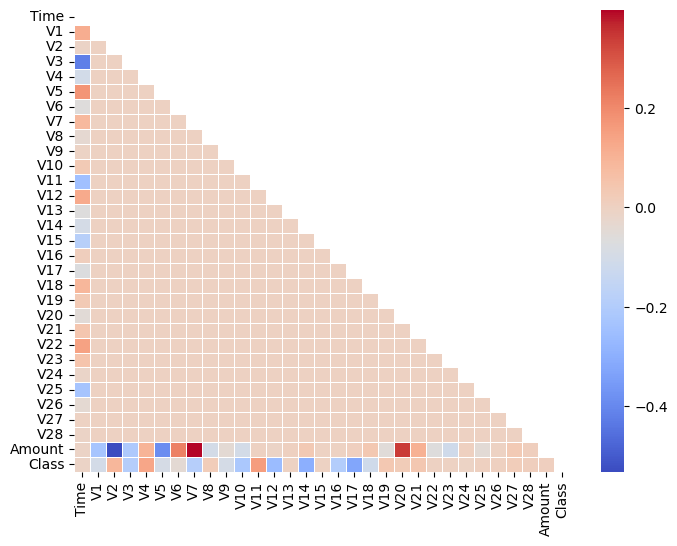

In [66]:
corr = df.corr()
corr_matrix = np.triu(corr)
plt.figure(figsize = (8,6))
ax = sns.heatmap(corr, linewidth=.5, mask=corr_matrix, cmap='coolwarm')

### 2.7 Transactions with Zero Amount <a id='2.7'></a>
- There are 1825 (~0.6% of the dataset) transactions exist with 0€, out of which 27 of them are fraud transactions
- Ideally these transactions doesn't provide a useful data point for fraud investigation
- However we will keep these datapoints due to features V1-V28 are anonymized (they could possibly present variations of other amount measures) and removing more fraud datapoint from already skewed dataset wouldn't be preferrable

In [24]:
df_0 = df[df['Amount']==0]

print('There are {} transactions exist with zero amount, out of which {} are fraud and {} are geniune transactions'
     .format(len(df_0), len(df_0[df_0['Class']==1]), len(df_0[df_0['Class']==0])))


There are 1825 transactions exist with zero amount, out of which 27 are fraud and 1798 are geniune transactions


### 2.8 Duplicate Transactions <a id='2.8'></a>
- There are 1081 identical transactions exist in the dataset (including the time & amount features)
- This represents an unusual situation due to either systematic or procedural error on data collection/manipulation processes 
- It would be beneficial for models to have these duplicates identified and removed so that models wouldn't get unintentionally influenced by these duplicate datapoints

In [42]:
duplicate_transactions = df[df.duplicated(keep='first')]

print('There are {} duplicate transactions exist out of which {} are fraud and {} are non-fraud transactions'
     .format(len(duplicate_transactions), 
             len(duplicate_transactions[duplicate_transactions['Class']==1]), 
             len(duplicate_transactions[duplicate_transactions['Class']==0])))


There are 1081 duplicate transactions exist out of which 19 are fraud and 1062 are non-fraud transactions


## 3. Baseline Performance of Predictive Models  <a id='3'></a>
- For simpliocity and narrow down the scope, the following predictive models will be used and their performance will be evaluated with various methods and techniques for the rest of this notebook 
    - Logistic Regression
    - Decesion Trees
    - Random Forest
- Removing duplicate transactions improved the baseline recall score significantly for Decision Tree and Random Forest models and AUC score of all 3 models

### 3.1 Baseline Performance of Selected Predictive Models <a id='3.1'></a>
- All future techniques and methods will be performed in training set and performance will be evaluated on test set to prevent any spill over and its influence on performance metrics
- The nature of this investigation ideally leaves no room for mistake on flagging fraud transactions therefore, precision metric over accuracy will be used as main performance metrics
- In addition to precision, the other metrics that will be considered on evaluating the performance will be area under the ROC curve (AUC) and F-1 score with 'macro' setting putting more emphasis on imbalanced dataset

#### 3.1.1 Creating Training and Test Data Sets
Splitting the dataset into training and test set

In [896]:
X,y = df.drop(['Class'],axis=1), df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

print('Train set contains: {} rows and {} of fradulent transaction'.format(len(X_train), len(y_train[y_train==1])))
print('Test set contains: {} rows and {} of fradulent transaction'.format(len(X_test), len(y_test[y_test==1])))


Train set contains: 199364 rows and 344 of fradulent transaction
Test set contains: 85443 rows and 148 of fradulent transaction


In [897]:
#Initializing the score board
performance_board = pd.DataFrame(columns=['Model', 'Approach', 'Recall', 'Precision', 'F1 (Macro)', 'AUC'])

#### 3.1.2 Model Baseline Performance
- Creating a custom function to compute performance of each of the 3 prediction models. This function will be used repeatitively to evaluate the performance after implementing various techniques and methods 
- Computing the baseline model performance which will be used as a benchmark on the rest of the notebook
- Decision Tree shows the highest baseline recall score of 74.3%, which followed by Random Forest 70.9% and Logistic Regression 60.1%

In [13]:
# Creating Custom Score Function to Evaluate ML Models from various metrices

def learning_algorithms_spot_check(X_train, y_train, X_test, y_test, approach, score_board):
    
    models=[]
    models.append(("Logistic Regression",LogisticRegression(random_state = 0, max_iter=1000)))
    models.append(("Decision Tree",DecisionTreeClassifier(random_state = 0)))
    models.append(("Random Forest",RandomForestClassifier(random_state = 0, n_jobs=-1)))

    results=[]
    names= []

    for name, model in models:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        train_recall_score = recall_score(y_train, y_pred_train)
        test_recall_score = recall_score(y_test, y_pred_test)
        test_precision_score = precision_score(y_test, y_pred_test)
        test_f1_score = f1_score(y_test, y_pred_test, average='macro')
        y_pred_test_proba = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  y_pred_test_proba)
        test_auc_score = roc_auc_score(y_test, y_pred_test_proba)
        
        f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
        
        # create confusion metrics
        test_confusion_matrix = confusion_matrix(y_test, y_pred_test)
        cm_display = ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix,display_labels = [False, True])   
        ax1.title.set_text(name +' Confusion Matrix')
        cm_display.plot(cmap="Blues", ax=ax1)

        #create ROC curve
        ax2.plot(fpr,tpr,label="AUC="+str(round(test_auc_score,4)))
        ax2.title.set_text(name +' ROC Curve')
        ax2.set_ylabel('True Positive Rate')
        ax2.set_xlabel('False Positive Rate')
        ax2.legend(loc=4)
        
        #create precision-recall curve
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test)
        ax3.plot(recall, precision, color='purple')
        ax3.title.set_text(name +' Precision-Recall Curve')
        ax3.set_ylabel('Precision')
        ax3.set_xlabel('Recall')
        plt.show()
        
        new_row = pd.DataFrame({'Model':name, 'Approach':approach, 'Recall':test_recall_score, 
                                'Precision':test_precision_score, 
                                'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
        
        score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
        
    return score_board

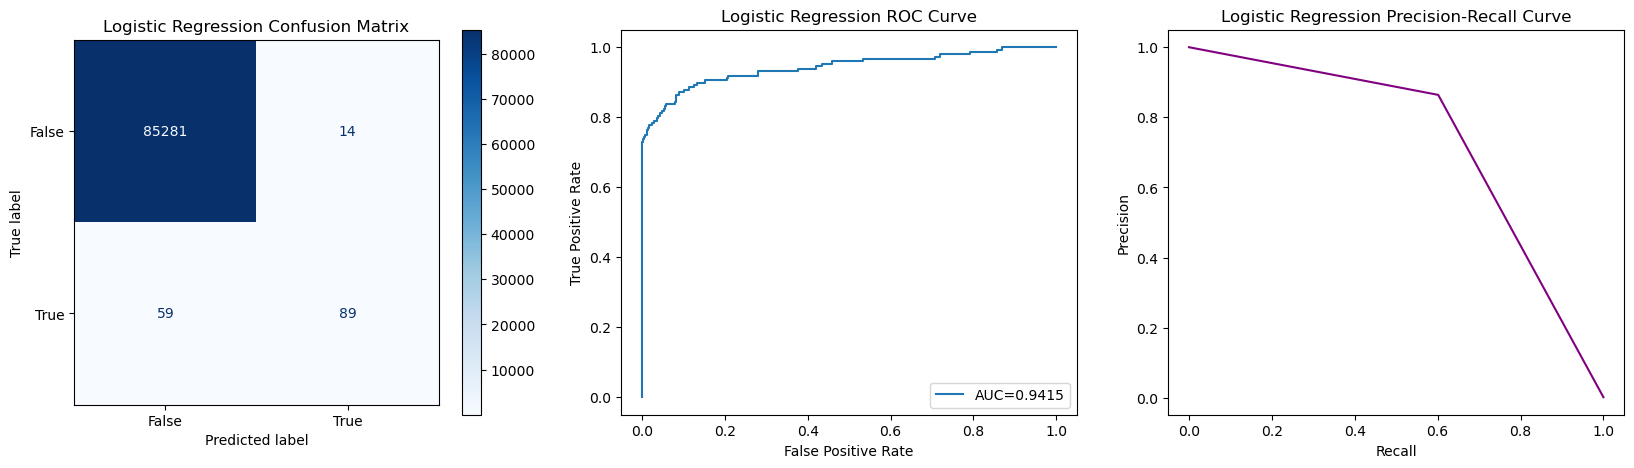

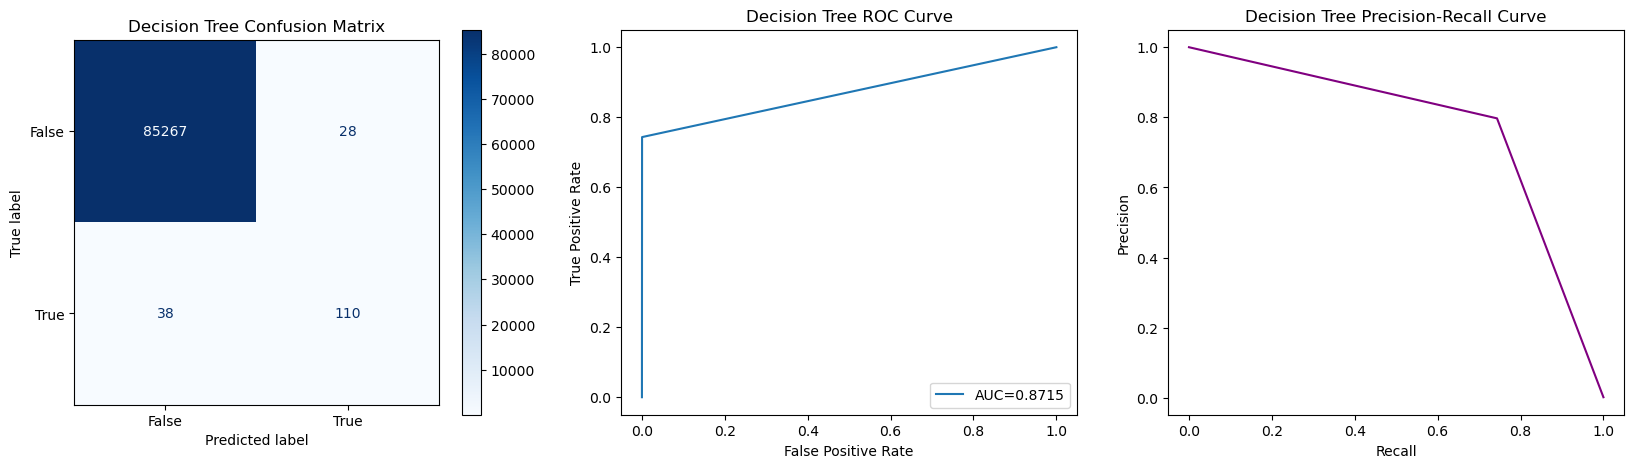

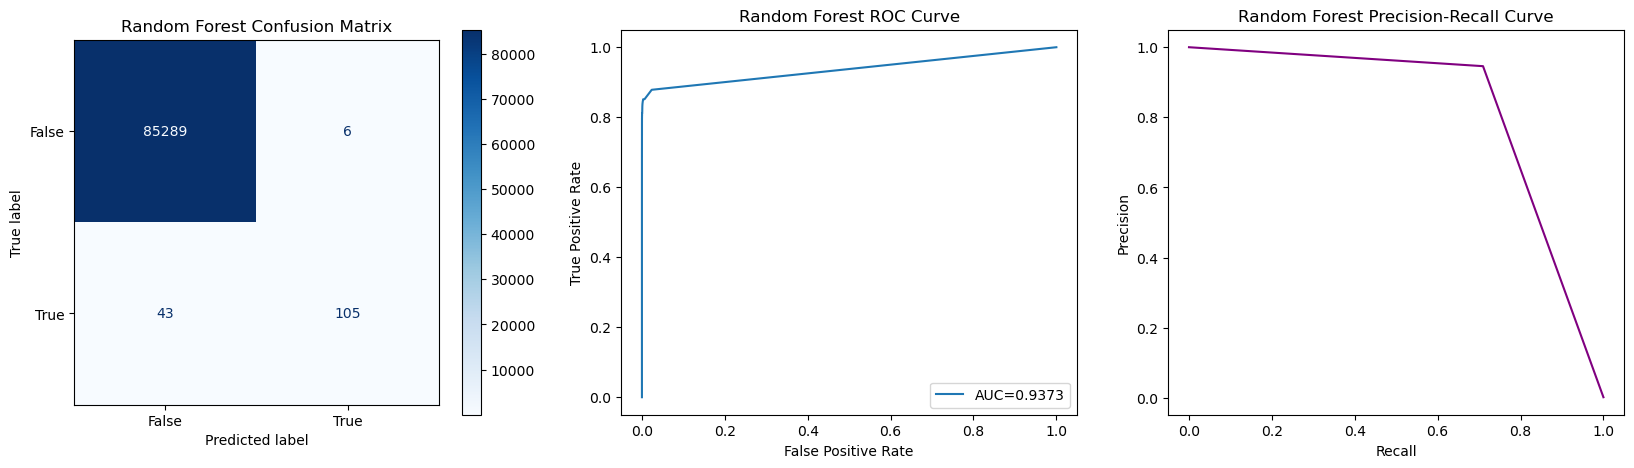

In [898]:
# Baseline ML Model Scores
performance_board = learning_algorithms_spot_check(X_train, y_train, X_test, y_test, 'baseline', performance_board)
display(performance_board.sort_values(by=['Model']).style.hide(axis='index'))

### 3.2 Removing Duplicate Transactions and its Impact on Predictive Model Performance <a id='3.2'></a>
- Removing the duplicate transactions improved 
    - AUC score of all 3 models
    - Recall score significantly for Random Forest and Decision Tree predictive models

In [900]:
# Removing duplicates from the dataset
df2 = df.copy()
duplicate_transactions = df2[df2.duplicated(keep='first')]
df2 = df2.drop(duplicate_transactions.index)
df2.reset_index(drop=True,inplace=True)

print('There are {} duplicate transactions exist out of which {} are fraud and {} are non-fraud transactions'
     .format(len(duplicate_transactions), 
             len(duplicate_transactions[duplicate_transactions['Class']==1]), 
             len(duplicate_transactions[duplicate_transactions['Class']==0])))
print('Dataset size decreased from {} to {} after removing duplicate transactions'.format(len(df), len(df2)))


There are 1081 duplicate transactions exist out of which 19 are fraud and 1062 are non-fraud transactions
Dataset size decreased from 284807 to 283726 after removing duplicate transactions


In [901]:
# Re-splitting the train and test datasets after removing duplicate transactions
X,y = df2.drop(['Class'],axis=1), df2['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

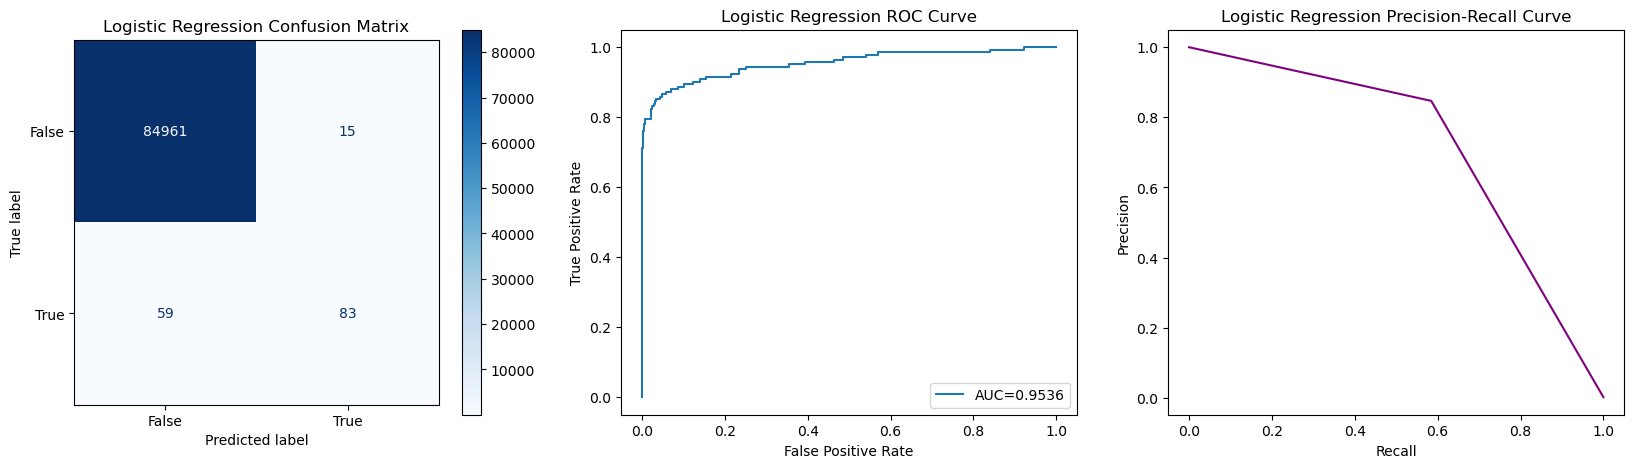

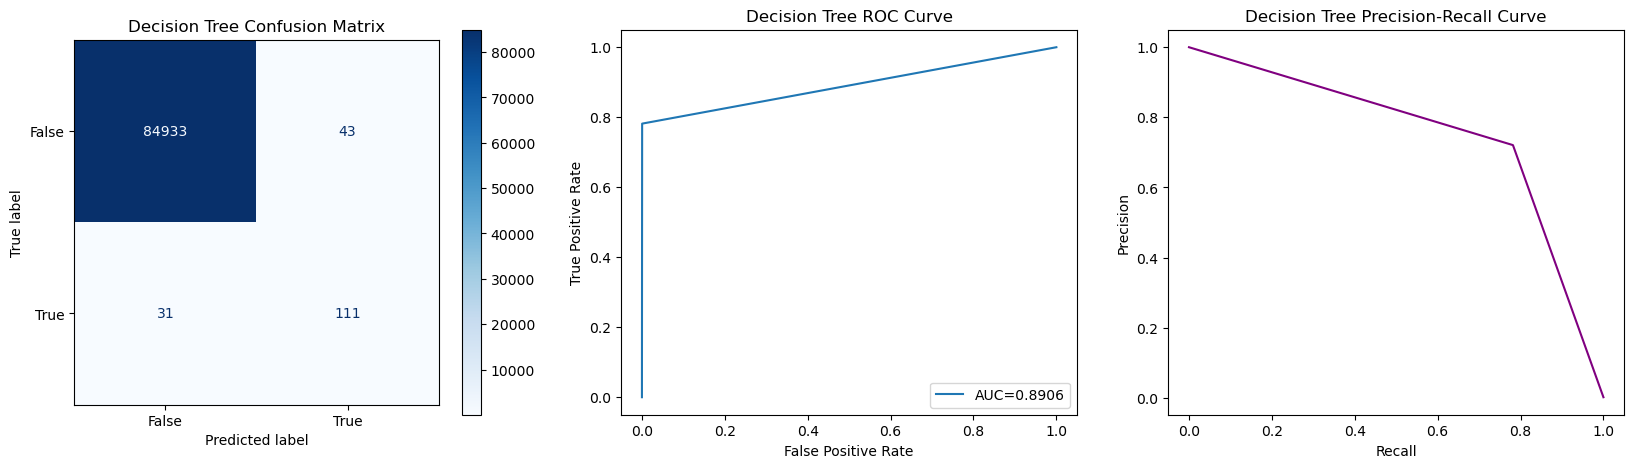

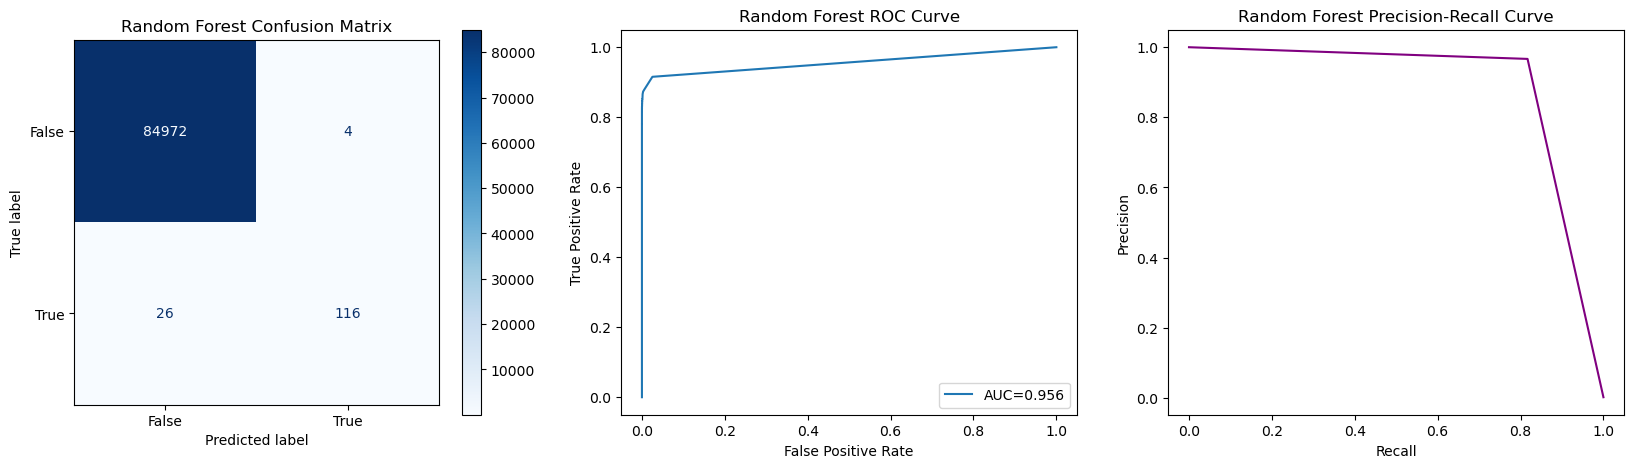

In [902]:
# Baseline model performance after removing duplicate transactions
performance_board = learning_algorithms_spot_check(X_train, y_train, X_test, y_test, 'duplicates removed', performance_board)
display(performance_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

#Re-configuring the board with the new baseline
performance_board = performance_board.drop([0,1,2])
performance_board['Approach']='baseline'

### 3.3 Computing Predictive Model Baseline Cross Validation Scores <a id='3.3'></a>
- In general cross validation across multiple folds gives more realistic evaluation of models since it eliminates the factor in randomness of the train-test dataset splitting by computing the average score of multiple train-test split scnerios
- Using 'stratified' fold over generic fold is crucial here to ensure that all folds contain equal subset of highlighly imbalanced fraud dataset
- Creating a custom function to compute cross validation score of each of the 3 prediction models. This function will be used repeatitively to evaluate the performance after implementing various techniques and methods 
- Cross validation shows slightly different picture of ranking predictive model performance (compared to previous evaluation on test dataset)
- Randomg forest has the highest recall socre of 77.1%, which followed by Decision Tree of 75.1% and Logistic Regression of 60% 

In [6]:
# Custom function to compute cross validation baseline scores of models

def compute_cv_scores(X,y):
    
    score_board = pd.DataFrame(columns=['Model', 'Recall','Precision', 'F1', 'AUC'])

    models=[]
    models.append(("Logistic Regression",LogisticRegression(random_state = 0, max_iter=1000)))
    models.append(("Decision Tree",DecisionTreeClassifier(random_state = 0)))
    models.append(("Random Forest",RandomForestClassifier(random_state = 0, n_jobs=-1)))

    scoring = {'acc': 'accuracy', 'prec': 'precision', 'recall': 'recall', 'auc': 'roc_auc', 'f1': 'f1'}
    stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

    for name, model in models:

        cv_grid = cross_validate(model, X, y, cv=stratified_kfold, scoring=scoring, n_jobs=-1)
        cv_recall = str(round(cv_grid['test_recall'].mean()*100,2)) +'% (+/-' + str(round(cv_grid['test_recall'].std()*100,2)) +'%)'
        cv_precision = str(round(cv_grid['test_prec'].mean()*100,2)) +'% (+/-' + str(round(cv_grid['test_prec'].std()*100,2)) +'%)'
        cv_f1 = str(round(cv_grid['test_f1'].mean()*100,2)) +'% (+/-' + str(round(cv_grid['test_f1'].std()*100,2)) +'%)'
        cv_auc = str(round(cv_grid['test_auc'].mean()*100,2)) +'% (+/-' + str(round(cv_grid['test_auc'].std()*100,2)) +'%)'

        new_row = pd.DataFrame({'Model':name, 'Recall':cv_recall, 'Precision':cv_precision, 'F1':cv_f1, 'AUC':cv_auc}, index=[0])
        score_board = pd.concat([new_row, score_board.loc[:]]).reset_index(drop=True)

    score_board = score_board.sort_index(ascending=False)
    score_board = score_board.style.set_properties(**{'text-align': 'left'})
    score_board = score_board.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])

    return display(score_board)

In [41]:
# Baseline model performance after removing duplicates
compute_cv_scores(X,y)

## 4. Outlier Detection <a id='4'></a>
#### Context: 
- The goal of this section is to remove outliers by using IQR method on geniune transactions targeting the top 5 most influential features (with normal distribution)
- Utilizing IQR method with a traditional threshold of 1.5 should capture all the data within the range of +/-3σ (consiering the distribution is normal) and flags the records outside of +/-3σ as outlier
- Previously performed correlation analysis showed the presence of outliers among geniune transactions
- The goal of this section is to remove outliers by using IQR method on geniune transactions targeting the top 5 most influential features (with normal distribution)
- Utilizing IQR method with a traditional threshold of 1.5 should capture all the data within the range of +/-3σ and flags the records outside of +/-3σ as 'outlier'

#### Summary: 
- IQR Method detected and removed ~12% of training set geniune transactions
- As a result recall metric of all models increased tremendously (by >15%) while sacrificing precision big time (dropped under 20% for all models)

#### Important note: 
- Usually outlier detection would require in-depth expert knowledge of the field/features. Therefore one should be cautious calling an outlier to a particular set of data
- Since almost all features are unfortunatley anonymous in this dataset, normally applying outlier detection without knowing actually not knowing about the feauture would not be recommended
- However, we will still perform a basic outlier detection here just to see the impact on the performance

In [69]:
# Custom function to detect and remove outliers by using InterQuartile Range method (Tukey's rule)
def remove_outliers_IQR(df, feature): 
    
    print('-----Detecting and removing outliers from {} feature-----'.format(feature))
    
    org_fraud_qty = len(df[df['Class']==1])
    org_legit_qty = len(df[df['Class']==0])
    
    # IQR
    Q1 = np.percentile(df[(df['Class']==0) & df[feature]], 25)
    Q3 = np.percentile(df[(df['Class']==0) & df[feature]], 75)
    IQR = Q3 - Q1

    old_shape = df.shape

    print("Old Shape: ", df.shape)

    # Upper bound
    upper = np.where((df['Class']==0) & (df[feature] >= (Q3+1.5*IQR)))
    # Lower bound
    lower = np.where((df['Class']==0)  & (df[feature] <= (Q1-1.5*IQR)))

    ''' Removing the Outliers '''
    df.drop(upper[0], inplace = True, axis=0)
    df.drop(lower[0], inplace = True, axis=0)
    df.reset_index(drop=True, inplace=True)

    new_shape = df.shape
    
    upd_fraud_qty = len(df[df['Class']==1])
    upd_legit_qty = len(df[df['Class']==0])

    print("New Shape: ", df.shape)
    print("Detected and removed {} outliers".format(old_shape[0]-new_shape[0]))
    print('There are {} of fraud transaction remaining and {} fraud outlier transactions were removed'.format(upd_fraud_qty, org_fraud_qty-upd_fraud_qty))
    print('There are {} of non-fraud transaction remaining and {} non-fraud outlier transactions were removed'.format(upd_legit_qty, org_legit_qty-upd_legit_qty))
    print('----------------------------------------------------------------------------------------------------------------')
    return df

In [97]:
# Removing outliers on the training dataset while keeping test set as-is
df_train_org = pd.DataFrame()
df_train_org = X_train.merge(y_train.to_frame(), right_index = True, left_index = True)
df_train_org.reset_index(drop=True,inplace=True)

# Removing the outliers of top 5 most influential features: V4, V11, V12, V14, V17
df_train_upd = remove_outliers_IQR(df_train_org, 'V4')
df_train_upd = remove_outliers_IQR(df_train_upd, 'V11')
df_train_upd = remove_outliers_IQR(df_train_upd, 'V12')
df_train_upd = remove_outliers_IQR(df_train_upd, 'V14')
df_train_upd = remove_outliers_IQR(df_train_upd, 'V17')  


-----Detecting and removing outliers from V4 feature-----
Old Shape:  (198608, 31)
New Shape:  (168467, 31)
Detected and removed 30141 outliers
There are 331 of fraud transaction remaining and 0 fraud outlier transactions were removed
There are 168136 of non-fraud transaction remaining and 30141 non-fraud outlier transactions were removed
----------------------------------------------------------------------------------------------------------------
-----Detecting and removing outliers from V11 feature-----
Old Shape:  (168467, 31)
New Shape:  (160090, 31)
Detected and removed 8377 outliers
There are 331 of fraud transaction remaining and 0 fraud outlier transactions were removed
There are 159759 of non-fraud transaction remaining and 8377 non-fraud outlier transactions were removed
----------------------------------------------------------------------------------------------------------------
-----Detecting and removing outliers from V12 feature-----
Old Shape:  (160090, 31)
New Shape

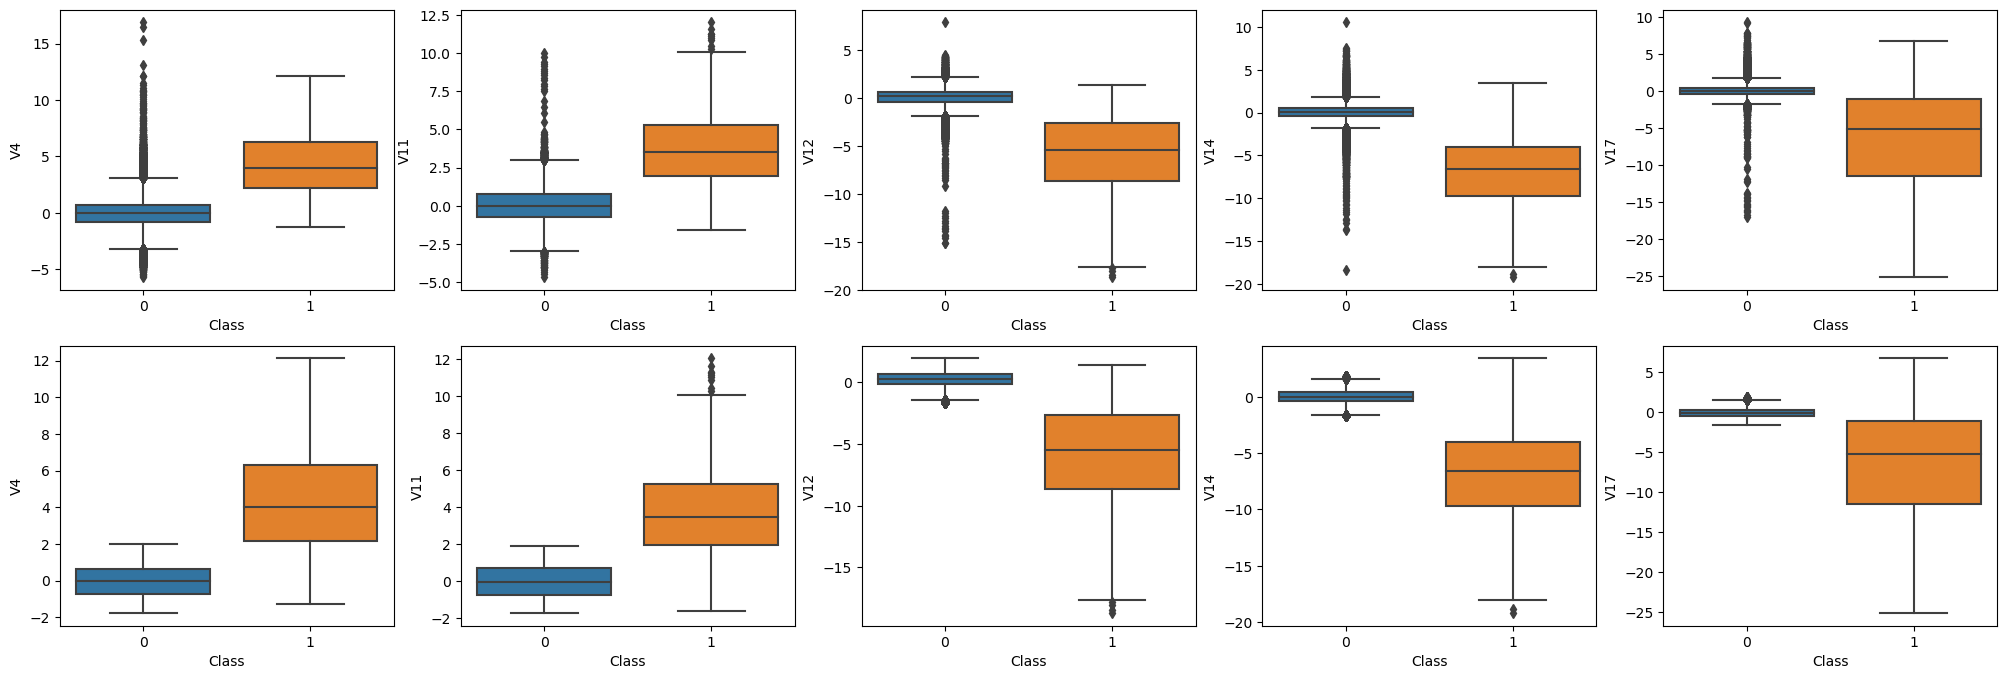

In [115]:
# Distribution on the selected features before and after removing outliers
features = ['V4', 'V11', 'V12', 'V14', 'V17']
number_of_features=len(features)

fig, axes=plt.subplots(2, 5, figsize=(25,8))

counter=0
for i in range(5): 
    sns.boxplot(x='Class', y=features[counter],data=df_train_org, ax=axes[0][i])            
    counter+=1
    if counter==(number_of_features-1,):
        break

counter=0
for i in range(5): 
    sns.boxplot(x='Class', y=features[counter],data=df_train_upd, ax=axes[1][i])            
    counter+=1
    if counter==(number_of_features-1,):
        break

-----Detecting and removing outliers from V4 feature-----
Old Shape:  (198608, 31)
New Shape:  (168467, 31)
Detected and removed 30141 outliers
There are 331 of fraud transaction remaining and 0 fraud outlier transactions were removed
There are 168136 of non-fraud transaction remaining and 30141 non-fraud outlier transactions were removed
----------------------------------------------------------------------------------------------------------------
-----Detecting and removing outliers from V11 feature-----
Old Shape:  (168467, 31)
New Shape:  (160090, 31)
Detected and removed 8377 outliers
There are 331 of fraud transaction remaining and 0 fraud outlier transactions were removed
There are 159759 of non-fraud transaction remaining and 8377 non-fraud outlier transactions were removed
----------------------------------------------------------------------------------------------------------------
-----Detecting and removing outliers from V12 feature-----
Old Shape:  (160090, 31)
New Shape

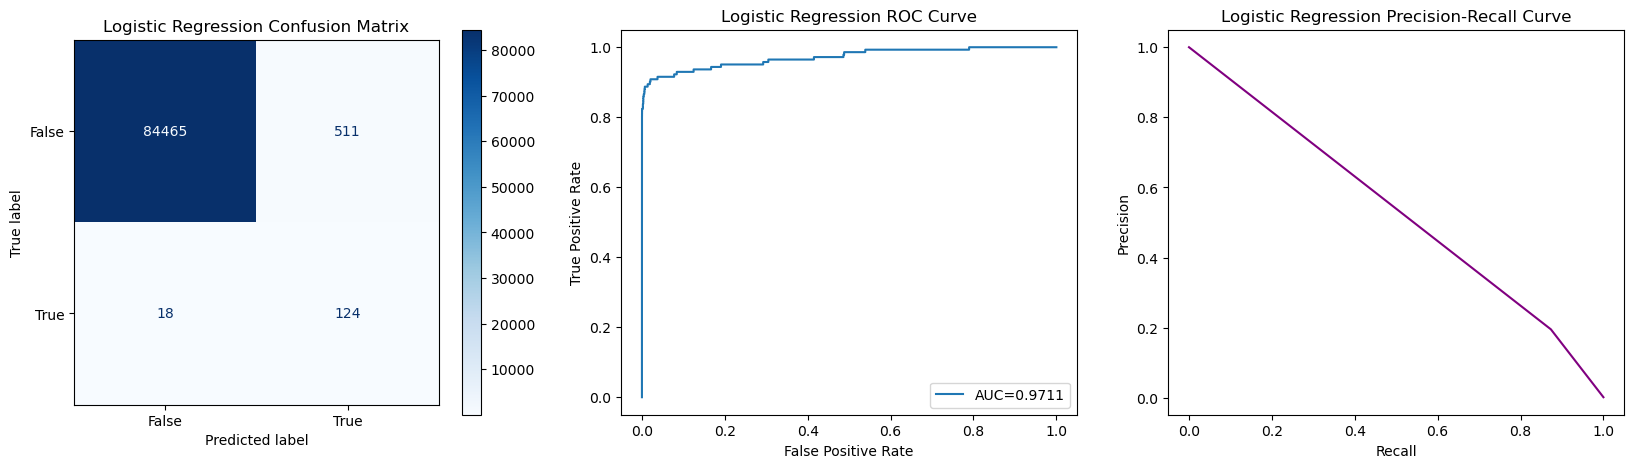

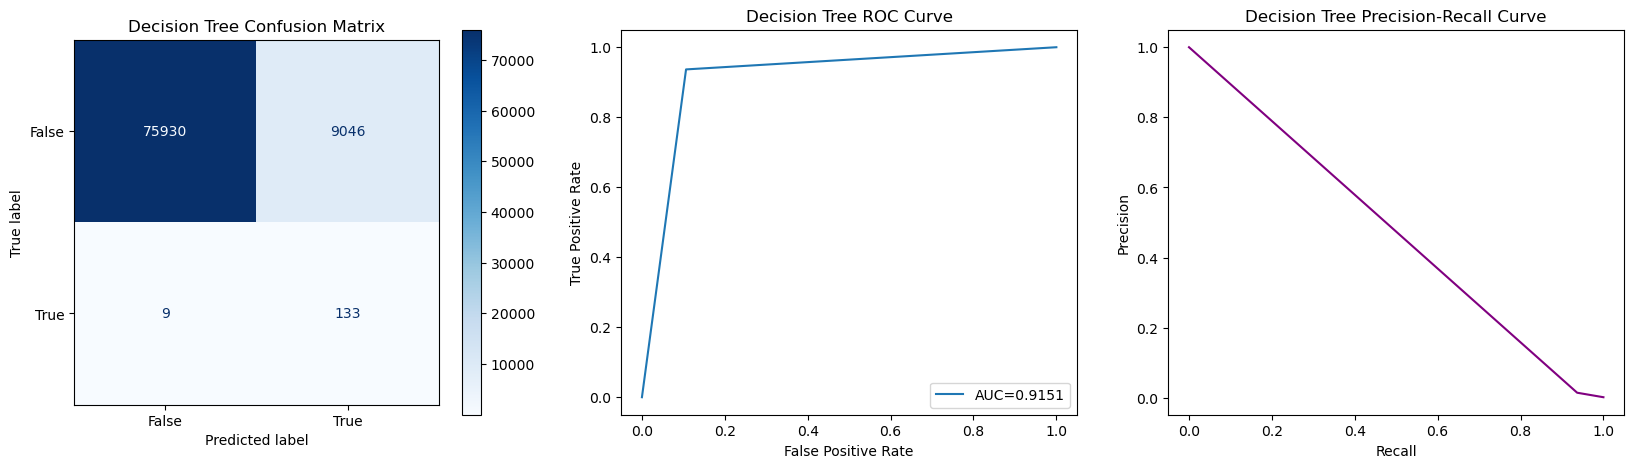

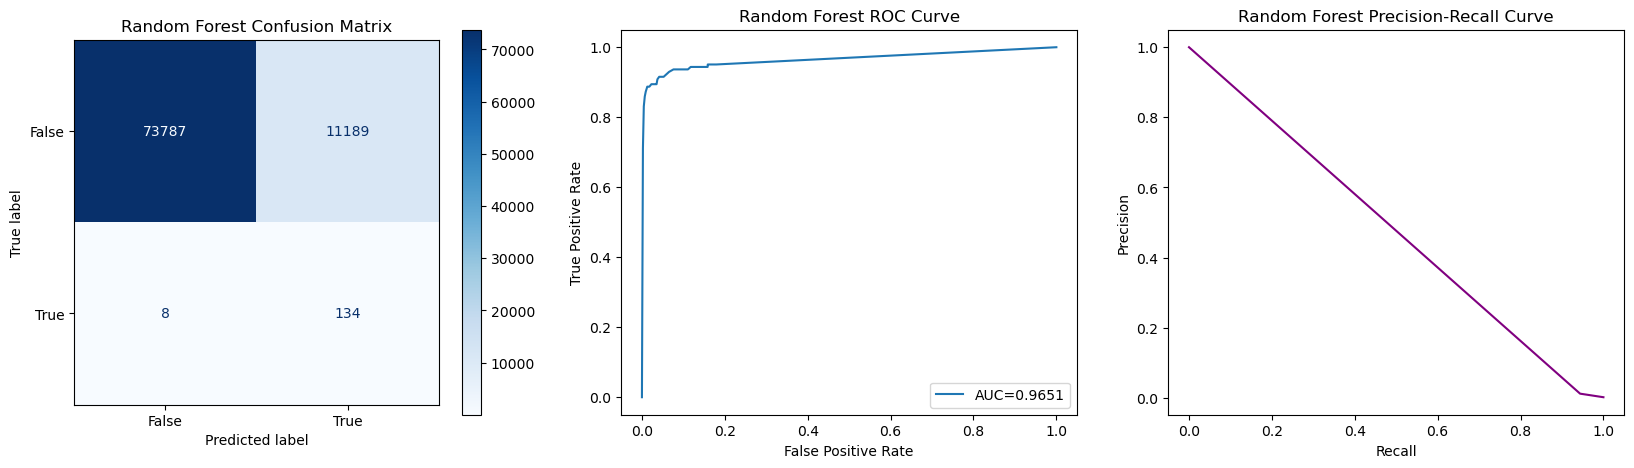

In [71]:
#Computing the score after removing outliers
X_train2, y_train2 = df_train_upd.drop(['Class'],axis=1), df_train_upd['Class']

performance_board = learning_algorithms_spot_check(X_train2, y_train2, X_test, y_test, 
                                                   'Outliers removed', performance_board)
display(performance_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

#Re-configuring the board with the new baseline
performance_board = performance_board.drop([3,4,5])


## 5. Feature scaling <a id='5'></a>
- Time and Amount features are showing very high dispersion compared to other features which are already gone through PCA transformation
- Robust scaling method is chosen among other scaling methods due to presence of outliers and Time and Amount features showing not normal distribution
- Tree based models are not prone to scaling. As expected only logistic regression showed an improvement across all metrics while Decision Tree and Random Forest model performances remain the same

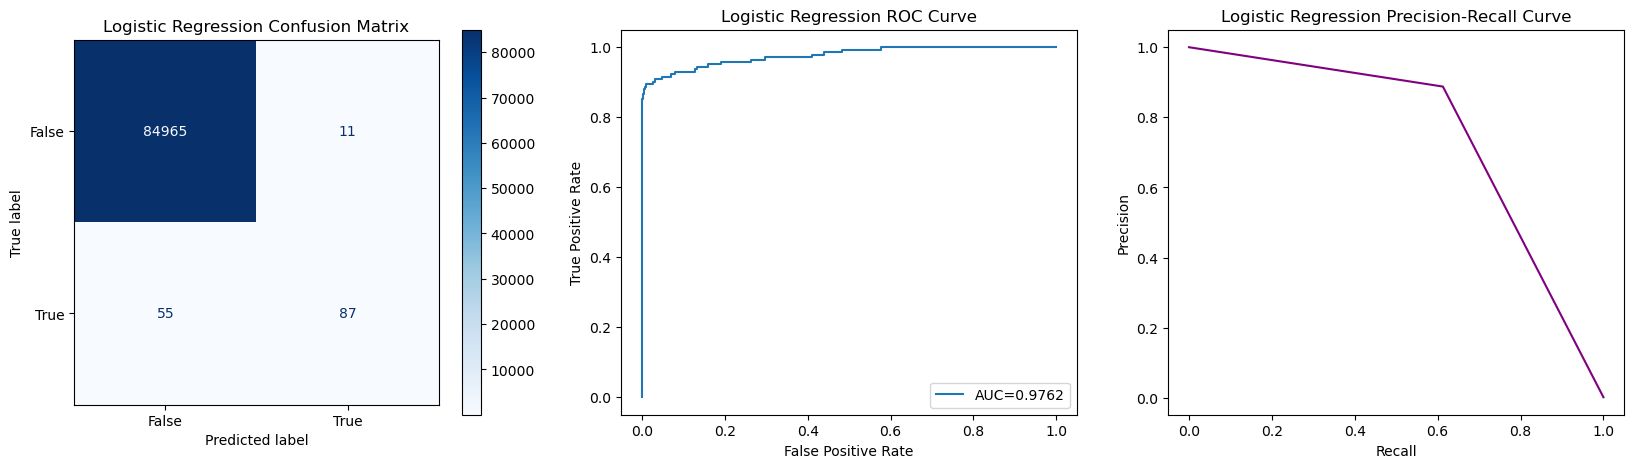

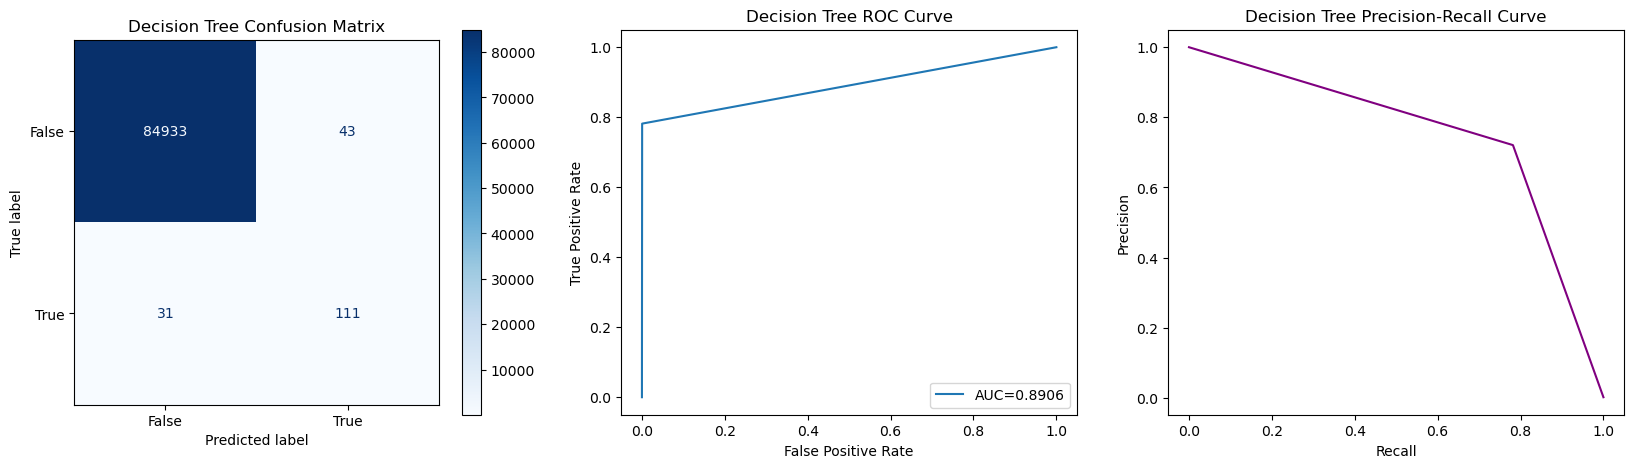

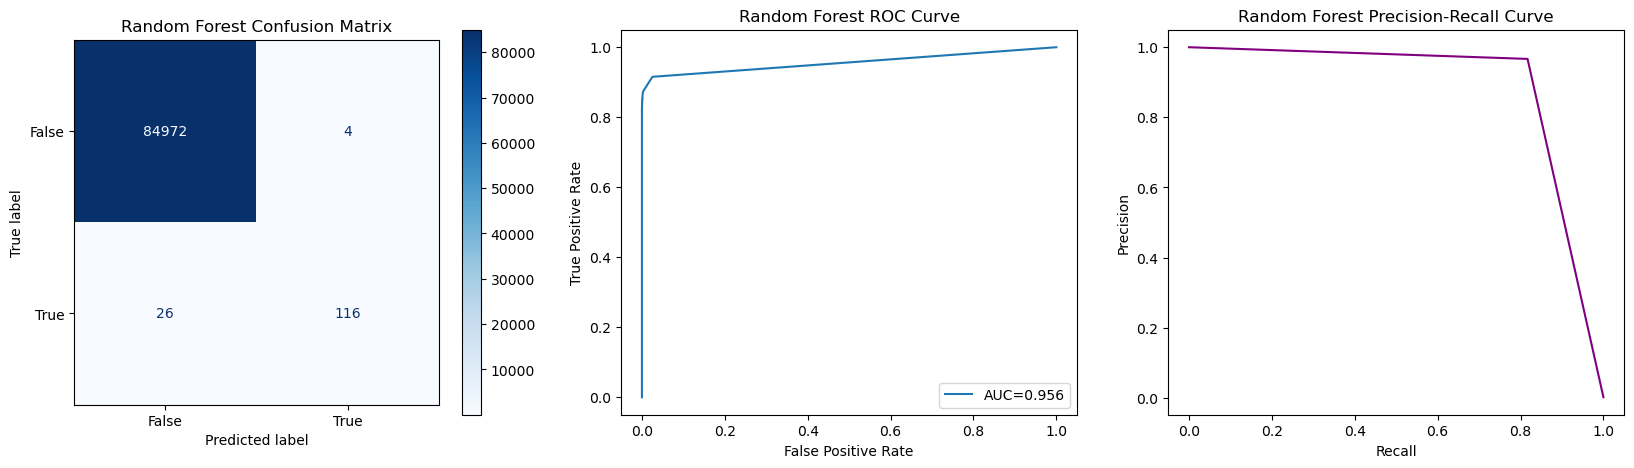

In [903]:
# Data preprocessing: Robust Scaling Method

rob_scaler = RobustScaler()
rob_scaler.fit(X_train)
X_scaled = rob_scaler.transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


performance_board = learning_algorithms_spot_check(X_train, y_train, X_test, y_test,
                                                   'Features Scaled', performance_board)

display(performance_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

#Re-configuring the board with the new baseline
performance_board = performance_board.drop([0,1,2])
performance_board['Approach']  = 'baseline'

## 6. Dealing with imbalanced data  <a id='6'></a>
In this section the following methods will be performed and their impact on baseline model performance will be evaluated
- 6.1 Data Level Preprocessing:
    - Oversampling 
    - Undersampling
    - Combination of over and undersamping methods
    
- 6.2 Cost Sensitive Learning 

- 6.3 Ensemble Learning


## 6.1 Data Level Preprocessing <a id='6.1'></a>
Implementing Oversampling techniques and evaluating their impact on model prediction


### 6.1.1 Oversampling Methods <a id='6.1.1'></a>
- Almost all oversampling methods evaluated did not yield a significant improvement in both recall and precision performance of predictive models
- Recall tends to receive a generous improvement while precision drops significantly for almost methods
- Increasing sampling ratio in all oversampling methods yielded decreasing predictive model performance as increasing volume of 'synthetic data' brings more unclearity to the credit card dataset

In [120]:
# Custom plot function to plot scores with respect to varying sampling sizes
def plot_scores(sampling_method, 
                lr_recall_scores, lr_precision_scores, lr_auc_scores, 
                dt_recall_scores, dt_precision_scores, dt_auc_scores,
                rf_recall_scores, rf_precision_scores, rf_auc_scores): 
    
    sampling_ratio = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))

    ax11 = sns.lineplot(x=sampling_ratio, y=lr_recall_scores, markers=True, label='Recall Score', ax=ax1)
    ax12 = sns.lineplot(x=sampling_ratio, y=lr_precision_scores, markers=True, label = 'Precision Score', ax=ax1)
    ax13 = sns.lineplot(x=sampling_ratio, y=lr_auc_scores, markers=True, label = 'AUC Score', ax=ax1)

    ax1 = ax11.twinx()
    ax1 = ax12.twinx()
    ax1 = ax13.twinx()

    ax21 = sns.lineplot(x=sampling_ratio, y=dt_recall_scores, markers=True, label='Recall Score', ax=ax2)
    ax22 = sns.lineplot(x=sampling_ratio, y=dt_precision_scores, markers=True, label = 'Precision Score', ax=ax2)
    ax23 = sns.lineplot(x=sampling_ratio, y=dt_auc_scores, markers=True, label = 'AUC Score', ax=ax2)

    ax2 = ax21.twinx()
    ax2 = ax22.twinx()
    ax2 = ax23.twinx()

    ax31 = sns.lineplot(x=sampling_ratio, y=rf_recall_scores, markers=True, label='Recall Score', ax=ax3)
    ax32 = sns.lineplot(x=sampling_ratio, y=rf_precision_scores, markers=True, label = 'Precision Score', ax=ax3)
    ax33 = sns.lineplot(x=sampling_ratio, y=rf_auc_scores, markers=True, label = 'AUC Score', ax=ax3)

    ax3 = ax31.twinx()
    ax3 = ax32.twinx()
    ax3 = ax33.twinx()

    title = "Recall-Precision-AUC Scores on " + sampling_method + " Oversampled Dataset with Varying Sampling Ratio"
    
    fig.suptitle(title, fontsize=16)
    ax1.title.set_text('Logistic Regression')
    ax2.title.set_text('Decision Tree')
    ax3.title.set_text('Random Forest')
    plt.xticks(sampling_ratio, rotation = 45)
    plt.xlabel('Sampling Ratio')
    plt.ylabel('Score')
    plt.legend()
    fig.tight_layout(pad=2.0)
    plt.show()

In [121]:
# Custom oversampling function to compute scores with respect to varying sampling sizes

def compute_oversampled_score(X_train, y_train, X_test, y_test, oversampling_method): 
    
    sampling_ratio_list = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

    lr_recall_scores = []
    lr_precision_scores = []
    lr_auc_scores = []
    dt_recall_scores = []
    dt_precision_scores = []
    dt_auc_scores = []
    rf_recall_scores = []
    rf_precision_scores = []
    rf_auc_scores = []

    lr = LogisticRegression(random_state = 0, max_iter=1000)
    dt = DecisionTreeClassifier(random_state = 0)
    rfc = RandomForestClassifier(random_state = 0, n_jobs=-1)

    for sampling_ratio in sampling_ratio_list: 
        
        if oversampling_method == 'RandomOverSampling':
            os_method = RandomOverSampler(random_state=0, sampling_strategy=sampling_ratio)
        elif oversampling_method == 'Smote':
            os_method = SMOTE(random_state=0, n_jobs=-1, sampling_strategy=sampling_ratio)
        elif oversampling_method == 'BorderLineSmote':
            os_method = BorderlineSMOTE(random_state=0, n_jobs=-1, sampling_strategy=sampling_ratio)
        elif oversampling_method == 'SVMSmote':
            os_method = SVMSMOTE(random_state=0, n_jobs=-1, sampling_strategy=sampling_ratio)
        elif oversampling_method == 'KmeansSmote':
            os_method = KMeansSMOTE(random_state=0, n_jobs=-1, kmeans_estimator=500, sampling_strategy={0:198257, 1:198257*sampling_ratio})
        elif oversampling_method == 'ADASYN':
            os_method = ADASYN(random_state=0, n_jobs=-1, sampling_strategy=sampling_ratio)
        else: 
            print('Invalid Model')
        
        X_train_sampled, y_train_sampled = os_method.fit_resample(X_train, y_train)

        lr.fit(X_train_sampled, y_train_sampled)
        lr_y_pred = lr.predict(X_test)
        lr_recall_scores.append(recall_score(y_test, lr_y_pred))
        lr_precision_scores.append(precision_score(y_test, lr_y_pred))
        lr_auc_scores.append(roc_auc_score(y_test, lr_y_pred))

        dt.fit(X_train_sampled, y_train_sampled)
        dt_y_pred = dt.predict(X_test)
        dt_recall_scores.append(recall_score(y_test, dt_y_pred))
        dt_precision_scores.append(precision_score(y_test, dt_y_pred))
        dt_auc_scores.append(roc_auc_score(y_test, dt_y_pred))    

        rfc.fit(X_train_sampled, y_train_sampled)
        rfc_y_pred = rfc.predict(X_test)
        rf_recall_scores.append(recall_score(y_test, rfc_y_pred))
        rf_precision_scores.append(precision_score(y_test, rfc_y_pred))
        rf_auc_scores.append(roc_auc_score(y_test, rfc_y_pred))
        
    return lr_recall_scores, lr_precision_scores, lr_auc_scores, dt_recall_scores, dt_precision_scores, dt_auc_scores, rf_recall_scores, rf_precision_scores, rf_auc_scores

### 6.1.1.1  Random oversampling technique
- Random oversampling resulted mixed observations on the performance of oversampling methods
- Decision Tree showed ~4% increase in recall while ~8% reduction in precision
- Logistic Regression showed ~30% increase in recall while ~88% drop in precision
- Random Forest showed ~1% increase in recall while ~2% increase in precision

In [909]:
performance_board_ros = performance_board

In [907]:
#Random Oversampling
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Amount of fraud labels before random oversampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before random oversampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after random oversampling: {}'.format(np.count_nonzero(y_train_ros==1)))
print('Amount of non-fraud labels after random oversampling: {}'.format(np.count_nonzero(y_train_ros==0)))

Amount of fraud labels before random oversampling: 331
Amount of non-fraud labels before random oversampling: 198277


Amount of fraud labels after random oversampling: 198277
Amount of non-fraud labels after random oversampling: 198277


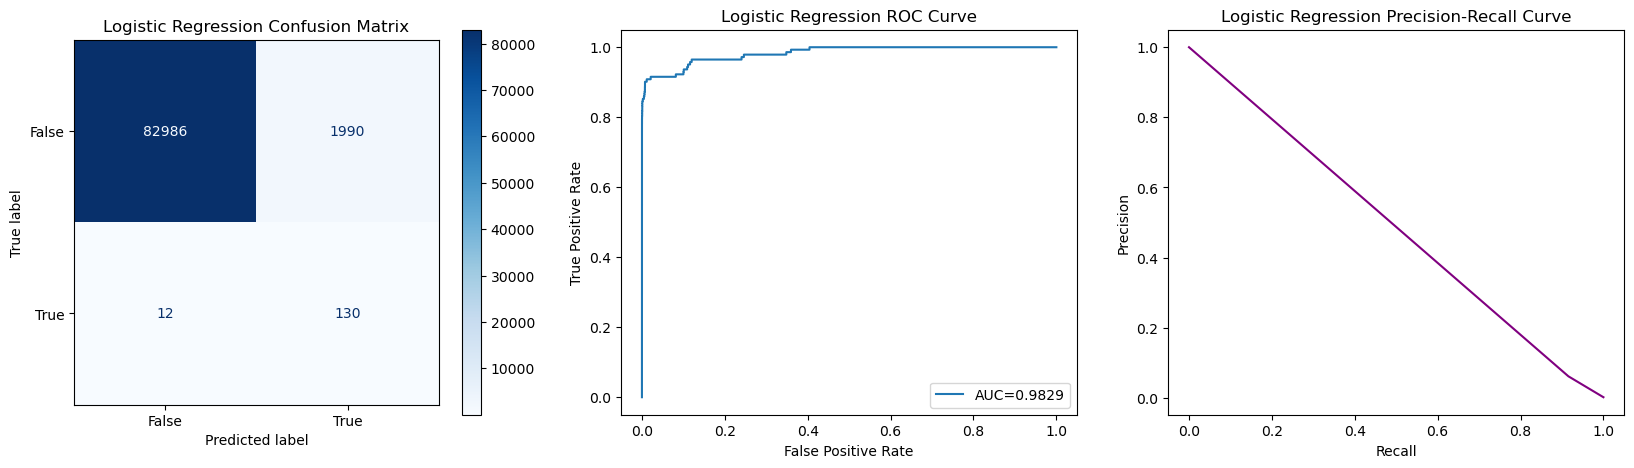

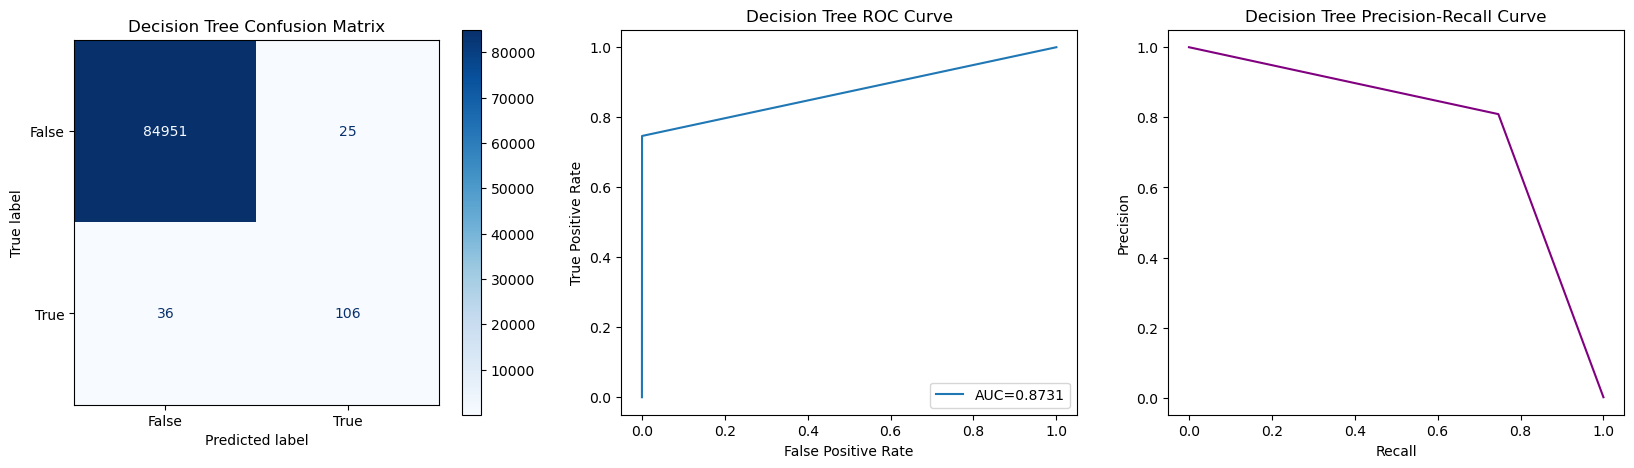

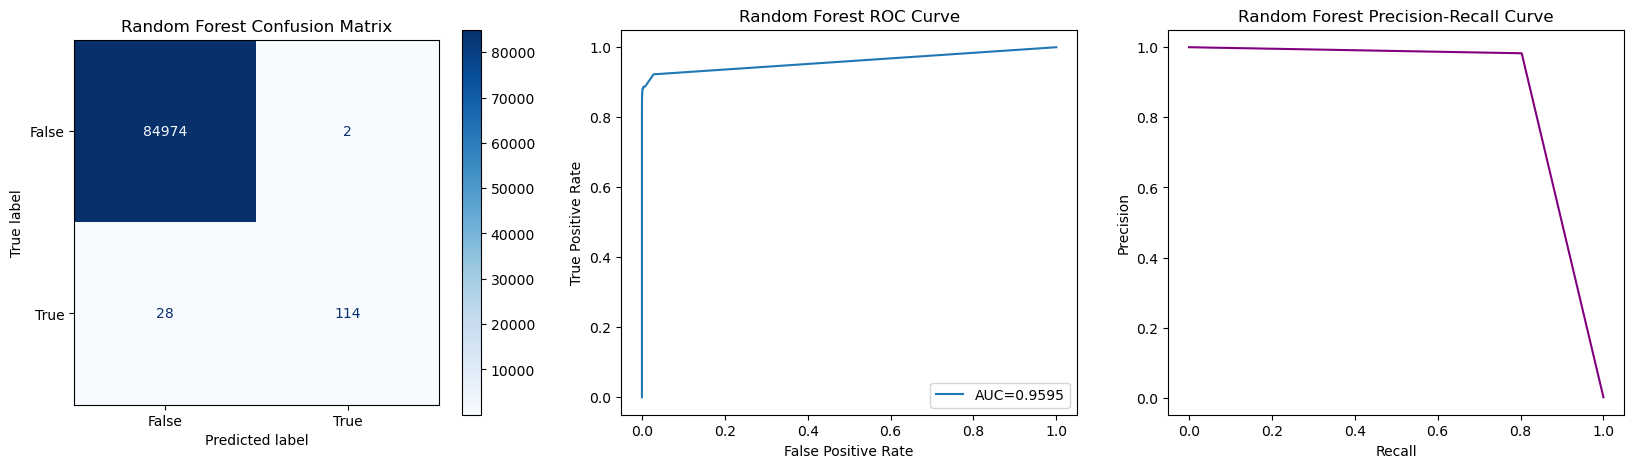

In [912]:
# Score after Random Over Sampling
performance_board_ros = learning_algorithms_spot_check(X_train_ros, y_train_ros, X_test, y_test, 
                                                   'Random Over Sampled', performance_board_ros)

display(performance_board_ros.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


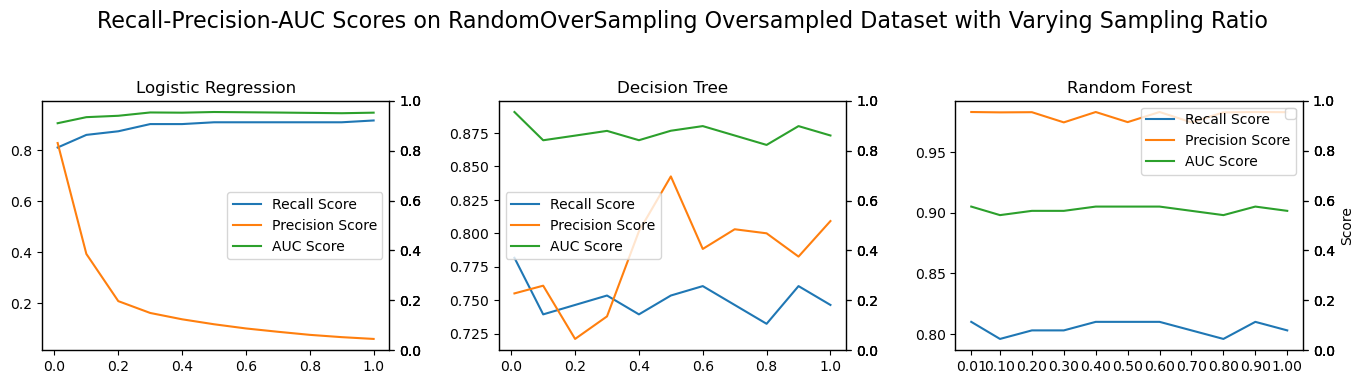

In [125]:
lr_recall_scores, lr_precision_scores, lr_auc_scores, \
dt_recall_scores, dt_precision_scores, dt_auc_scores, \
rf_recall_scores, rf_precision_scores, rf_auc_scores = compute_oversampled_score(X_train, y_train, X_test, y_test, \
                                                                                 'RandomOverSampling')

plot_scores('RandomOverSampling', 
                lr_recall_scores, lr_precision_scores, lr_auc_scores, 
                dt_recall_scores, dt_precision_scores, dt_auc_scores,
                rf_recall_scores, rf_precision_scores, rf_auc_scores)

### 6.1.1.2  Smote oversampling technique
- Smote oversampling yielded improvement of recall score of all 3 predictive models except the Decision Tree predictive model which stayed the same
- On the other hand precision droped significantly for all predictive models

In [914]:
#Random Oversampling with SMOTE

smote = SMOTE(random_state=0, n_jobs=-1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Amount of fraud labels before SMOTE oversampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before SMOTE oversampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after SMOTE oversampling: {}'.format(np.count_nonzero(y_train_smote==1)))
print('Amount of non-fraud labels after SMOTE oversampling: {}'.format(np.count_nonzero(y_train_smote==0)))

/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Amount of fraud labels before SMOTE oversampling: 331
Amount of non-fraud labels before SMOTE oversampling: 198277


Amount of fraud labels after SMOTE oversampling: 198277
Amount of non-fraud labels after SMOTE oversampling: 198277


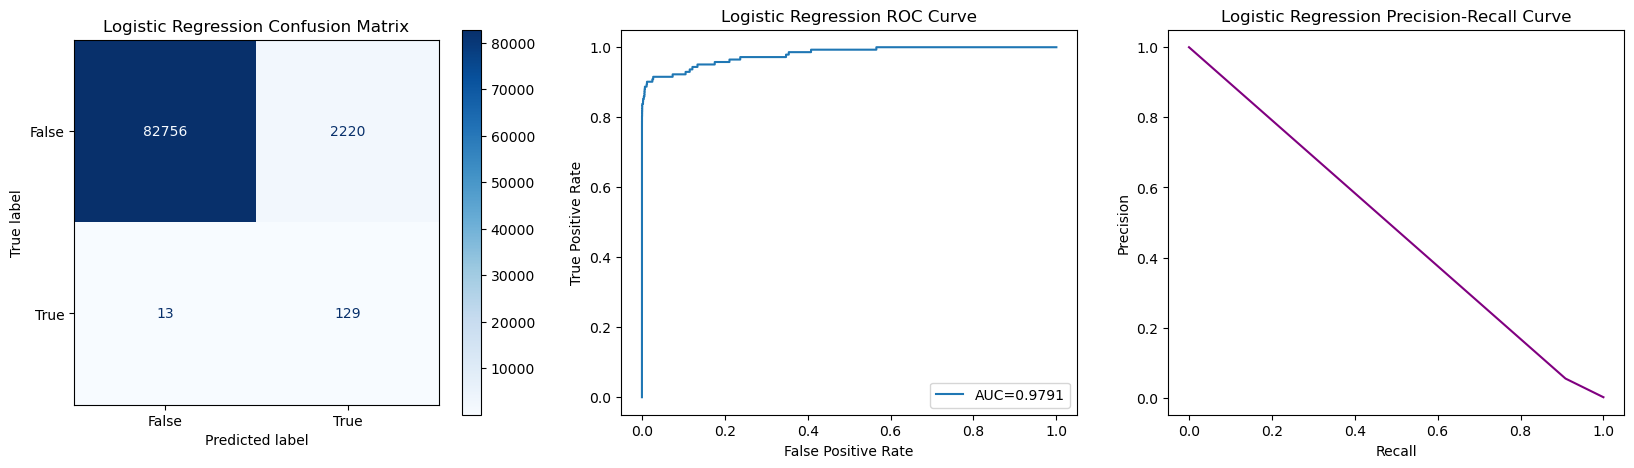

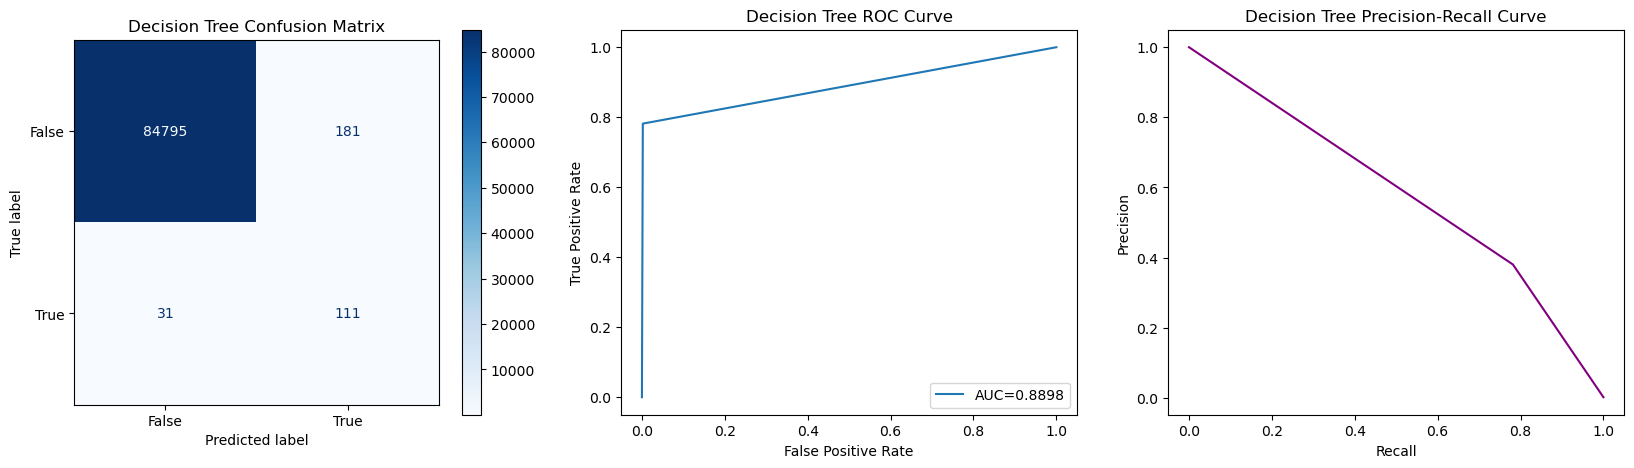

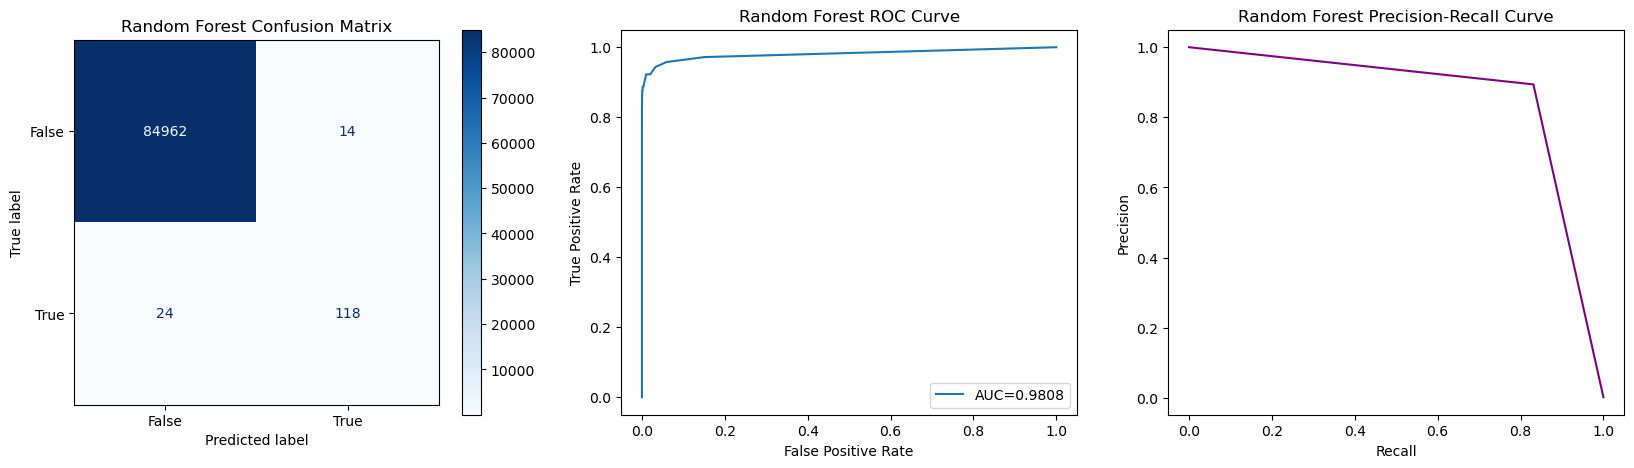

In [915]:
# Score after SMOTE Over Sampling
performance_board_smote = learning_algorithms_spot_check(X_train_smote, y_train_smote, X_test, y_test,
                              'Smote Over Sampled', performance_board)

display(performance_board_smote.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_smote/

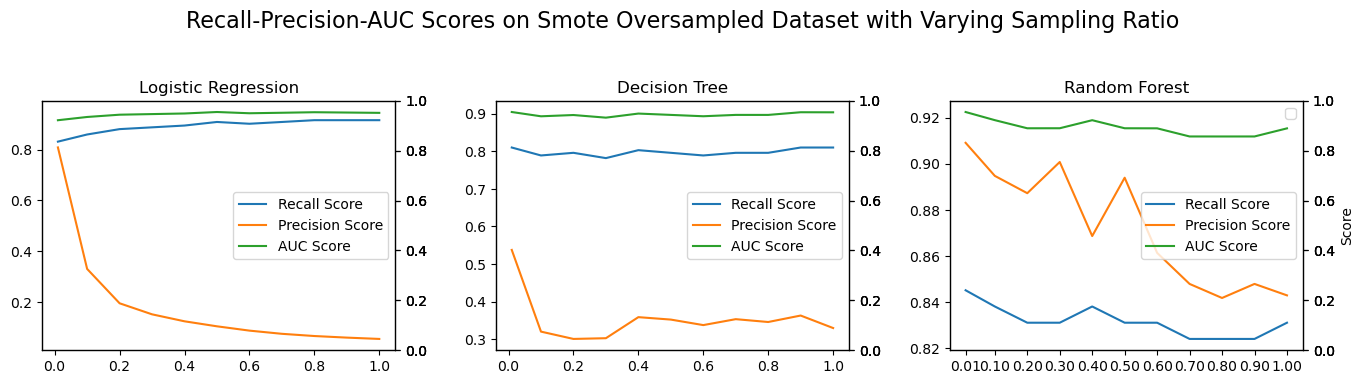

In [364]:
lr_recall_scores, lr_precision_scores, lr_auc_scores, \
dt_recall_scores, dt_precision_scores, dt_auc_scores, \
rf_recall_scores, rf_precision_scores, rf_auc_scores = compute_oversampled_score(X_train, y_train, X_test, y_test, \
                                                                                 'Smote')

plot_scores('Smote', 
                lr_recall_scores, lr_precision_scores, lr_auc_scores, 
                dt_recall_scores, dt_precision_scores, dt_auc_scores,
                rf_recall_scores, rf_precision_scores, rf_auc_scores)

### 6.1.1.3  Borderline Smote oversampling technique
- Similar observation as in Smote oversampling method
- Borderline Smote oversampling yielded improvment of recall score of all 3 predictive models except Decision Tree which stayed the same
- On the other hand precision droped significantly for all predictive models

In [918]:
#Random Oversampling with Borderline SMOTE

BorderLineSmote = BorderlineSMOTE(random_state=0)
X_train_blsmote, y_train_blsmote = BorderLineSmote.fit_resample(X_train, y_train)

print('Amount of fraud labels before BL SMOTE oversampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before BL SMOTE oversampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after BL SMOTE oversampling: {}'.format(np.count_nonzero(y_train_blsmote==1)))
print('Amount of non-fraud labels after BL SMOTE oversampling: {}'.format(np.count_nonzero(y_train_blsmote==0)))

Amount of fraud labels before BL SMOTE oversampling: 331
Amount of non-fraud labels before BL SMOTE oversampling: 198277


Amount of fraud labels after BL SMOTE oversampling: 198277
Amount of non-fraud labels after BL SMOTE oversampling: 198277


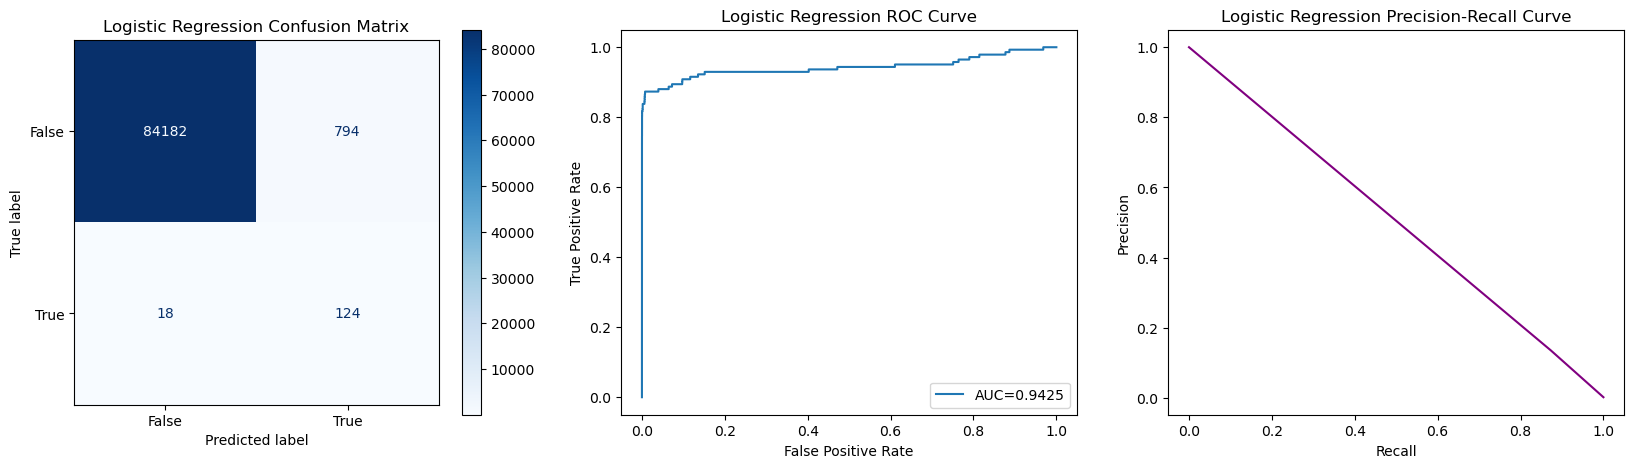

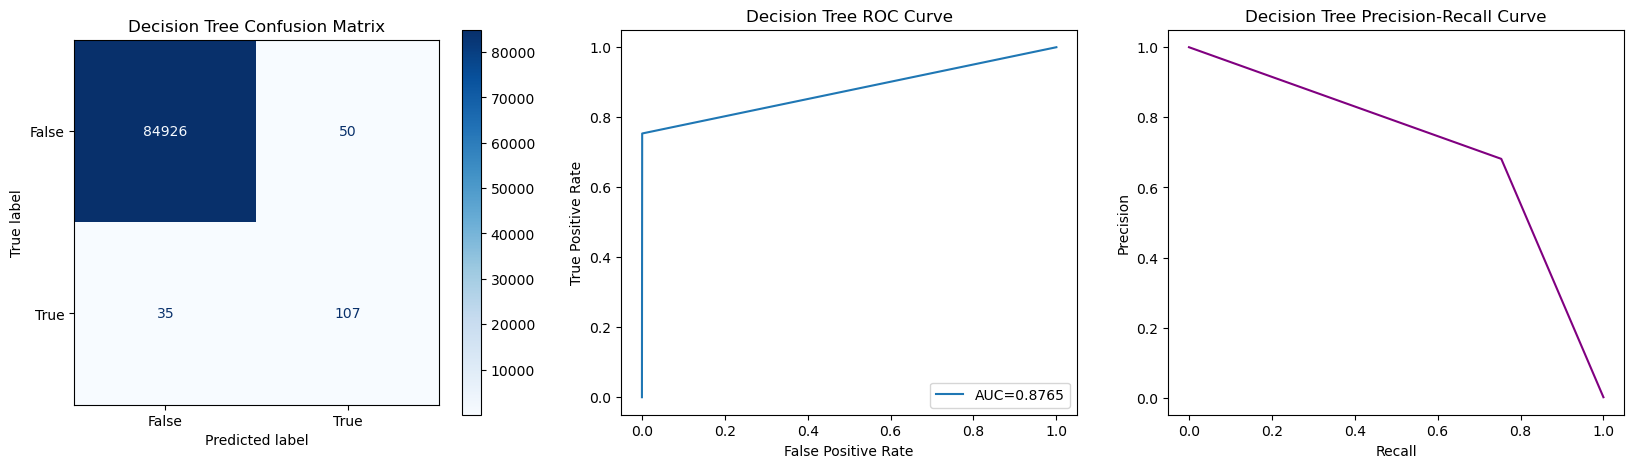

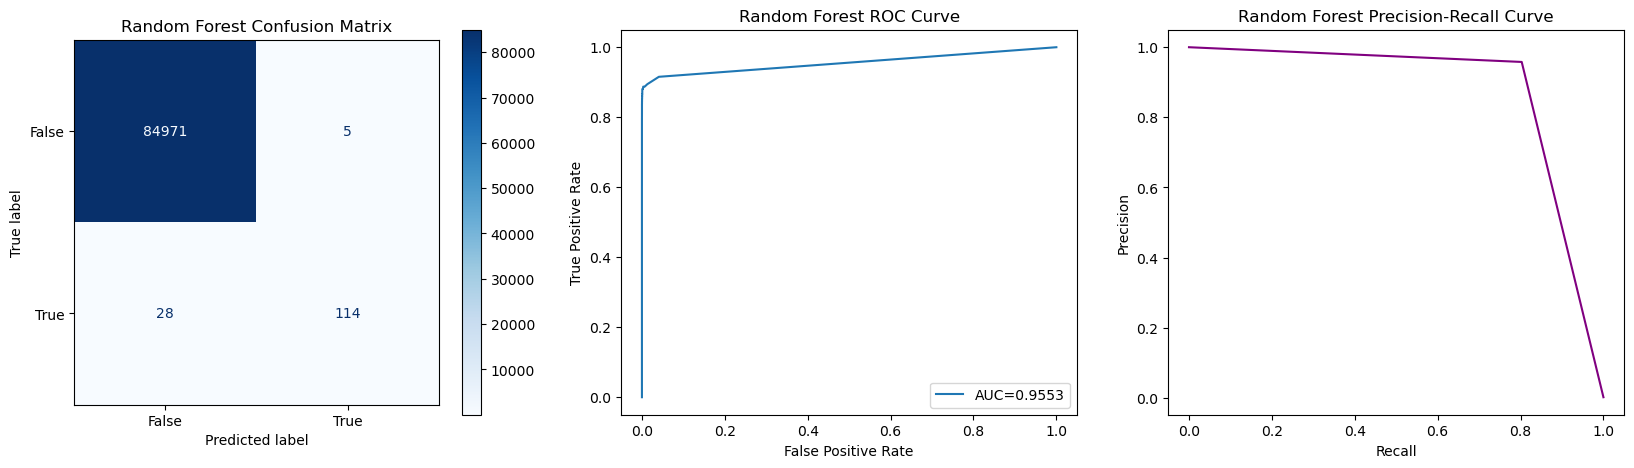

In [919]:
# Score after SMOTE Over Sampling
performance_board_blsomte = learning_algorithms_spot_check(X_train_blsmote, y_train_blsmote, X_test, y_test, 
                                                  'BLSmote Over Sampled', performance_board)

display(performance_board_blsomte.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_smote/filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_smote/filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_smote/filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_

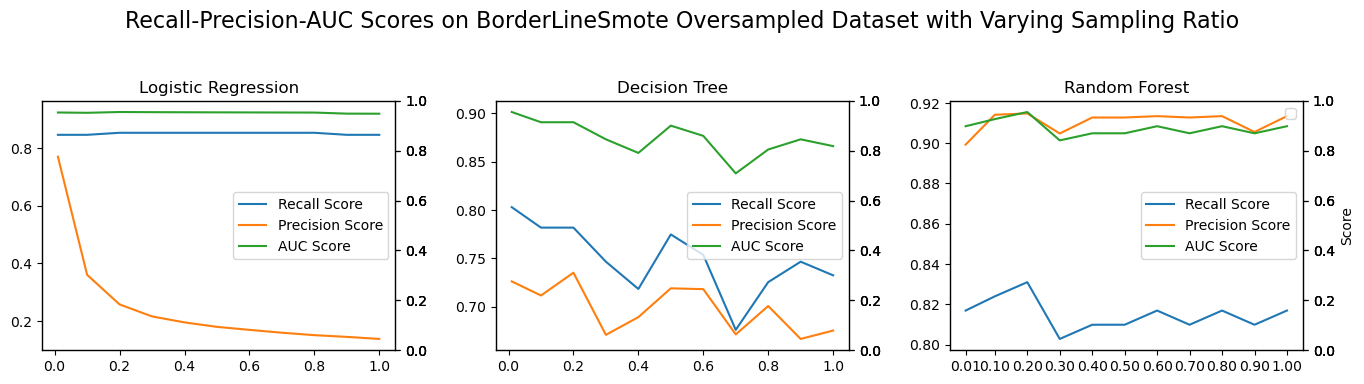

In [366]:
lr_recall_scores, lr_precision_scores, lr_auc_scores, \
dt_recall_scores, dt_precision_scores, dt_auc_scores, \
rf_recall_scores, rf_precision_scores, rf_auc_scores = compute_oversampled_score(X_train, y_train, X_test, y_test, \
                                                                                 'BorderLineSmote')

plot_scores('BorderLineSmote', 
                lr_recall_scores, lr_precision_scores, lr_auc_scores, 
                dt_recall_scores, dt_precision_scores, dt_auc_scores,
                rf_recall_scores, rf_precision_scores, rf_auc_scores)

### 6.1.1.4  SVM Smote oversampling technique
- SVM Smote oversampling method performed slightly better than Smote and Borderline smote oversampling techniques
- Decision Tree showed ~2% increase in recall with less than 1% drop in precision
- Logstic Regression showed massive 20% improvement in recall with a cost of over 70% reduction in precision
- Random Forest showed ~1 increase in recall while precision drops ~4%

In [920]:
#Random Oversampling with SVM SMOTE

SVMSmote = SVMSMOTE(random_state=0)
X_train_svmsmote, y_train_svmsmote = SVMSmote.fit_resample(X_train, y_train)

print('Amount of fraud labels before SVM SMOTE oversampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before SVM SMOTE oversampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after SVM SMOTE oversampling: {}'.format(np.count_nonzero(y_train_svmsmote==1)))
print('Amount of non-fraud labels after SVM SMOTE oversampling: {}'.format(np.count_nonzero(y_train_svmsmote==0)))

Amount of fraud labels before SVM SMOTE oversampling: 331
Amount of non-fraud labels before SVM SMOTE oversampling: 198277


Amount of fraud labels after SVM SMOTE oversampling: 198277
Amount of non-fraud labels after SVM SMOTE oversampling: 198277


In [922]:
# Score after SVM SMOTE Over Sampling
performance_board_svmsmote = learning_algorithms_spot_check(X_train_svmsmote, y_train_svmsmote, X_test, y_test, 
                                                  'SVMSmote Over Sampled', performance_board)

display(performance_board_svmsmote.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_smote/filter.py:461: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_smote/filter.py:461: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_smote/filter.py:461: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_

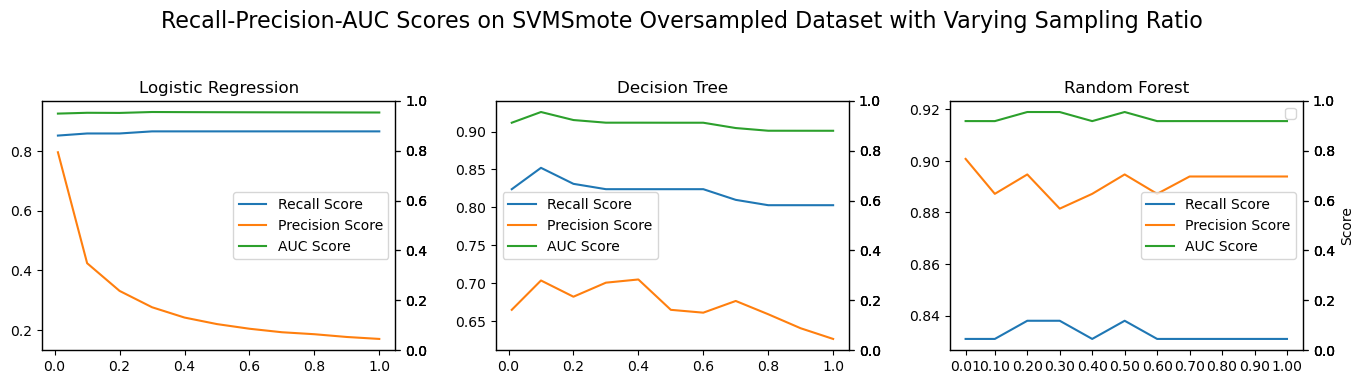

In [368]:
lr_recall_scores, lr_precision_scores, lr_auc_scores, \
dt_recall_scores, dt_precision_scores, dt_auc_scores, \
rf_recall_scores, rf_precision_scores, rf_auc_scores = compute_oversampled_score(X_train, y_train, X_test, y_test, \
                                                                                 'SVMSmote')

plot_scores('SVMSmote', 
                lr_recall_scores, lr_precision_scores, lr_auc_scores, 
                dt_recall_scores, dt_precision_scores, dt_auc_scores,
                rf_recall_scores, rf_precision_scores, rf_auc_scores)

### 6.1.1.5  ADASYN Oversampling technique
ADASYN Oversampling method similar to most of the Smote oversampling methods resulted significant improvement in recall with a big sacrifice on precision performance

In [923]:
#Random Oversampling with ADASYN

ada = ADASYN(random_state=0)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

print('Amount of fraud labels before SVM SMOTE oversampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before SVM SMOTE oversampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after SVM SMOTE oversampling: {}'.format(np.count_nonzero(y_train_ada==1)))
print('Amount of non-fraud labels after SVM SMOTE oversampling: {}'.format(np.count_nonzero(y_train_ada==0)))

Amount of fraud labels before SVM SMOTE oversampling: 331
Amount of non-fraud labels before SVM SMOTE oversampling: 198277


Amount of fraud labels after SVM SMOTE oversampling: 198267
Amount of non-fraud labels after SVM SMOTE oversampling: 198277


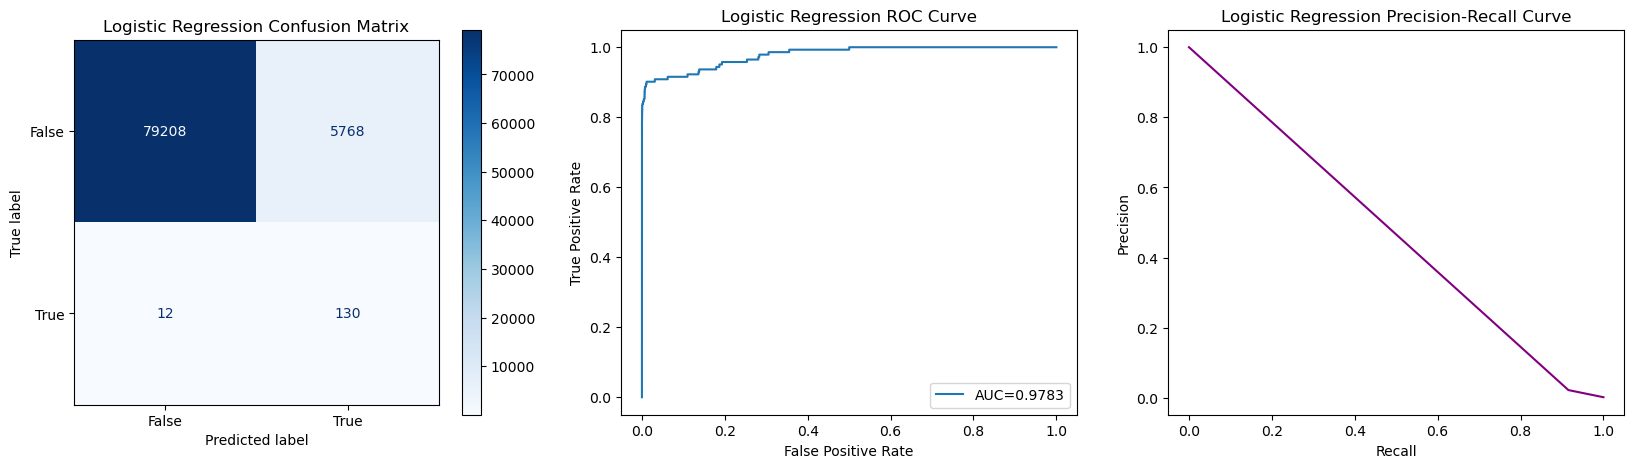

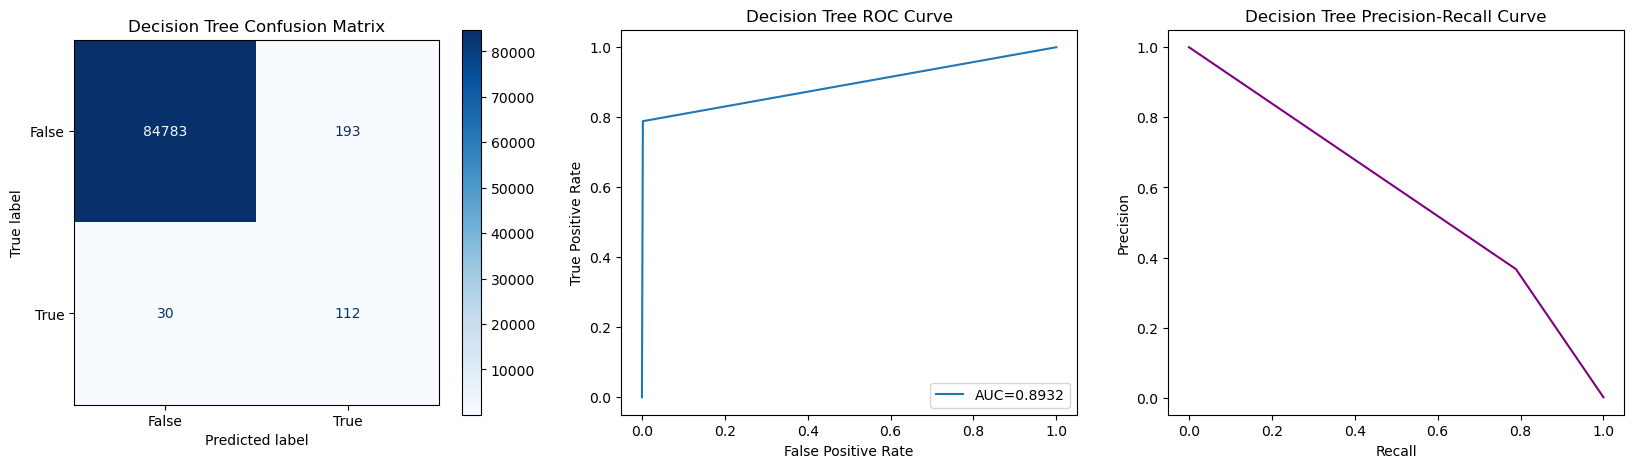

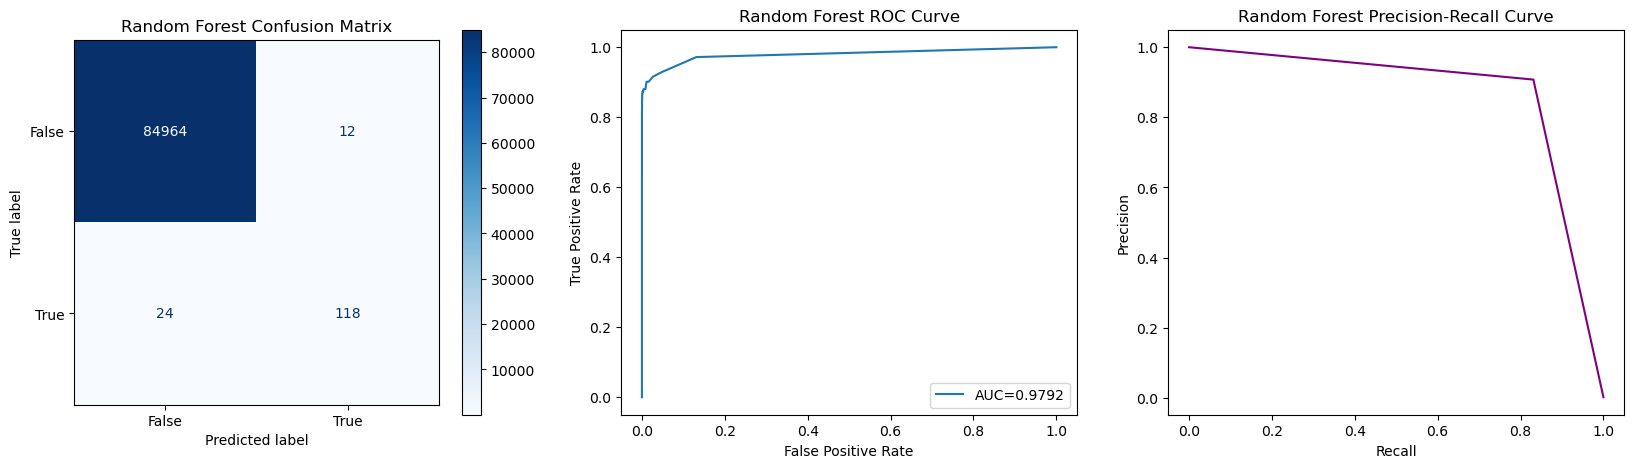

In [924]:
# Score after ADASYN Over Sampling
performance_board_adasyn = learning_algorithms_spot_check(X_train_ada, y_train_ada, X_test, y_test, 
                                                  'ADASYN Over Sampled', performance_board)

display(performance_board_adasyn.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py:156: Fut

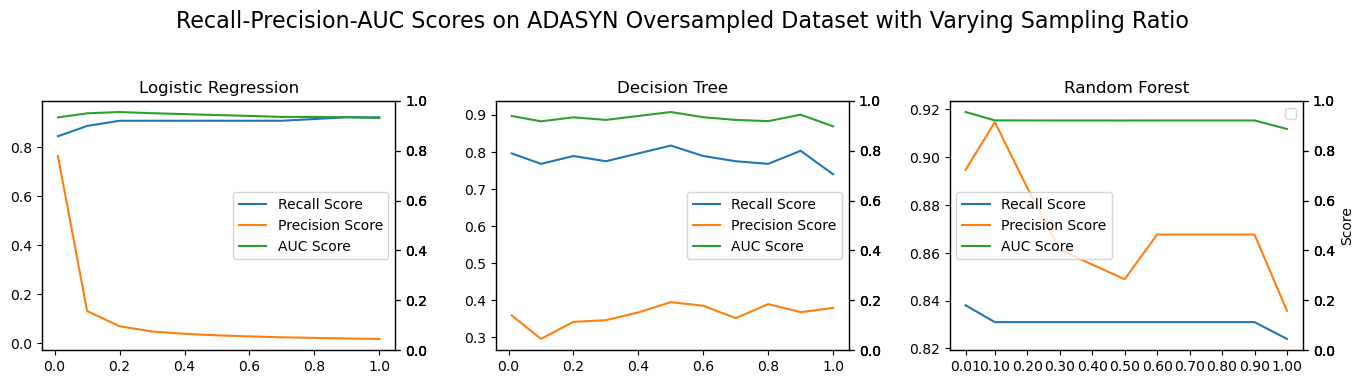

In [370]:
lr_recall_scores, lr_precision_scores, lr_auc_scores, \
dt_recall_scores, dt_precision_scores, dt_auc_scores, \
rf_recall_scores, rf_precision_scores, rf_auc_scores = compute_oversampled_score(X_train, y_train, X_test, y_test, \
                                                                                 'ADASYN')

plot_scores('ADASYN', 
                lr_recall_scores, lr_precision_scores, lr_auc_scores, 
                dt_recall_scores, dt_precision_scores, dt_auc_scores,
                rf_recall_scores, rf_precision_scores, rf_auc_scores)

### 6.1.1.6  K-means Smote oversampling technique
K-Means Smote Oversampling method similar to most of the Smote oversampling methods resulted significant improvement in recall with a big sacrifice on precision performance

In [925]:
#Random Oversampling with KMeansSMOTE

from imblearn.over_sampling import KMeansSMOTE

kmsmote = KMeansSMOTE(random_state=0, n_jobs=-1, cluster_balance_threshold=0.001)
X_train_kmsmote, y_train_kmsmote = kmsmote.fit_resample(X_train, y_train)

print('Amount of fraud labels before SVM SMOTE oversampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before SVM SMOTE oversampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after SVM SMOTE oversampling: {}'.format(np.count_nonzero(y_train_kmsmote==1)))
print('Amount of non-fraud labels after SVM SMOTE oversampling: {}'.format(np.count_nonzero(y_train_kmsmote==0)))

Amount of fraud labels before SVM SMOTE oversampling: 331
Amount of non-fraud labels before SVM SMOTE oversampling: 198277


Amount of fraud labels after SVM SMOTE oversampling: 198279
Amount of non-fraud labels after SVM SMOTE oversampling: 198277


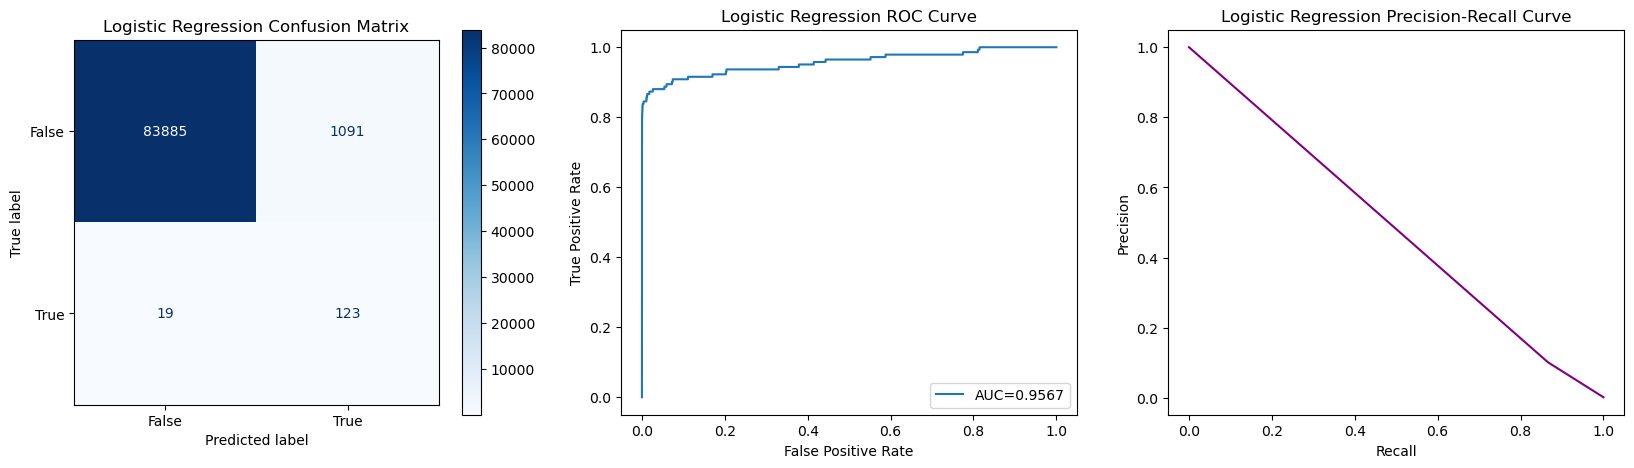

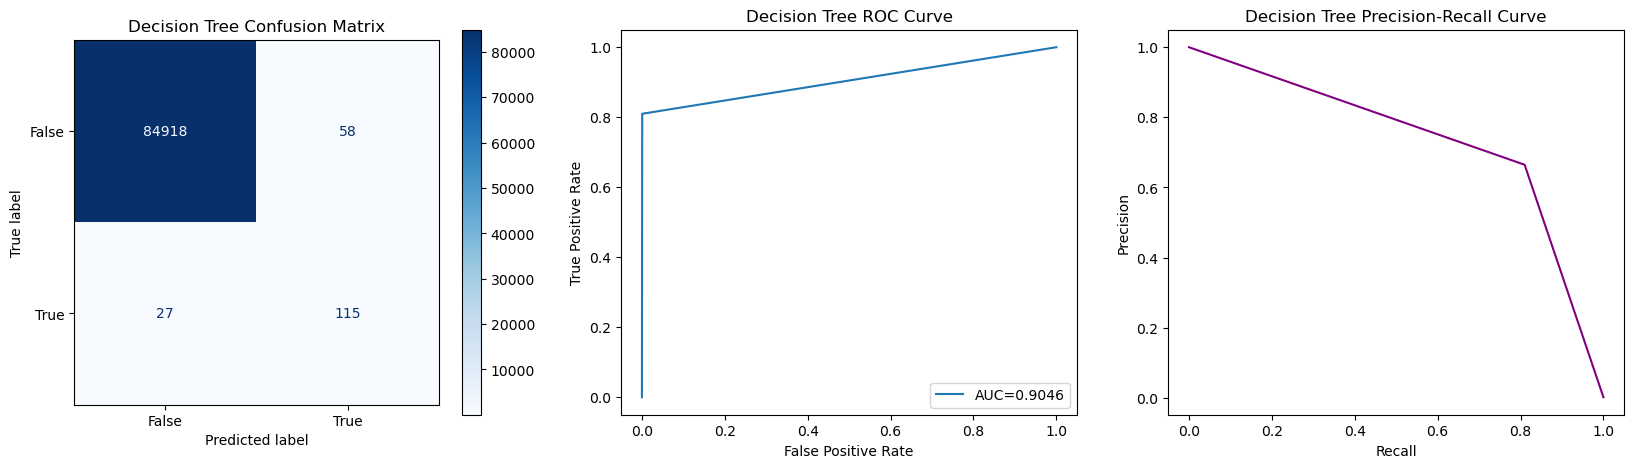

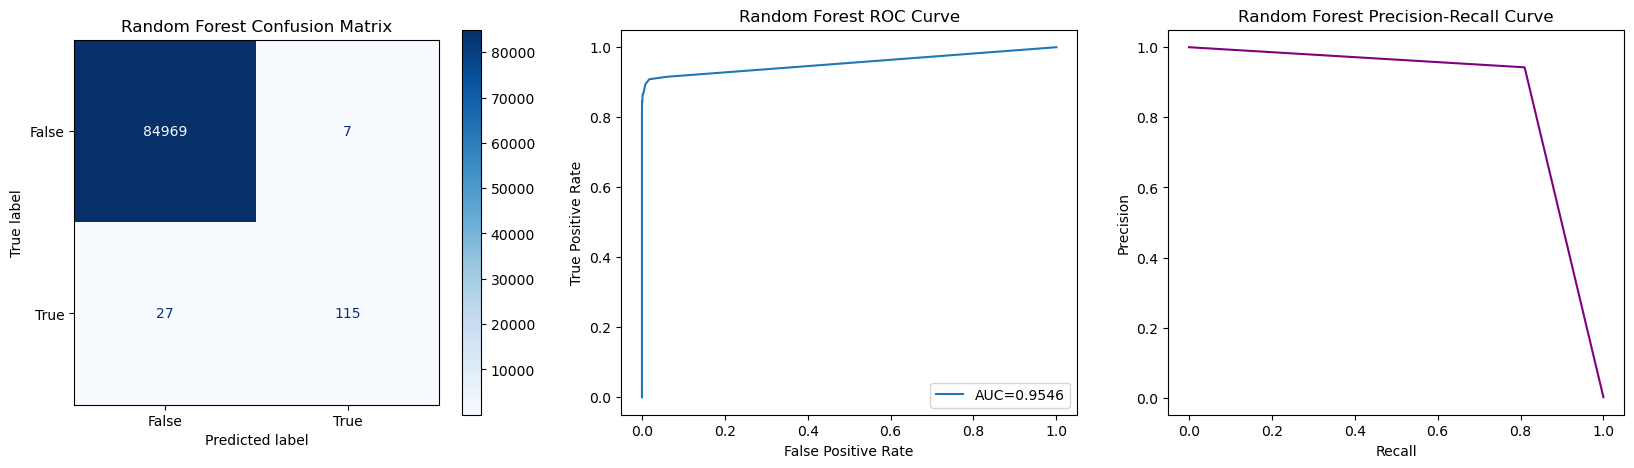

In [926]:
# Score after k-means Over Sampling
performance_board_ksmote = learning_algorithms_spot_check(X_train_kmsmote, y_train_kmsmote, X_test, y_test, 
                                                  'KmeansSmote Over Sampled', performance_board)

display(performance_board_ksmote.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


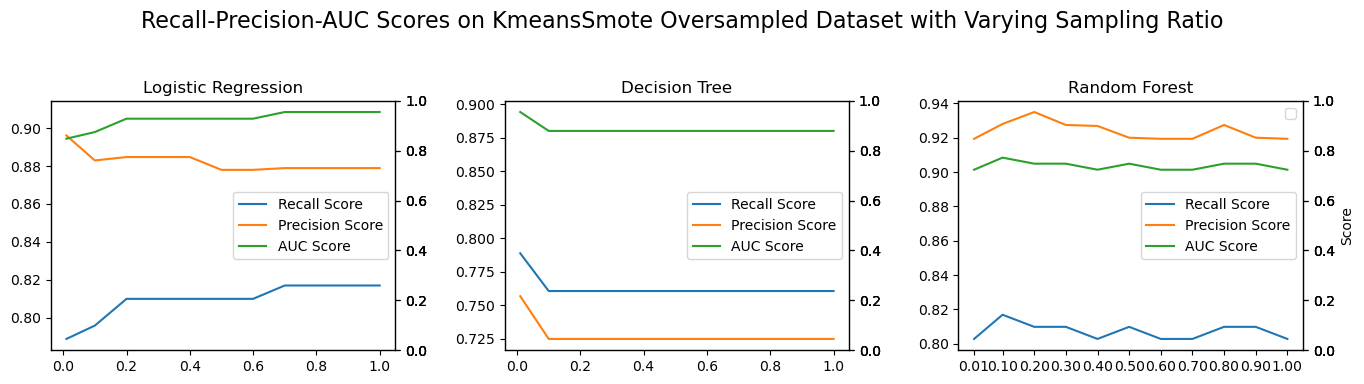

In [395]:
lr_recall_scores, lr_precision_scores, lr_auc_scores, \
dt_recall_scores, dt_precision_scores, dt_auc_scores, \
rf_recall_scores, rf_precision_scores, rf_auc_scores = compute_oversampled_score(X_train_kmsmote, y_train_kmsmote, 
                                                                                 X_test, y_test, \
                                                                                 'KmeansSmote')
plot_scores('KmeansSmote', 
                lr_recall_scores, lr_precision_scores, lr_auc_scores, 
                dt_recall_scores, dt_precision_scores, dt_auc_scores,
                rf_recall_scores, rf_precision_scores, rf_auc_scores)

## 6.1.2 Applying Undersampling Methods <a id='6.1.2'></a>
- Instance Hardness Threshold yielded considerable improvement in the performance of Logistic Regression (>15% increase in recall with only 3% decrease in precision)
- Following undersampling techniques showed significant increase in recall but dramatic loss in precision
    - Random Undersampling
    - Cluster Centroids
    - Condensed Nearest Neighbor
    - Near Miss 
- Following undersampling techniques showed promising yet not improved results across all 3 models
    - Neighbourhood Cleaning Rule
    - Tomeklinks
    - One Sided Selection
    - Edited Nearest Neighbours
    - Repeated Edited NearestNeighbours
    - AllKNN
    - Instance Hardness Threshold (except Logisti Regression)

### 6.1.2.1 Random undersamping technique
Significant increase on recall metric while precision dips enormoulsy for all 3 models

In [259]:
performance_board_us = performance_board

In [167]:
#Random Undersampling
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Amount of fraud labels before random undersampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before random undersampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after random undersampling: {}'.format(np.count_nonzero(y_train_rus==1)))
print('Amount of non-fraud labels after random undersampling: {}'.format(np.count_nonzero(y_train_rus==0)))

Amount of fraud labels before random undersampling: 331
Amount of non-fraud labels before random undersampling: 198277


Amount of fraud labels after random undersampling: 331
Amount of non-fraud labels after random undersampling: 331


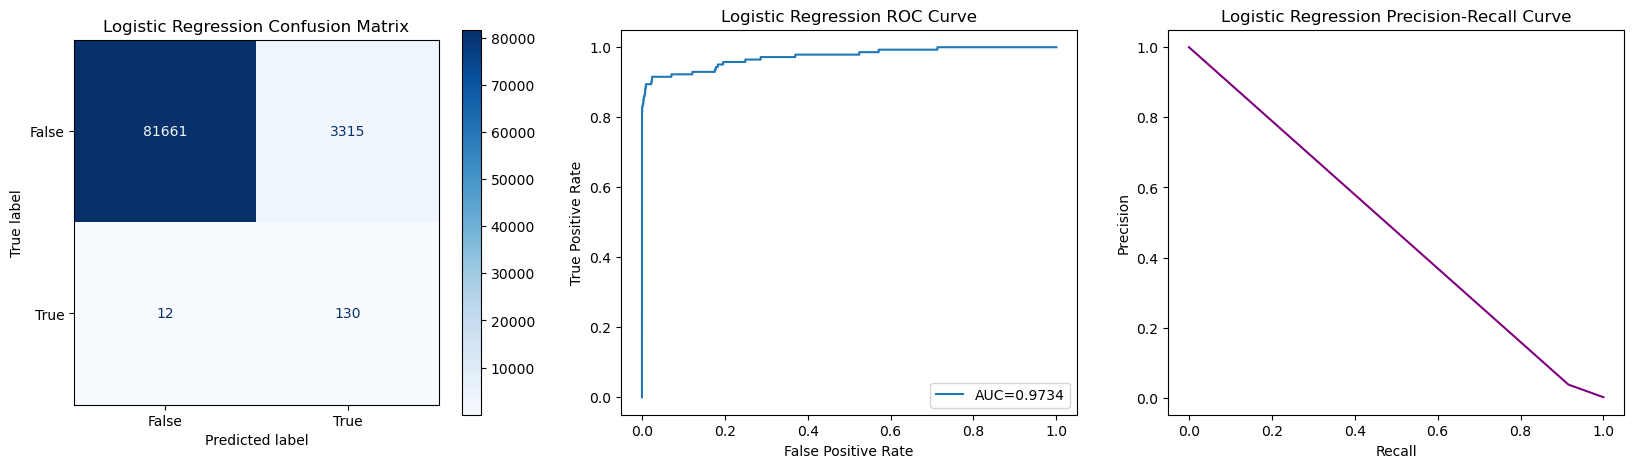

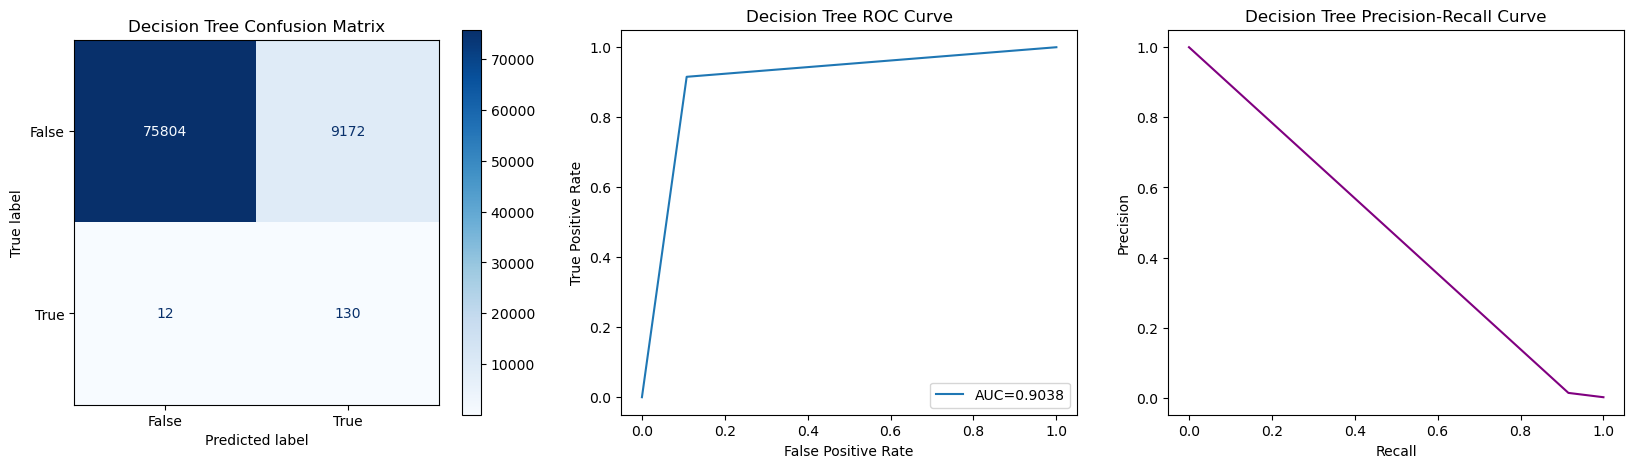

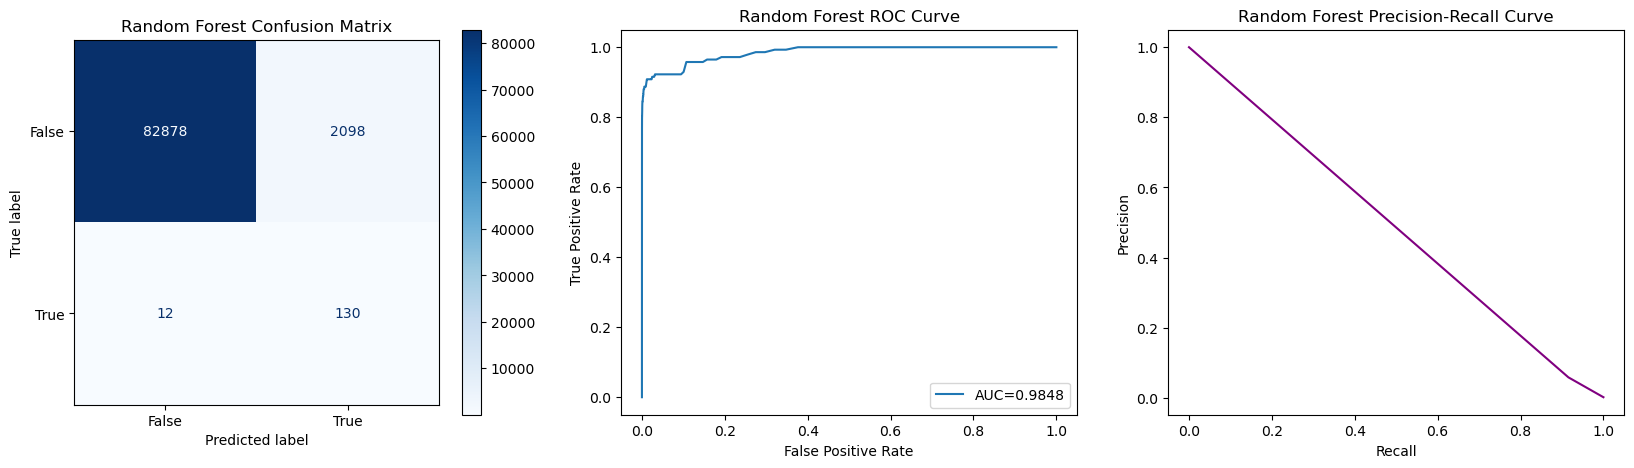

In [260]:
# Score after Random under sampling


performance_board_us = learning_algorithms_spot_check(X_train_rus, y_train_rus, X_test, y_test, 
                                                  'Random Under Sampled', performance_board_us)

display(performance_board_us.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 6.1.2.2 Cluster Centroids undersampling technique
- Similiar result compared to previous undersampling method(s)
- Significant increase on recall metric for all 3 models while precision dipped (<1%)

In [172]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=0)
X_train_cc, y_train_cc = cc.fit_resample(X_train, y_train)

print('Amount of fraud labels before ClusterCentroid undersampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before ClusterCentroid undersampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after ClusterCentroid undersampling: {}'.format(y_train_cc[y_train_cc==1].count()))
print('Amount of non-fraud labels after ClusterCentroid undersampling: {}'.format(y_train_cc[y_train_cc==0].count()))

Amount of fraud labels before ClusterCentroid undersampling: 331
Amount of non-fraud labels before ClusterCentroid undersampling: 198277


Amount of fraud labels after ClusterCentroid undersampling: 331
Amount of non-fraud labels after ClusterCentroid undersampling: 331


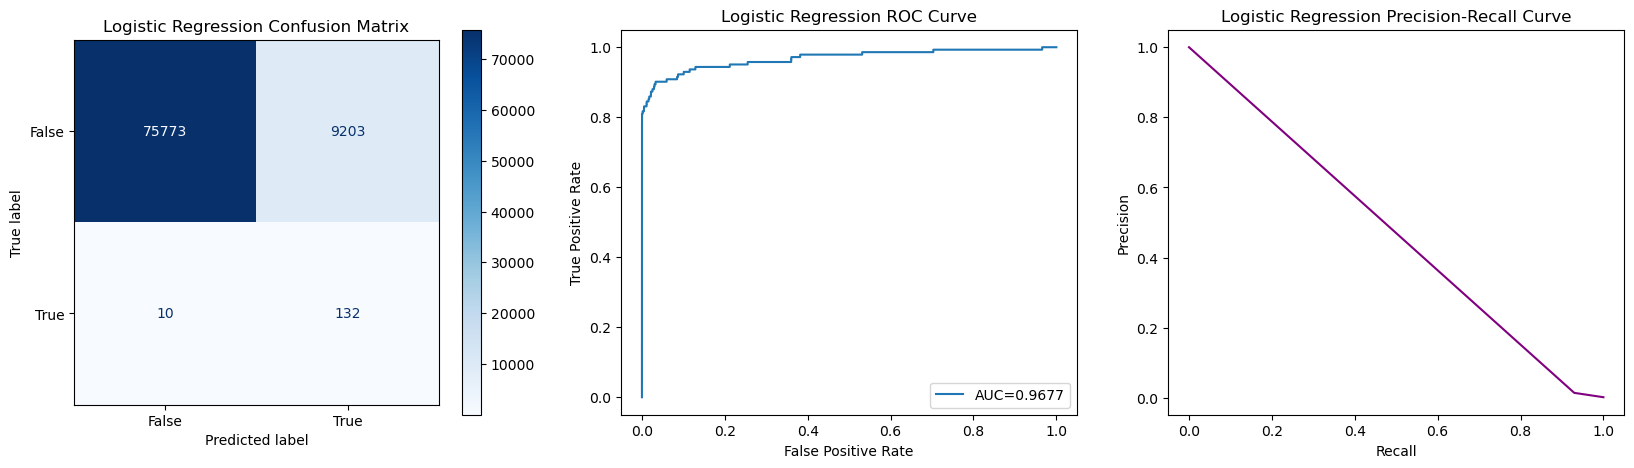

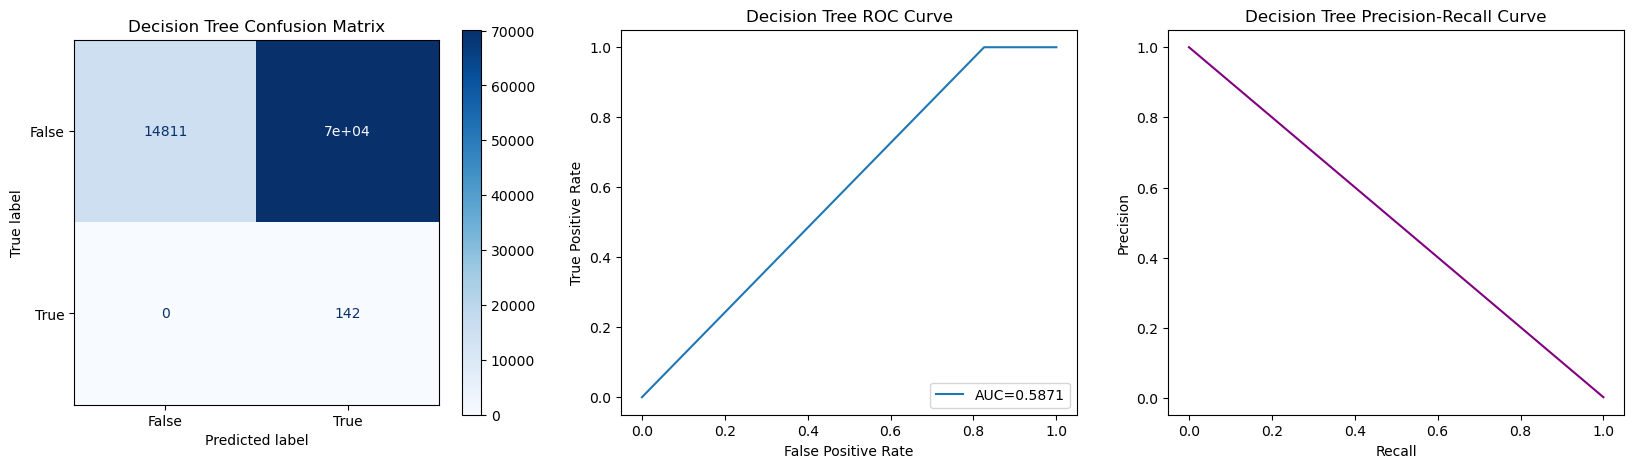

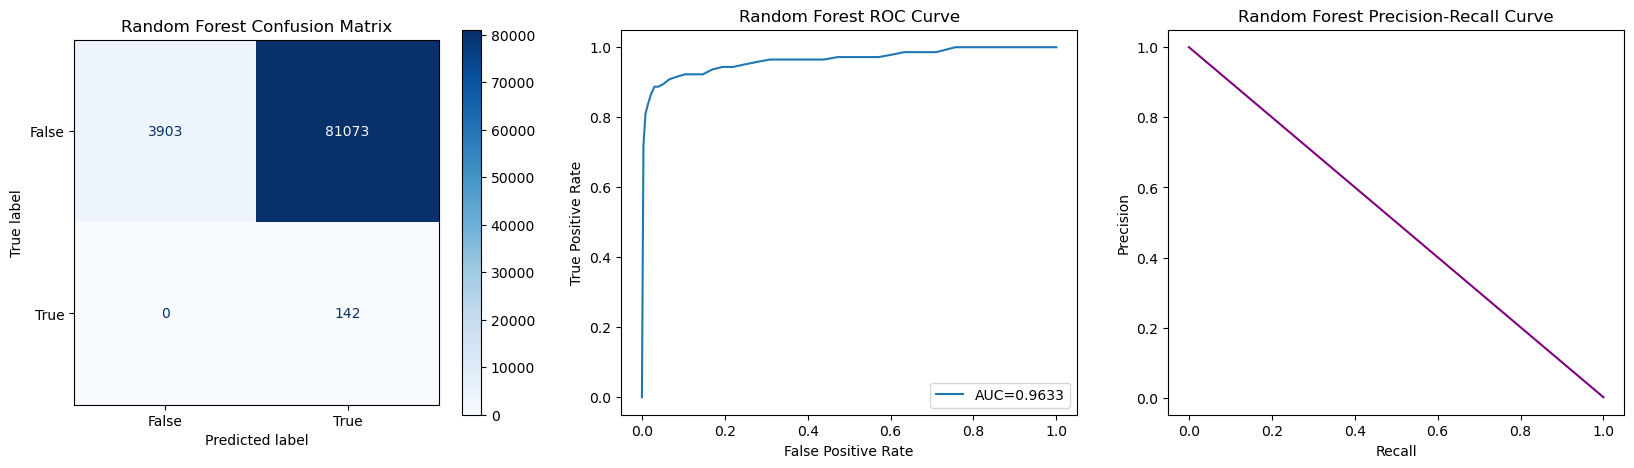

In [261]:
# Score after Clusterc under sampling
performance_board_us = learning_algorithms_spot_check(X_train_cc, y_train_cc, X_test, y_test, 
                                                  'Cluster Centroid Under Sampled', performance_board_us)

display(performance_board_us.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 6.1.2.3 Condensed Nearest Neighbor Undersampling Technique
- Similiar result compared to previous undersampling method(s)
- Significant increase on recall metric for all 3 models while precision dipped (<1%)

In [178]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Error with CondensedNearestNeighbour
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(random_state=0, n_jobs=-1)
X_train_cnn, y_train_cnn = cnn.fit_resample(X_train, y_train)

print('Amount of fraud labels before CNN undersampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before CNN undersampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after CNN undersampling: {}'.format(np.count_nonzero(y_train_cnn==1)))
print('Amount of non-fraud labels after CNN undersampling: {}'.format(np.count_nonzero(y_train_cnn==0)))

Amount of fraud labels before CNN undersampling: 331
Amount of non-fraud labels before CNN undersampling: 198277


Amount of fraud labels after CNN undersampling: 331
Amount of non-fraud labels after CNN undersampling: 1875


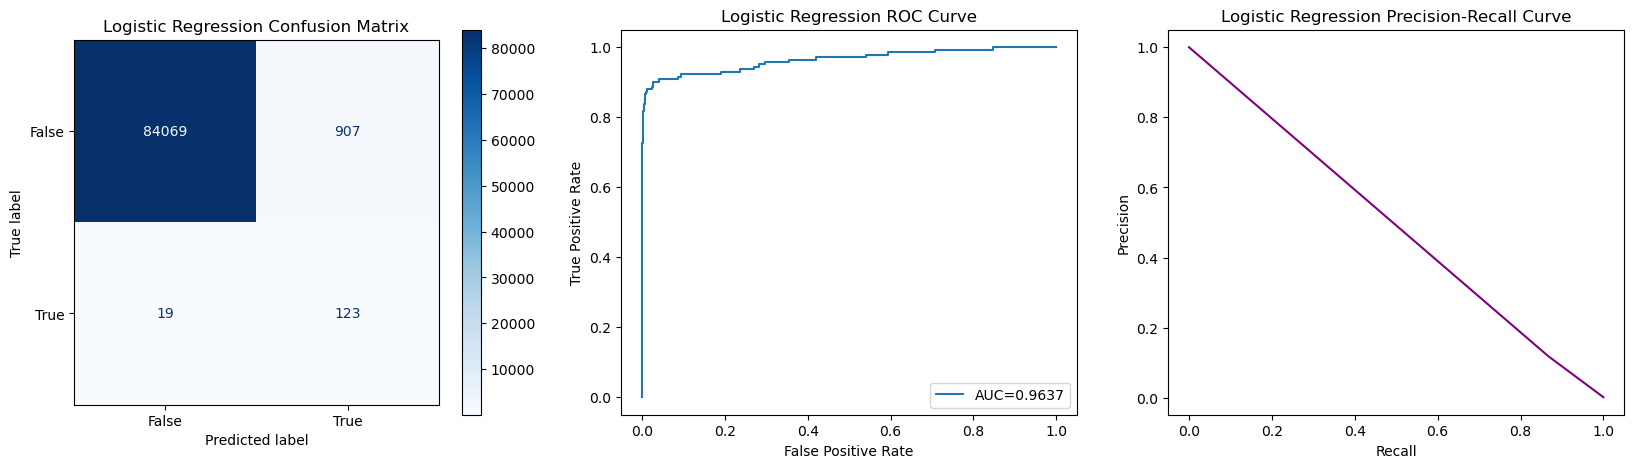

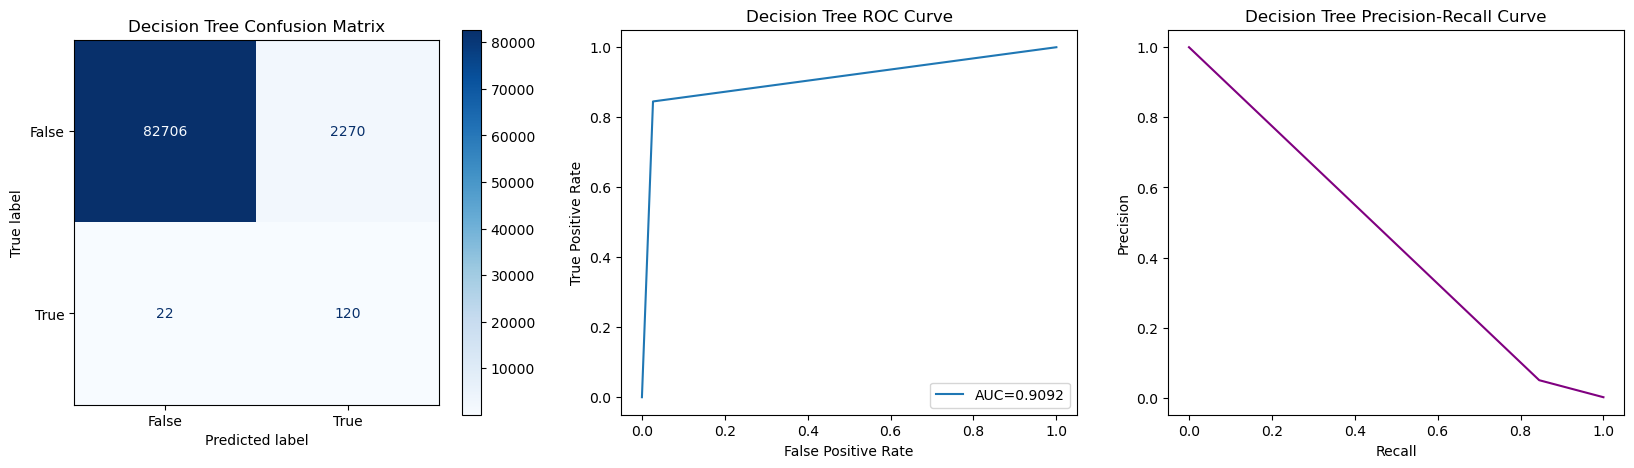

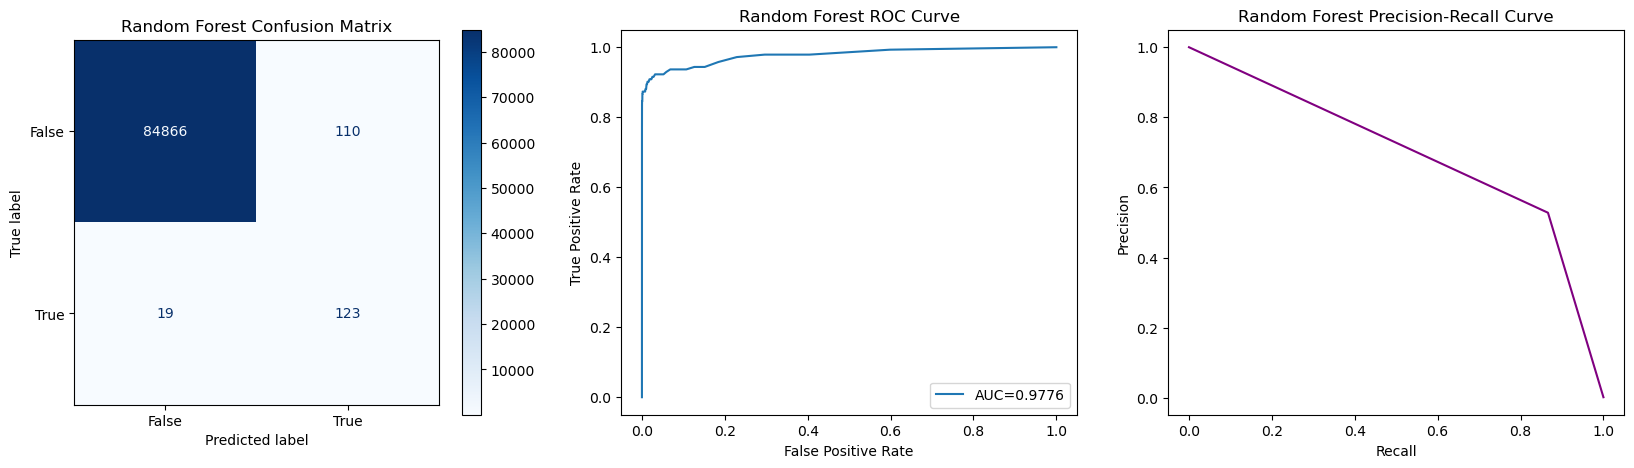

In [262]:
# Score after CNN under sampling
performance_board_us = learning_algorithms_spot_check(X_train_cnn, y_train_cnn, X_test, y_test, 
                                                  'CNN Under Sampled', performance_board_us)

display(performance_board_us.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 6.1.2.4 NearMiss undersampling technique
- Similiar result compared to previous undersampling method(s)
- Significant increase on recall metric for all 3 models while precision dipped (<1%)

In [180]:
#Random Undersampling with NearMiss method
nmiss = NearMiss()
X_train_nmiss, y_train_nmiss = nmiss.fit_resample(X_train, y_train)

print('Amount of fraud labels before NearMiss undersampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before NearMiss undersampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after NearMiss undersampling: {}'.format(np.count_nonzero(y_train_nmiss==1)))
print('Amount of non-fraud labels after NearMiss undersampling: {}'.format(np.count_nonzero(y_train_nmiss==0)))

Amount of fraud labels before NearMiss undersampling: 331
Amount of non-fraud labels before NearMiss undersampling: 198277


Amount of fraud labels after NearMiss undersampling: 331
Amount of non-fraud labels after NearMiss undersampling: 331


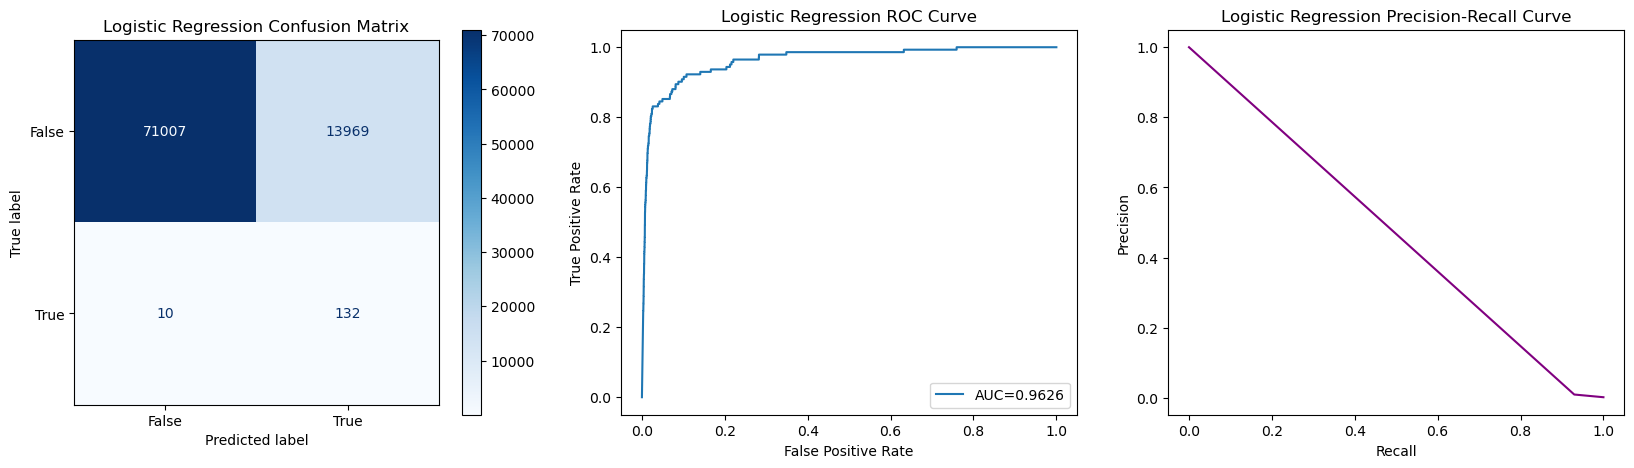

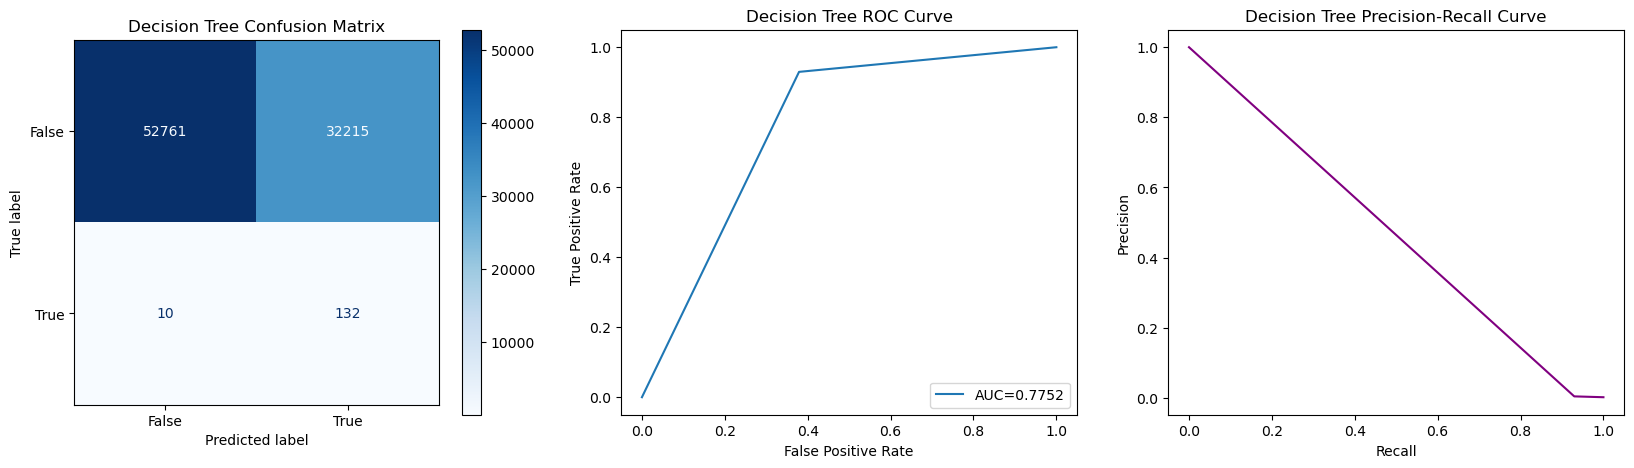

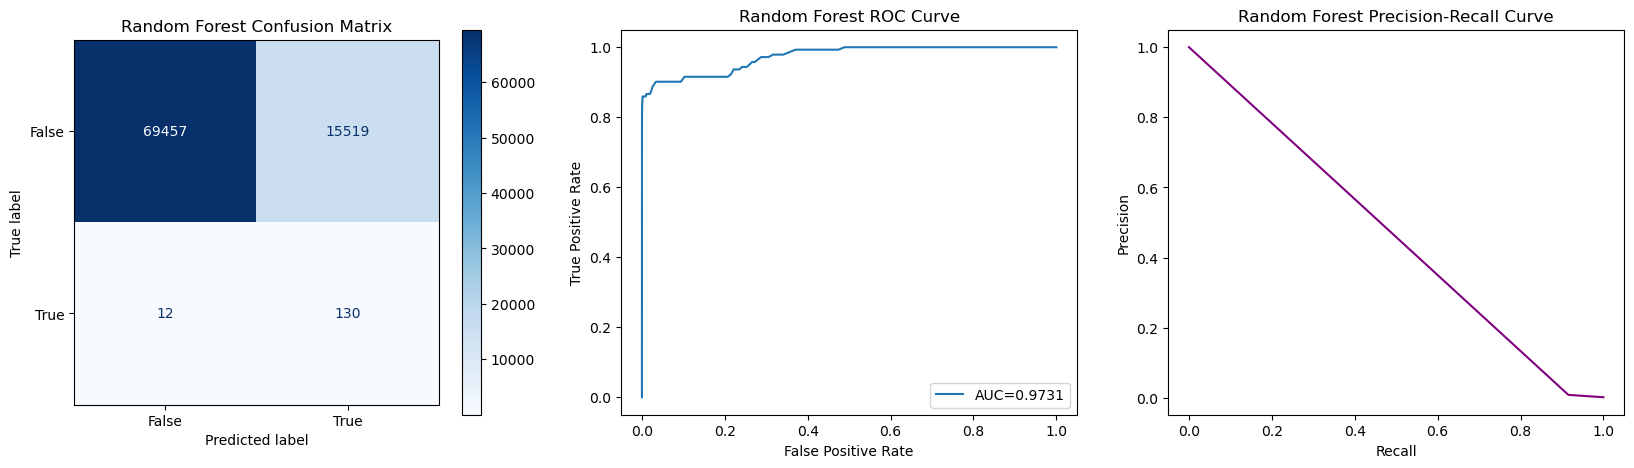

In [263]:
# Score after NearMiss under sampling
performance_board_us = learning_algorithms_spot_check(X_train_nmiss, y_train_nmiss, X_test, y_test, 
                                                  'NearMiss Under Sampled', performance_board_us)

display(performance_board_us.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 6.1.2.5 Tomeklinks undersampling technique
- Tomeklinks undersampling technique shows promising yet not improved results compared to previous undersampling method(s)
- Both recall and AUC metrics are very close to baseline performance but not better

In [182]:
# Random Undersampling with TomekLinks method

tmkl = TomekLinks(n_jobs=-1)
X_train_tmkl, y_train_tmkl = tmkl.fit_resample(X_train, y_train)

print('Amount of fraud labels before TomekLinks undersampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before TomekLinks undersampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after TomekLinks undersampling: {}'.format(np.count_nonzero(y_train_tmkl==1)))
print('Amount of non-fraud labels after TomekLinks undersampling: {}'.format(np.count_nonzero(y_train_tmkl==0)))

Amount of fraud labels before TomekLinks undersampling: 331
Amount of non-fraud labels before TomekLinks undersampling: 198277


Amount of fraud labels after TomekLinks undersampling: 331
Amount of non-fraud labels after TomekLinks undersampling: 198210


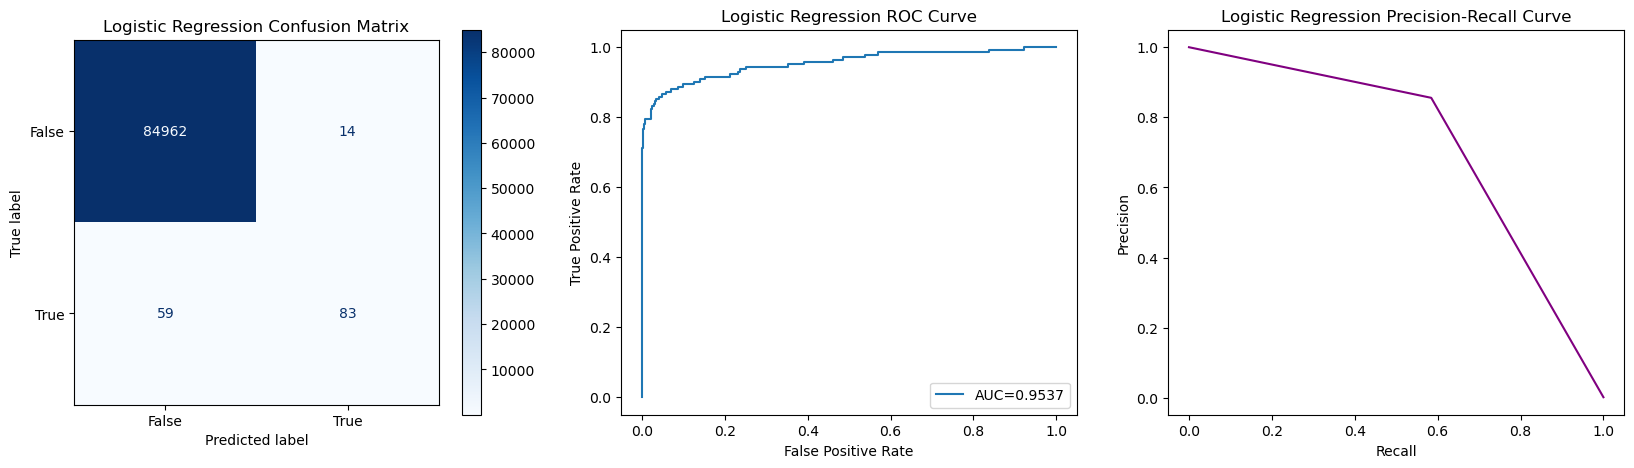

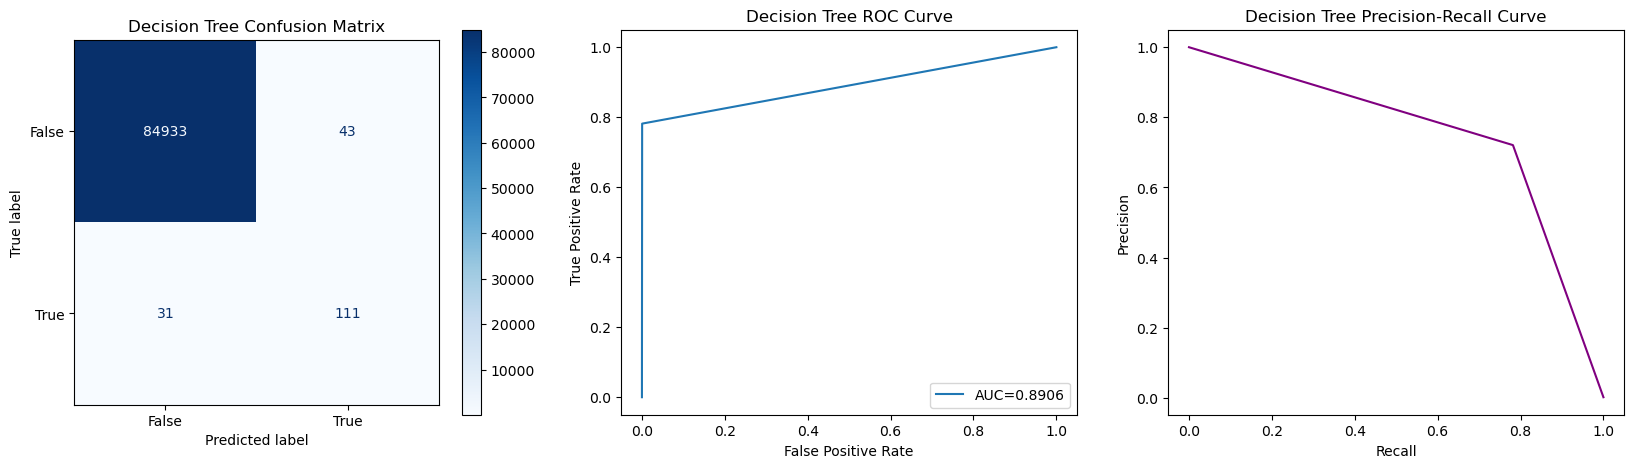

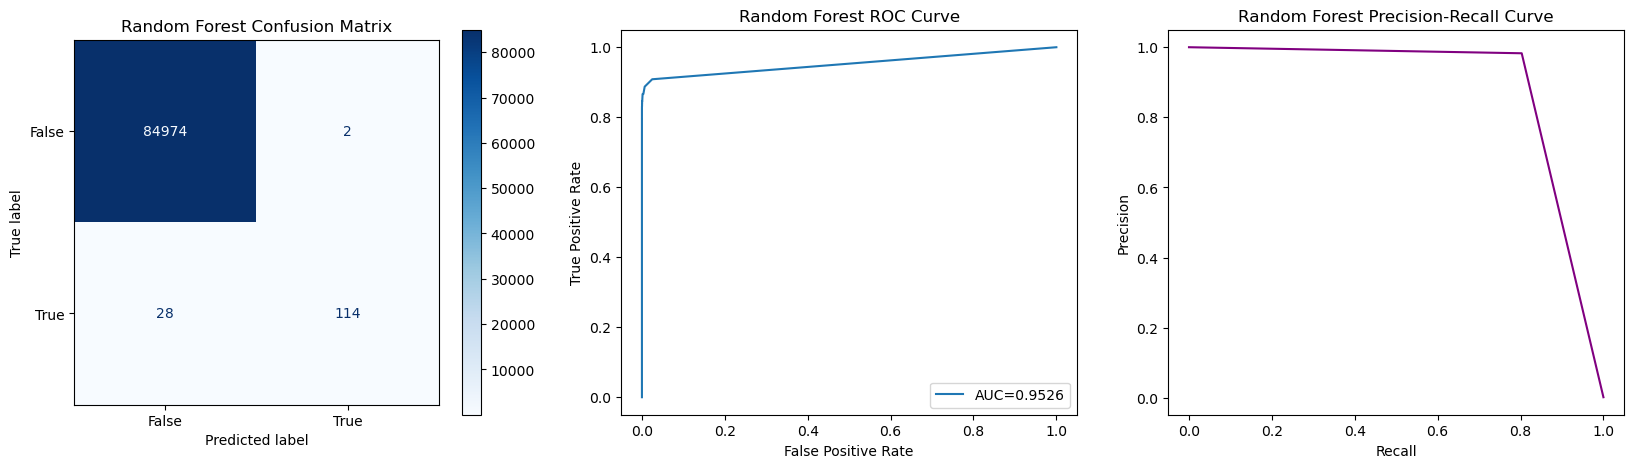

In [264]:
# Score after Tomeklinks under sampling
performance_board_us = learning_algorithms_spot_check(X_train_tmkl, y_train_tmkl, X_test, y_test, 
                                                  'Tomeklinks Under Sampled', performance_board_us)

display(performance_board_us.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 6.1.2.6 OneSidedSelection undersampling technique
- OneSidedSelection undersampling technique (similar to Tomeklinks) shows promising yet not improved results across all 3models compared to previous undersampling method(s)
- Decision Tree model shows exact same recall while precision improved by 2%
- Logistic Regression shows roughly 1% decrease on both recall and precision 
- Random Forest shows shows roughly 1% decrease on recall while precision improved by 3%

In [184]:
#Random Undersampling with OneSidedSelection method

oss = OneSidedSelection(random_state=0, n_jobs=-1)
X_train_oss, y_train_oss = oss.fit_resample(X_train, y_train)

#Sanity check on the distribution
print('Amount of fraud labels before Onesided selection undersampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before Onesided selection undersampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after Onesided selection undersampling: {}'.format(np.count_nonzero(y_train_oss==1)))
print('Amount of non-fraud labels after Onesided selection undersampling: {}'.format(np.count_nonzero(y_train_oss==0)))

Amount of fraud labels before Onesided selection undersampling: 331
Amount of non-fraud labels before Onesided selection undersampling: 198277


Amount of fraud labels after Onesided selection undersampling: 331
Amount of non-fraud labels after Onesided selection undersampling: 195976


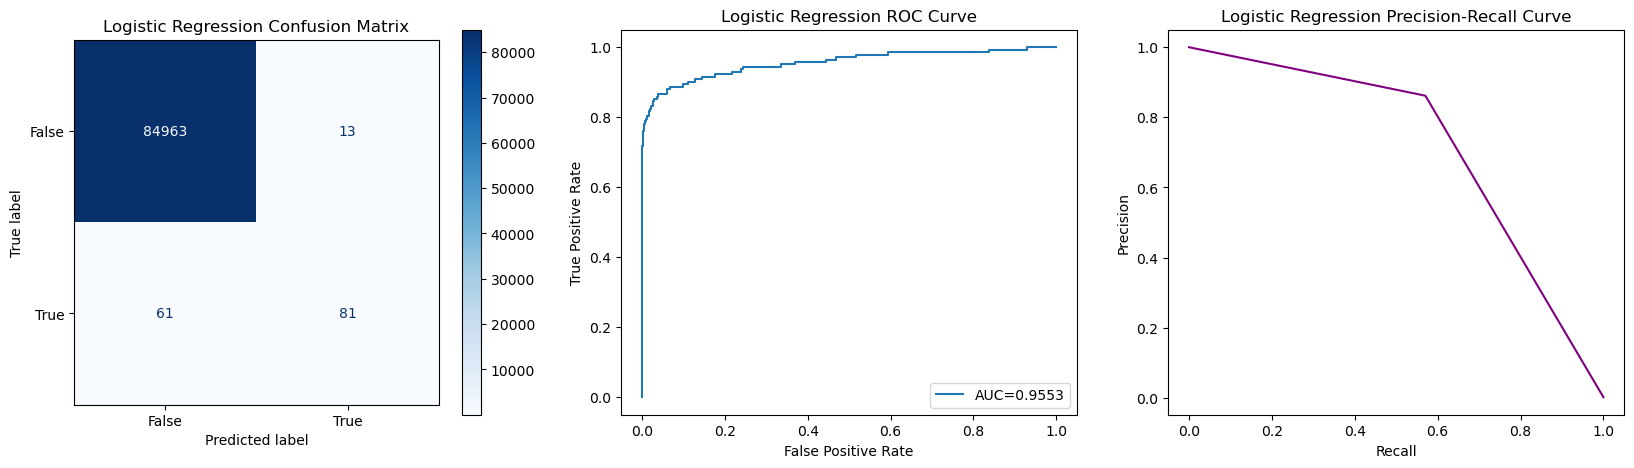

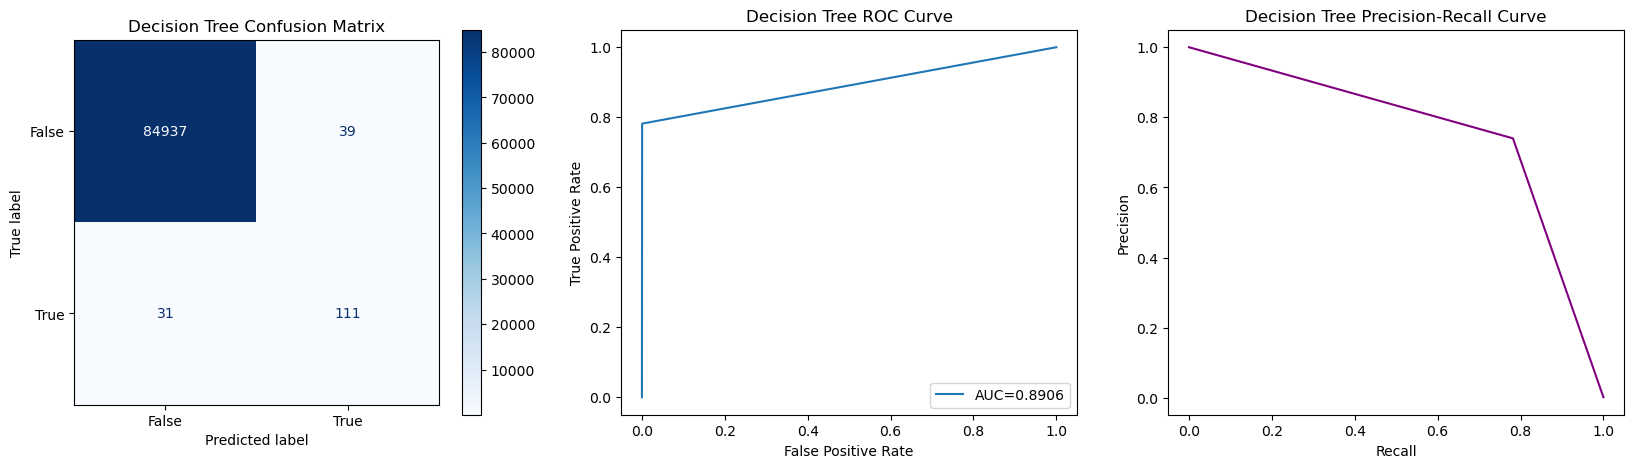

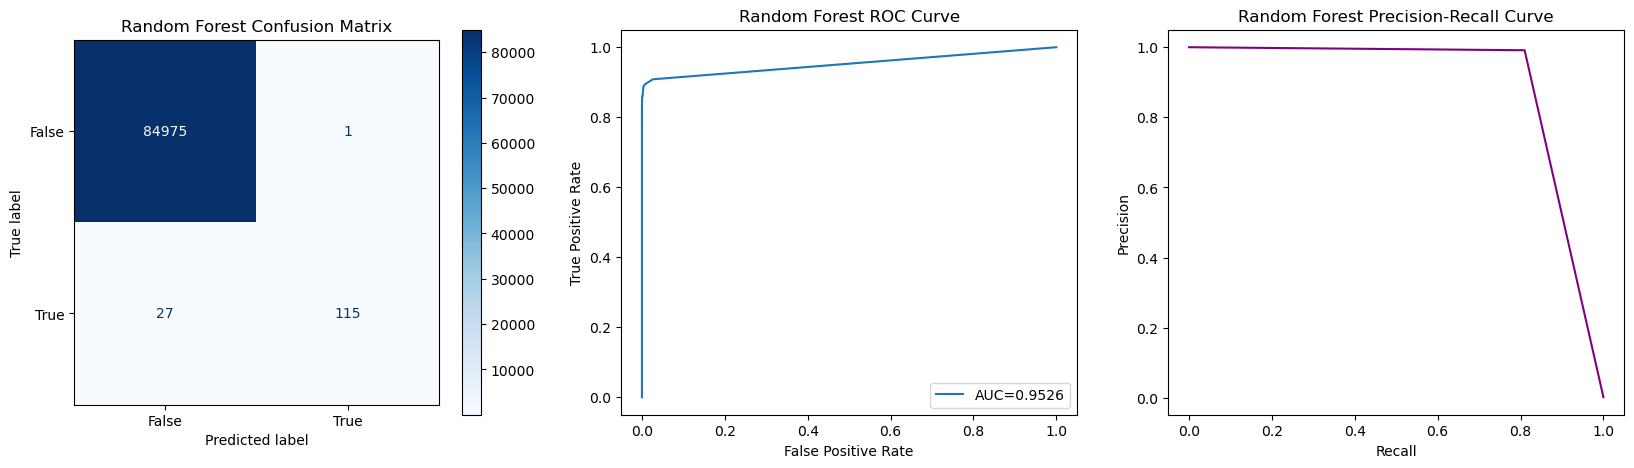

In [265]:
# Score after OneSidedSelection under sampling
performance_board_us = learning_algorithms_spot_check(X_train_oss, y_train_oss, X_test, y_test, 
                                                  'OneSidedSelection Under Sampled', performance_board_us)

display(performance_board_us.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 6.1.2.7 EditedNearestNeighbours undersampling technique
- EditedNearestNeighbours undersampling technique (similar to Tomeklinks and OneSidedSelection) shows promising yet not improved results across all 3 models compared to previous undersampling method(s)
- Decision Tree model shows exact same recall while precision improved by 2%
- Logistic Regression shows roughly 3% decrease in recall and 2% decrease in precision 
- Random Forest shows shows roughly 1% decrease in recall while precision improved by 3%

In [ ]:
#Random Undersampling with EditedNearestNeighbours method

from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(n_jobs=-1)
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)

#Sanity check on the distribution
print('Amount of fraud labels before EditedNearestNeighbours undersampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before EditedNearestNeighbours undersampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after EditedNearestNeighbours undersampling: {}'.format(np.count_nonzero(y_train_enn==1)))
print('Amount of non-fraud labels after EditedNearestNeighbours undersampling: {}'.format(np.count_nonzero(y_train_enn==0)))

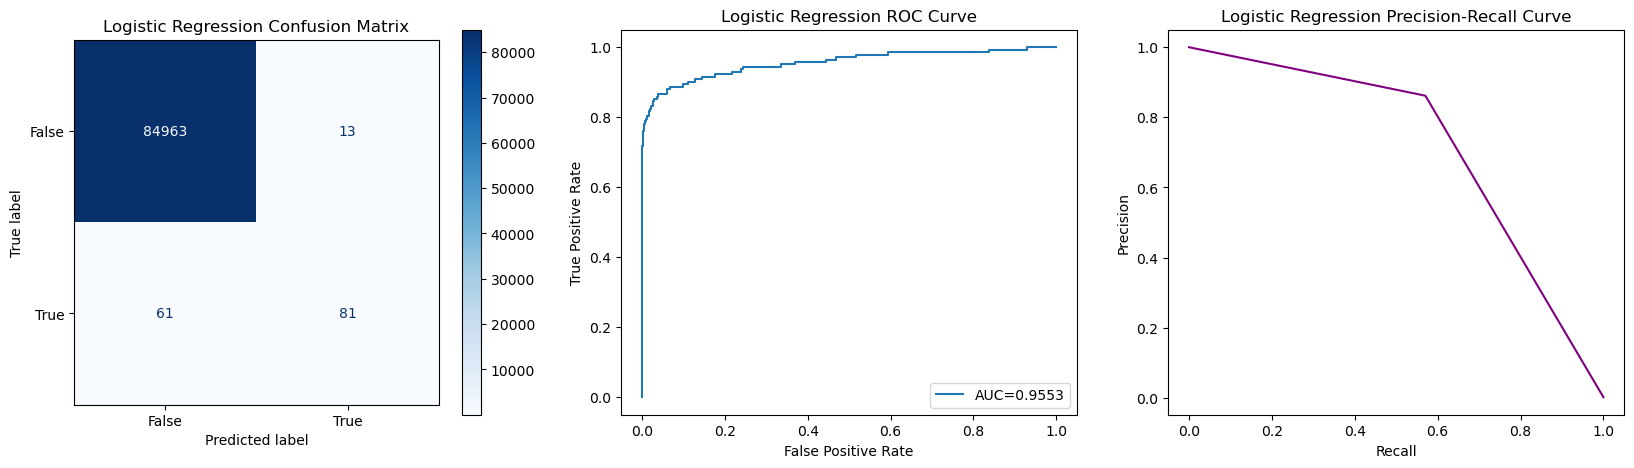

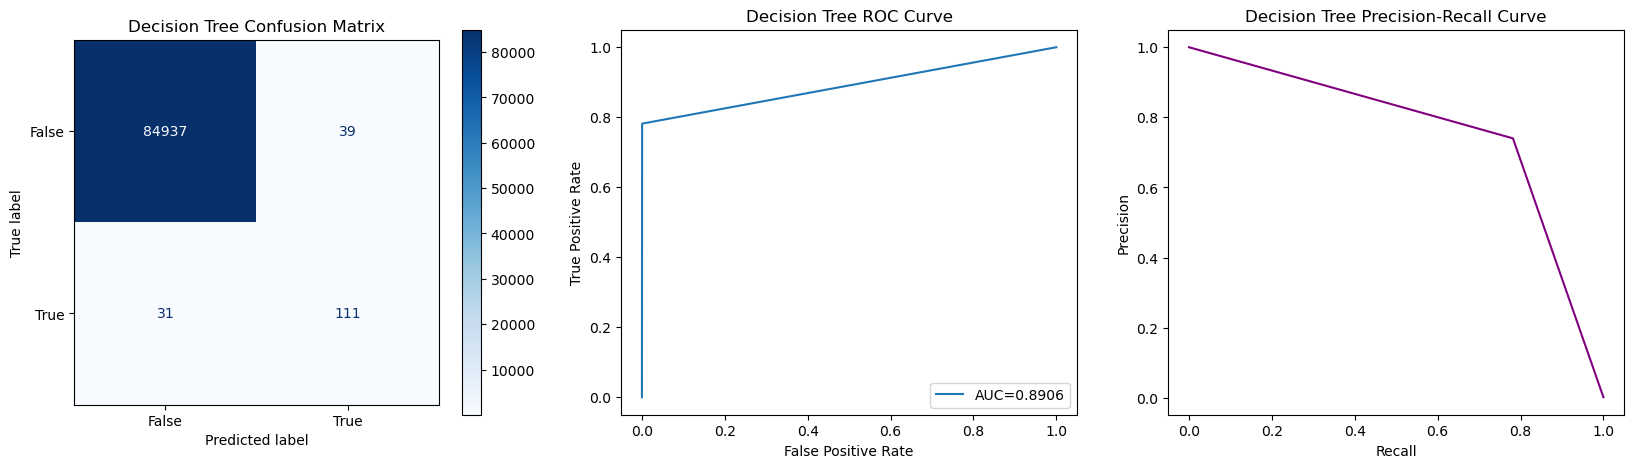

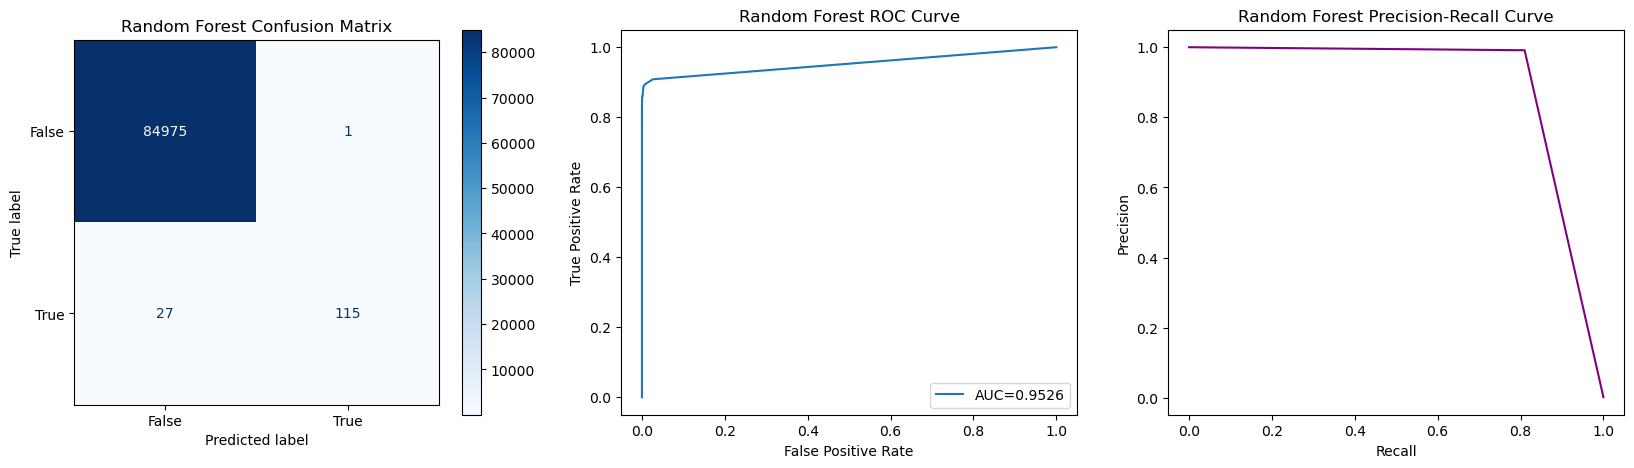

In [266]:
# Score after EditedNearestNeighbours under sampling
performance_board_us = learning_algorithms_spot_check(X_train_oss, y_train_oss, X_test, y_test, 
                                                  'EditedNearestNeighbours Under Sampled', performance_board_us)

display(performance_board_us.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 6.1.2.8 RepeatedEditedNearestNeighbours undersampling technique
- RepeatedEditedNearestNeighbours undersampling technique (similar to Tomeklinks, OneSidedSelection, EditedNearestNeighbours) shows promising yet not improved results across all 3 models compared to previous undersampling method(s)
- Decision Tree model shows roughly 1% decrease in recall and ~4% decrease in precision
- Logistic Regression shows roughly 3% decrease in recall precision 
- Random Forest shows shows roughly 1% decrease in recall while precision improved by 3%

In [188]:
#Random Undersampling with RepeatedEditedNearestNeighbours method

from imblearn.under_sampling import RepeatedEditedNearestNeighbours

renn = RepeatedEditedNearestNeighbours(n_jobs=-1)
X_train_renn, y_train_renn = renn.fit_resample(X_train, y_train)

#Sanity check on the distribution
print('Amount of fraud labels before RepeatedEditedNearestNeighbours undersampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before RepeatedEditedNearestNeighbours undersampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after RepeatedEditedNearestNeighbours undersampling: {}'.format(np.count_nonzero(y_train_renn==1)))
print('Amount of non-fraud labels after RepeatedEditedNearestNeighbours undersampling: {}'.format(np.count_nonzero(y_train_renn==0)))

Amount of fraud labels before RepeatedEditedNearestNeighbours undersampling: 331
Amount of non-fraud labels before RepeatedEditedNearestNeighbours undersampling: 198277


Amount of fraud labels after RepeatedEditedNearestNeighbours undersampling: 331
Amount of non-fraud labels after RepeatedEditedNearestNeighbours undersampling: 197749


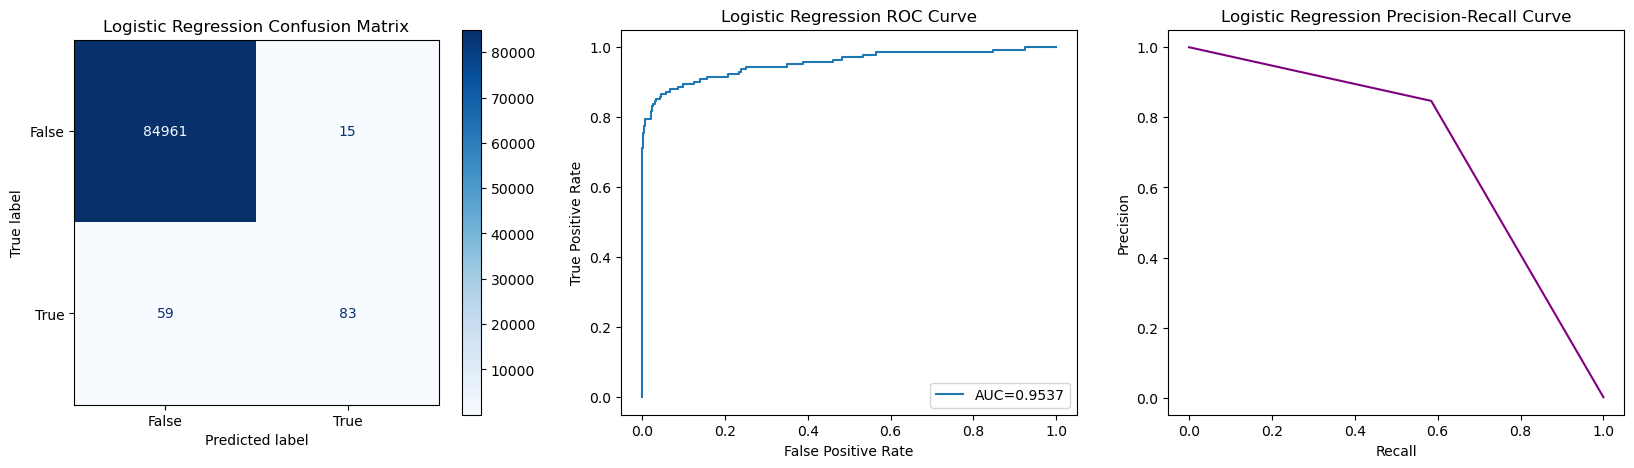

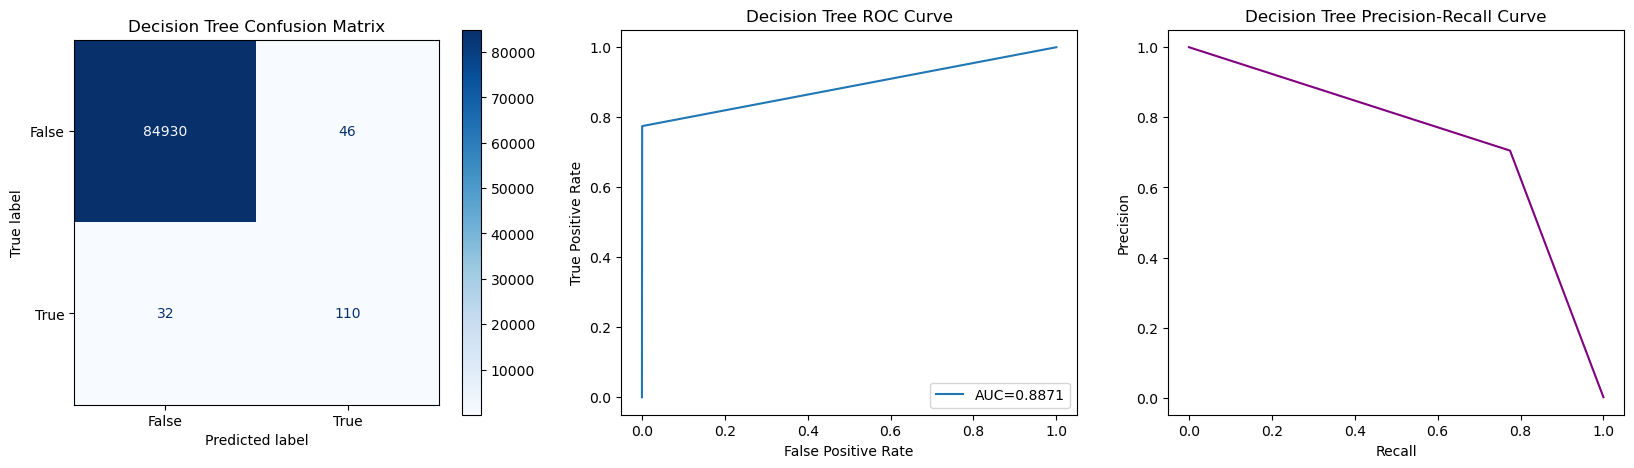

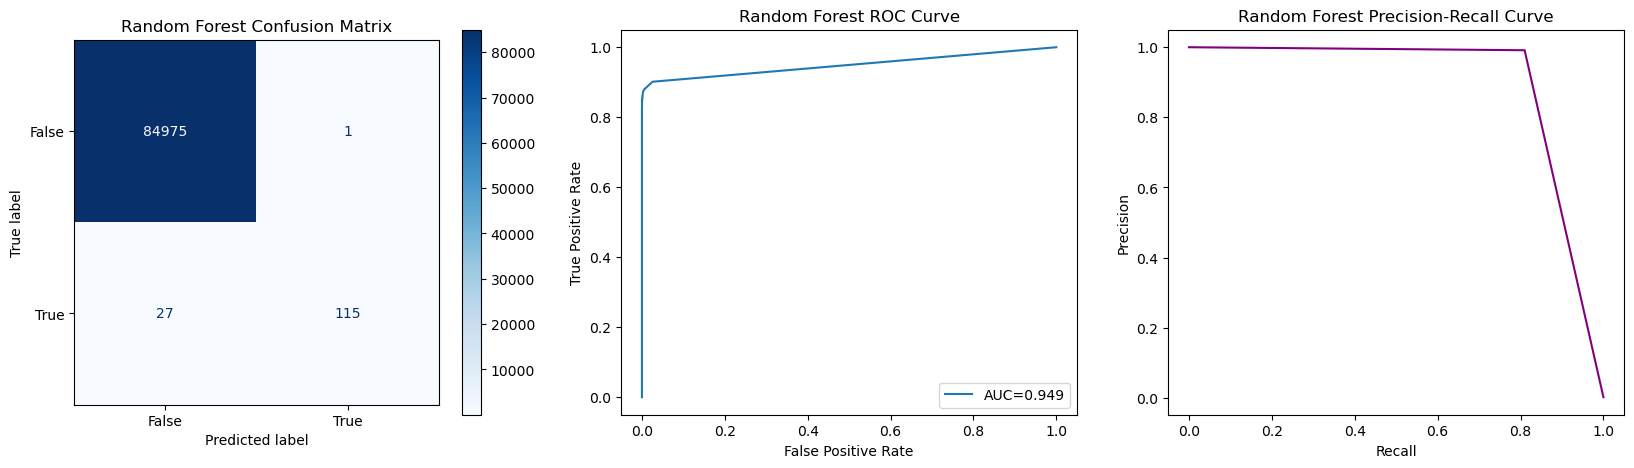

In [267]:
# Score after RepeatedEditedNearestNeighbours undersampling
performance_board_us = learning_algorithms_spot_check(X_train_renn, y_train_renn, X_test, y_test, 
                                                  'RepeatedEditedNearestNeighbours Under Sampled', performance_board_us)

display(performance_board_us.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 6.1.2.9 AllKNN undersampling technique
- AllKNN undersampling technique (similar to Tomeklinks, OneSidedSelection, EditedNearestNeighbours and RepeatedEditedNearestNeighbours) shows promising yet not improved results across all 3 models compared to previous undersampling method(s)
- Decision Tree model shows roughly 1% decrease in recall and ~2% decrease in precision
- Logistic Regression shows roughly 2% decrease in recall precision 
- Random Forest shows shows roughly 1% decrease in recall while precision improved by 1%

In [190]:
#Random Undersampling with AllKNN method

from imblearn.under_sampling import AllKNN

allknn = AllKNN(n_jobs=-1)
X_train_allknn, y_train_allknn = allknn.fit_resample(X_train, y_train)

#Sanity check on the distribution
print('Amount of fraud labels before AllKNN undersampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before AllKNN undersampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after AllKNN undersampling: {}'.format(np.count_nonzero(y_train_allknn==1)))
print('Amount of non-fraud labels after AllKNN undersampling: {}'.format(np.count_nonzero(y_train_allknn==0)))

Amount of fraud labels before AllKNN undersampling: 331
Amount of non-fraud labels before AllKNN undersampling: 198277


Amount of fraud labels after AllKNN undersampling: 331
Amount of non-fraud labels after AllKNN undersampling: 197834


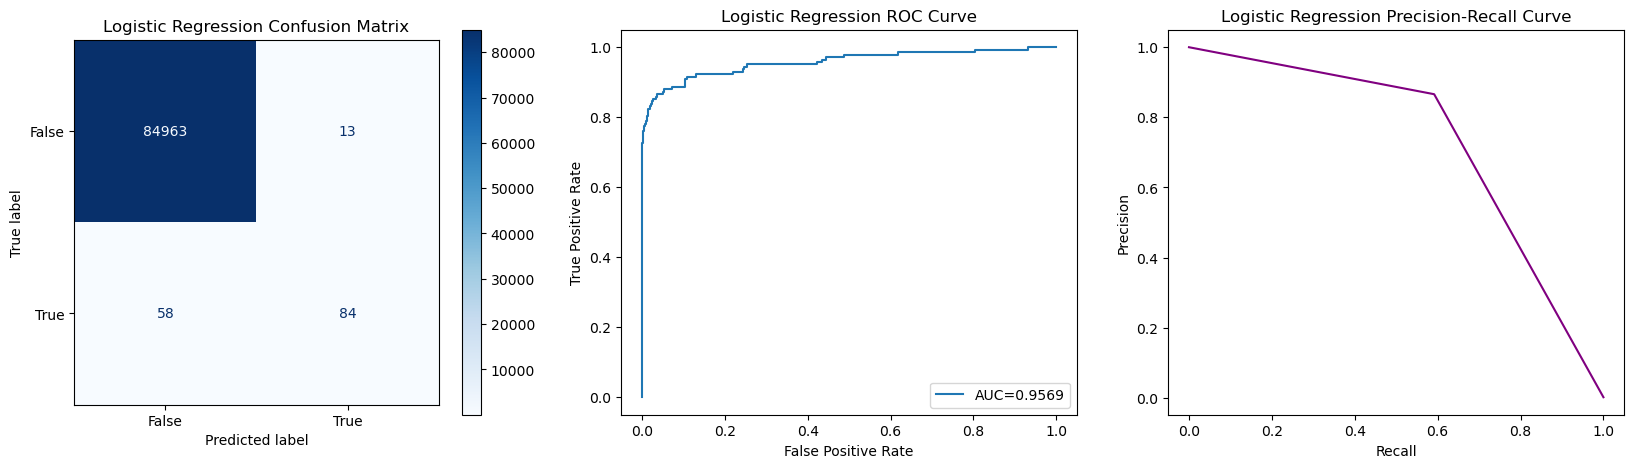

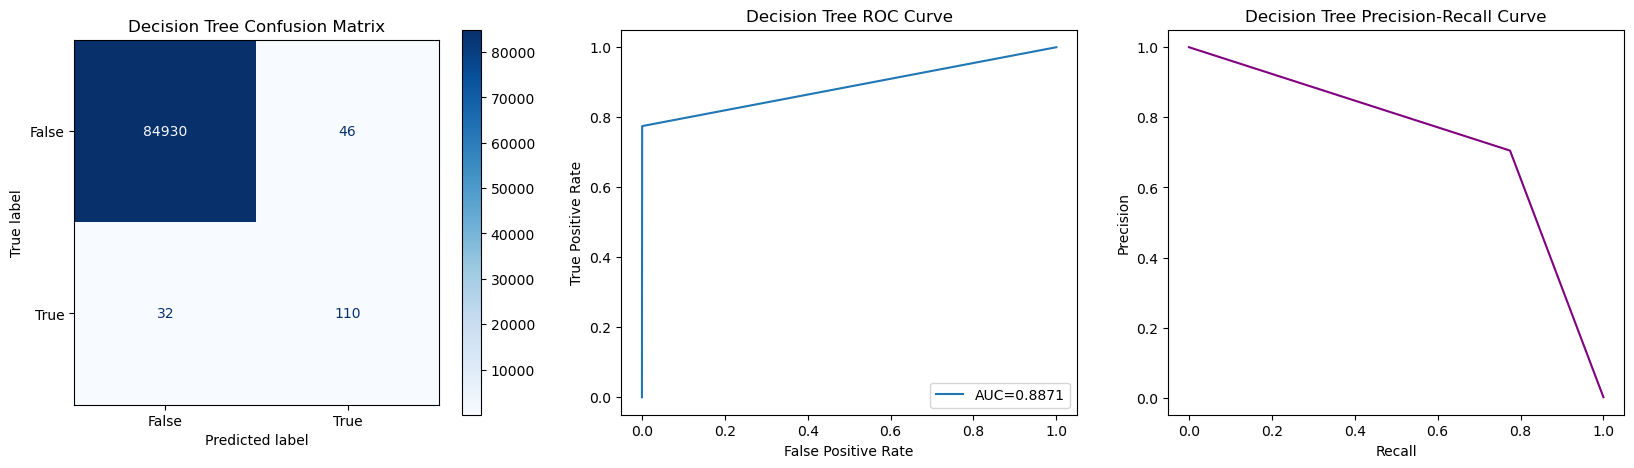

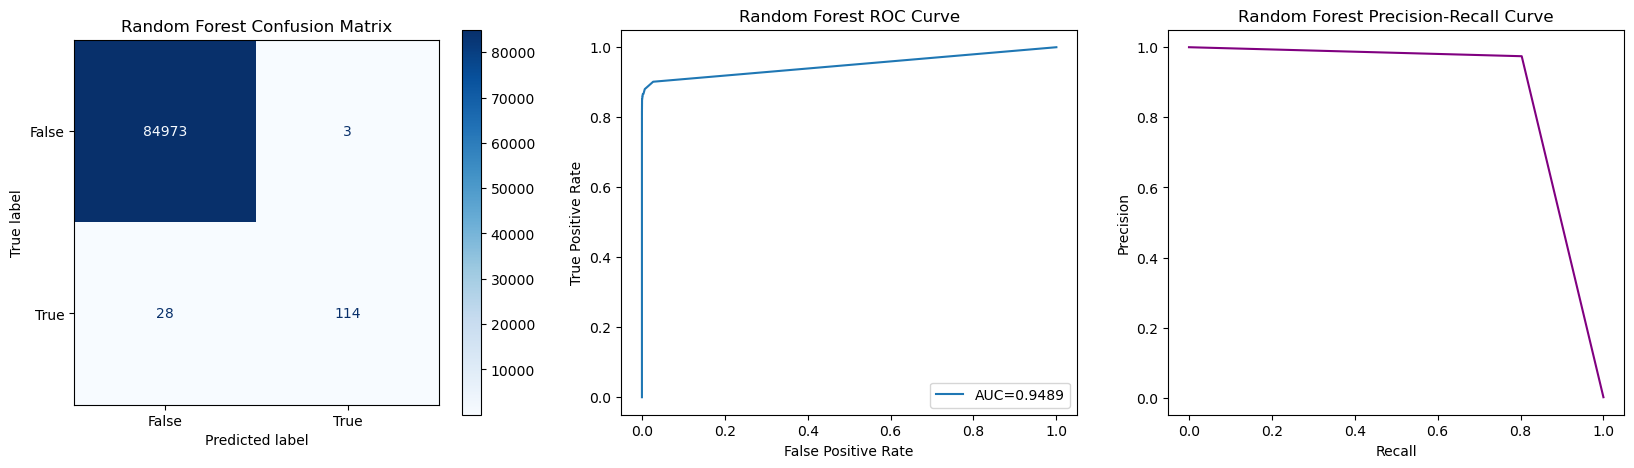

In [268]:
# Score after AllKNN undersampling
performance_board_us = learning_algorithms_spot_check(X_train_allknn, y_train_allknn, X_test, y_test, 
                                                  'AllKNN Under Sampled', performance_board_us)

display(performance_board_us.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 6.1.2.10 InstanceHardnessThreshold undersampling technique
- InstanceHardnessThreshold worked significantly well in Logistic Regression while it yielded slight increases in recall for other predictive models with a big drop in precision
- Decision Tree show ~5% increase in recall while >20% decrease in precision
- Logistis Regression shows >15% increase in recall while 3% decrease in precision
- Random Forest shows 3% increase in recall while >20% decrease in precision

In [938]:
#Random Undersampling with InstanceHardnessThreshold method

from imblearn.under_sampling import InstanceHardnessThreshold

iht = InstanceHardnessThreshold(n_jobs=-1, random_state=0)
X_train_iht, y_train_iht = iht.fit_resample(X_train, y_train)

#Sanity check on the distribution
print('Amount of fraud labels before InstanceHardnessThreshold undersampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before InstanceHardnessThreshold undersampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after InstanceHardnessThreshold undersampling: {}'.format(np.count_nonzero(y_train_iht==1)))
print('Amount of non-fraud labels after InstanceHardnessThreshold undersampling: {}'.format(np.count_nonzero(y_train_iht==0)))

Amount of fraud labels before InstanceHardnessThreshold undersampling: 331
Amount of non-fraud labels before InstanceHardnessThreshold undersampling: 198277


Amount of fraud labels after InstanceHardnessThreshold undersampling: 331
Amount of non-fraud labels after InstanceHardnessThreshold undersampling: 193097


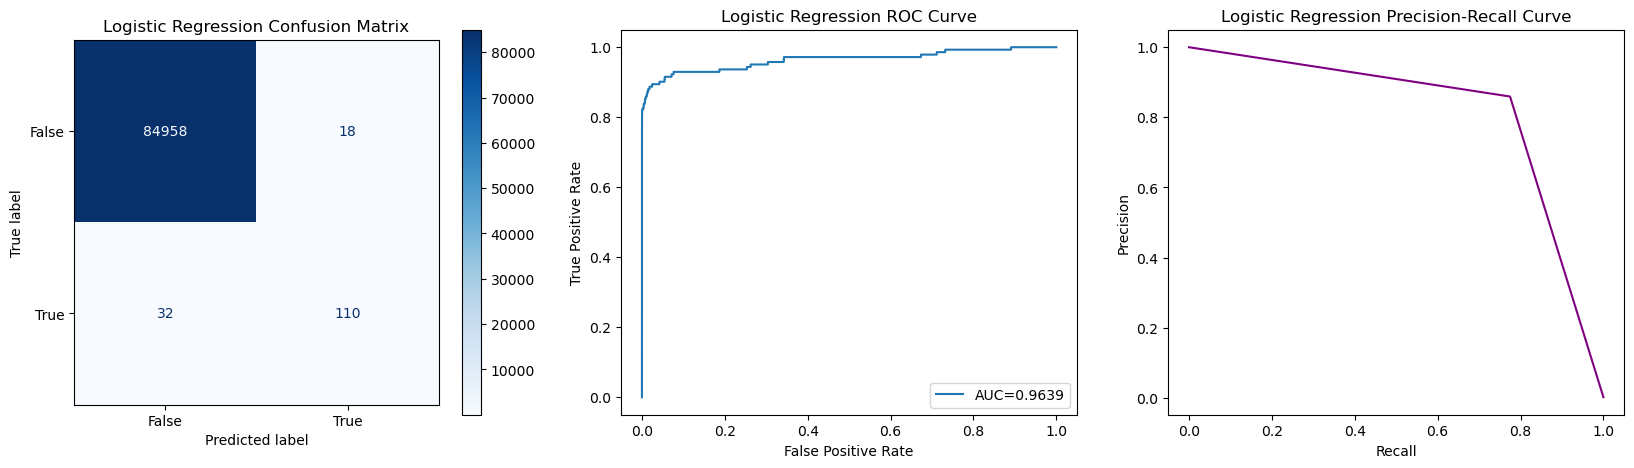

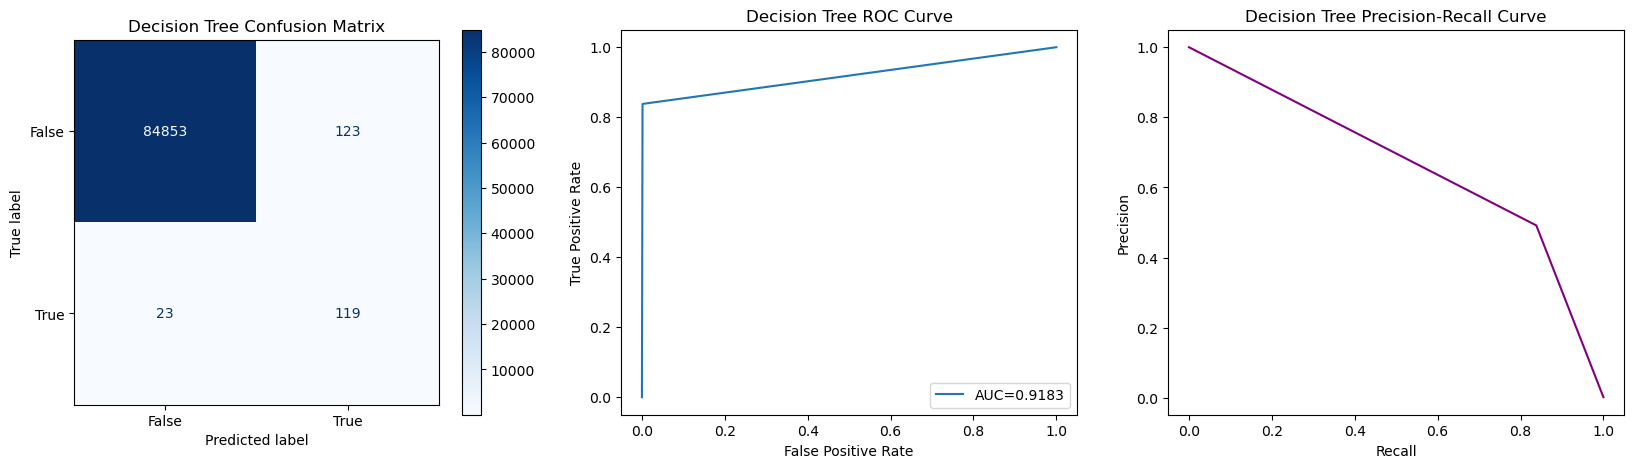

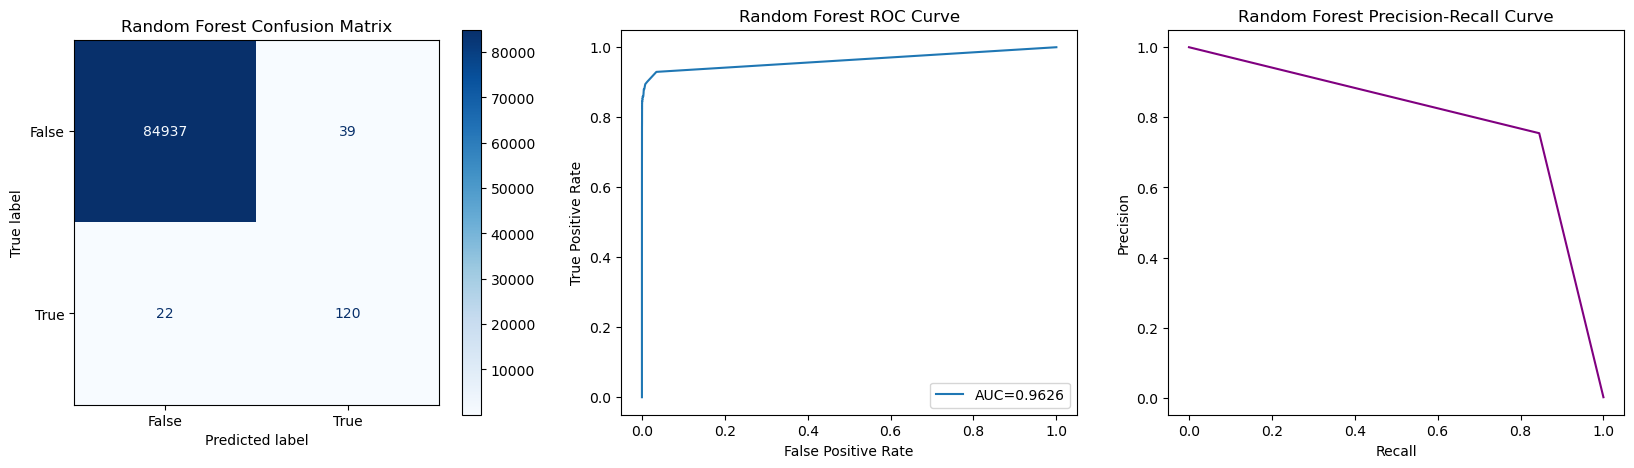

In [269]:
# Score after InstanceHardnessThreshold undersampling
performance_board_us = learning_algorithms_spot_check(X_train_iht, y_train_iht, X_test, y_test, 
                                                  'InstanceHardnessThreshold Under Sampled', performance_board_us)

display(performance_board_us.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 6.1.2.11 NeighbourhoodCleaningRule undersampling technique
- NeighbourhoodCleaningRule undersampling technique (similar to Tomeklinks, OneSidedSelection, EditedNearestNeighbours,  RepeatedEditedNearestNeighbours, AllKNN and InstanceHardnessThreshold) shows promising yet not improved results across all 3 models compared to previous undersampling method(s)
- Decision Tree model shows roughly 5% decrease in recall and ~2% decrease in precision
- Logistic Regression shows roughly 6% increase in recall and 9% decrease in precision 
- Random Forest shows shows roughly 2% decrease in recall while precision improved by 1%

In [194]:
#Random Undersampling with NeighbourhoodCleaningRule method

from imblearn.under_sampling import NeighbourhoodCleaningRule

ncr = NeighbourhoodCleaningRule(n_jobs=-1)
X_train_ncr, y_train_ncr = ncr.fit_resample(X_train, y_train)

#Sanity check on the distribution
print('Amount of fraud labels before NeighbourhoodCleaningRule undersampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before NeighbourhoodCleaningRule undersampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after NeighbourhoodCleaningRule undersampling: {}'.format(np.count_nonzero(y_train_ncr==1)))
print('Amount of non-fraud labels after NeighbourhoodCleaningRule undersampling: {}'.format(np.count_nonzero(y_train_ncr==0)))

Amount of fraud labels before NeighbourhoodCleaningRule undersampling: 331
Amount of non-fraud labels before NeighbourhoodCleaningRule undersampling: 198277


Amount of fraud labels after NeighbourhoodCleaningRule undersampling: 331
Amount of non-fraud labels after NeighbourhoodCleaningRule undersampling: 197354


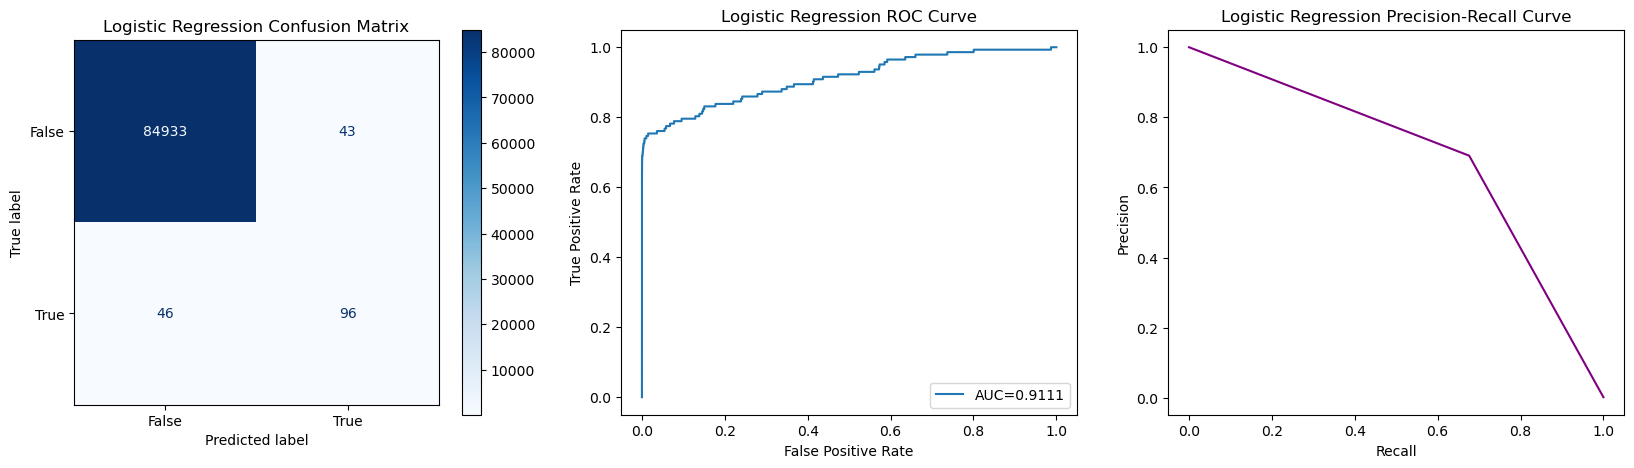

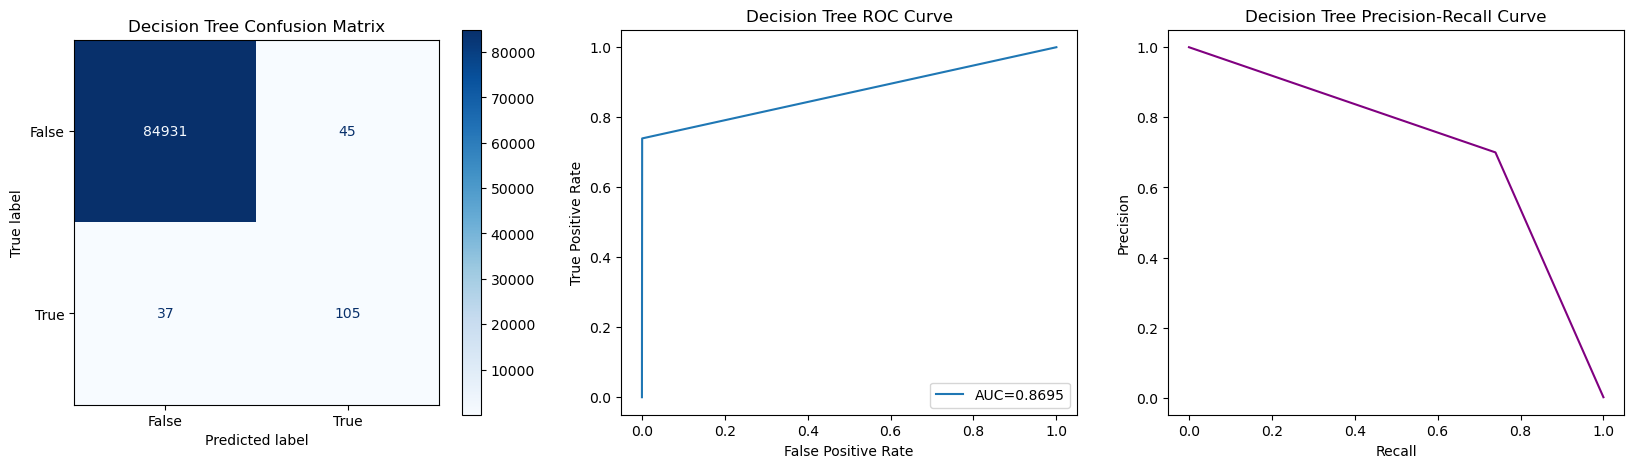

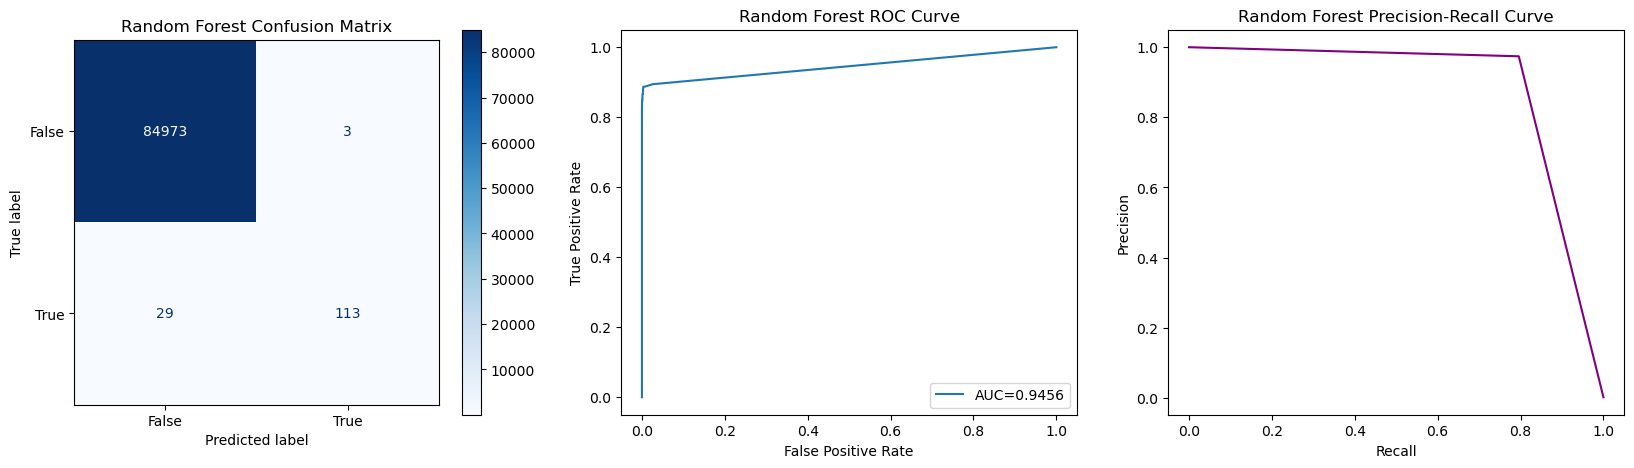

In [270]:
# Score after NeighbourhoodCleaningRule undersampling
performance_board_us = learning_algorithms_spot_check(X_train_ncr, y_train_ncr, X_test, y_test, 
                                                  'NeighbourhoodCleaningRule Under Sampled', performance_board_us)

display(performance_board_us.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

## 6.1.3 Applying Combination of Over and Under Sampling Methods <a id='6.1.3'></a>
- In this section combination of oversampling techniques will be used in conjunction with undersampling techniques

In [271]:
performance_board_us_os = performance_board

### 6.1.3.1 SmoteTomek sampling technique
- SmoteTomek sampling technique combines Smote oversampling and Tomeklinks undersampling methods
- Similar to Smote oversampling methods evaluated earlier, the methods increased recall drastically for almost all 3 predictive models with a cost of dramatic drop in precision 
- Random Forest showed the most resilience in both recall and precision metrics compared to its peer predictive models

In [198]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=0, n_jobs=-1)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

#Sanity check on the distribution
print('Amount of fraud labels before SMOTETomek sampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before SMOTETomek sampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after SMOTETomek sampling: {}'.format(np.count_nonzero(y_train_smt[y_train_smt==1])))
print('Amount of non-fraud labels after SMOTETomek sampling: {}'.format(np.count_nonzero(y_train_smt[y_train_smt==0])))

Amount of fraud labels before SMOTETomek sampling: 331
Amount of non-fraud labels before SMOTETomek sampling: 198277


Amount of fraud labels after SMOTETomek sampling: 197449
Amount of non-fraud labels after SMOTETomek sampling: 0


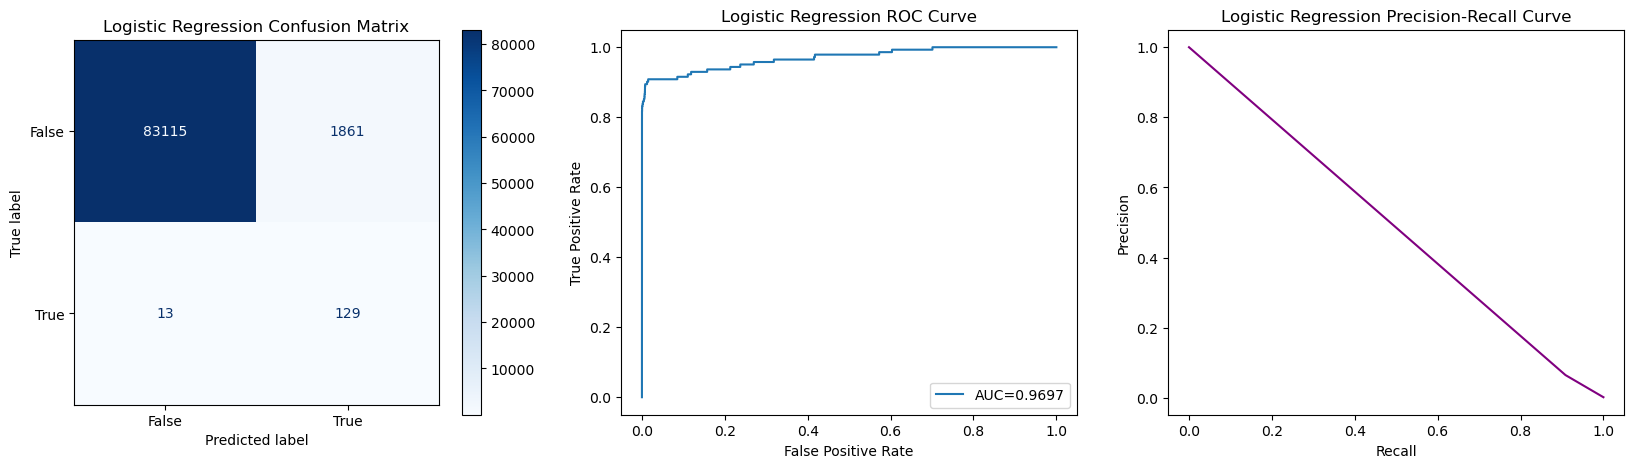

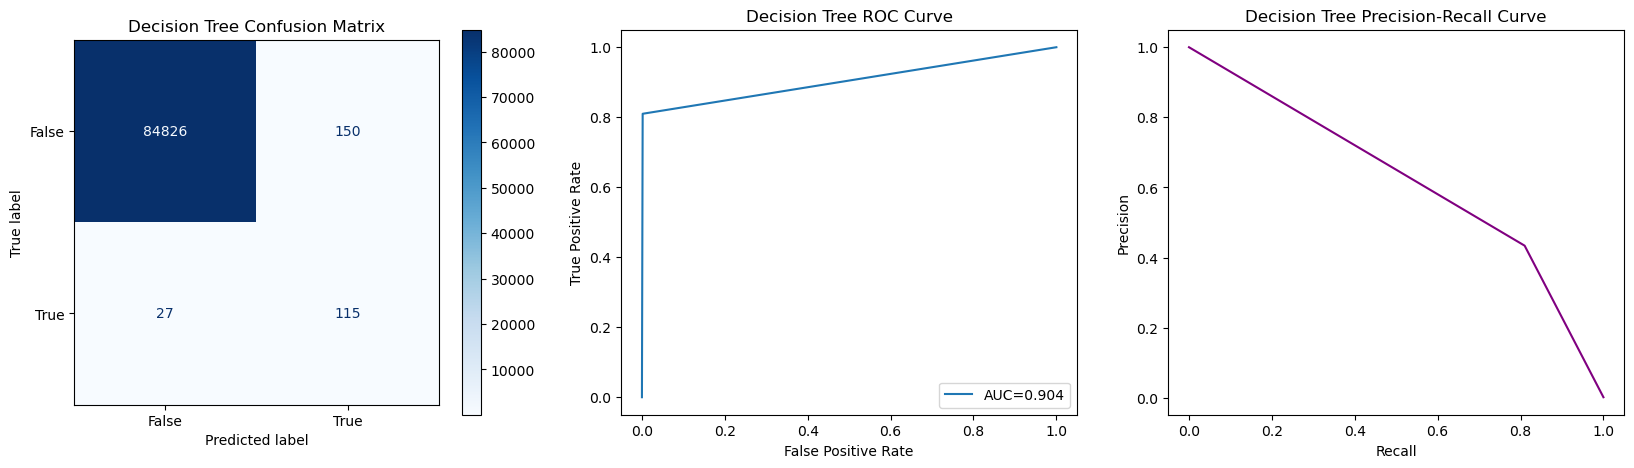

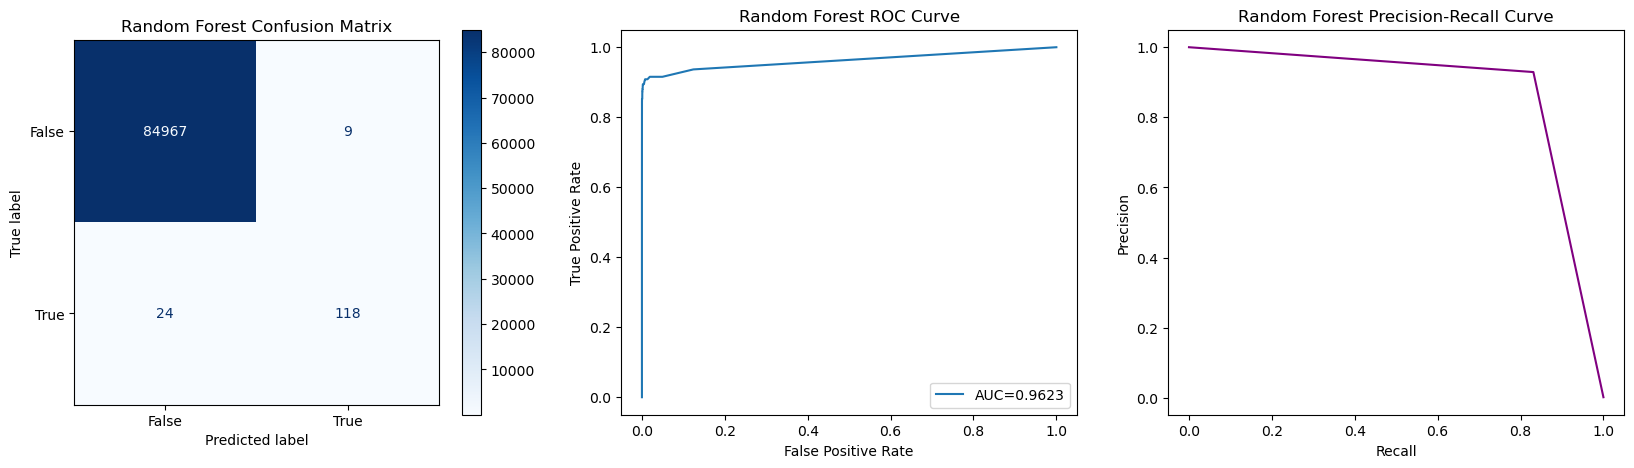

In [272]:
# Score after SmoteTomek Links Technique
performance_board_us_os = learning_algorithms_spot_check(X_train_smt, y_train_smt, X_test, y_test, 
                                                  'SmoteTomek Samplified ', performance_board_us_os)

display(performance_board_us_os.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 6.1.3.2 SmoteENN sampling technique
- SmoteENN sampling technique combines Smote oversampling and Edited Nearest Neighbor undersampling methods
- Similar to Smote oversampling methods evaluated earlier, the methods increased recall drastically for almost all 3 predictive models with a cost of dramatic drop in precision 
- Random Forest showed the most resilience in both recall and precision metrics compared to its peer predictive models

In [200]:
from imblearn.combine import SMOTEENN

smtn = SMOTEENN(random_state=0, n_jobs=8)
X_train_smtn, y_train_smtn = smtn.fit_resample(X_train, y_train)

#Sanity check on the distribution
print('Amount of fraud labels before SMOTETomek sampling: {}'.format(y_train[y_train==1].count()))
print('Amount of non-fraud labels before SMOTETomek sampling: {}'.format(y_train[y_train==0].count()))
print('\n')
print('Amount of fraud labels after SMOTETomek sampling: {}'.format(np.count_nonzero(y_train_smtn==1)))
print('Amount of non-fraud labels after SMOTETomek sampling: {}'.format(np.count_nonzero(y_train_smtn==0)))

Amount of fraud labels before SMOTETomek sampling: 331
Amount of non-fraud labels before SMOTETomek sampling: 198277


Amount of fraud labels after SMOTETomek sampling: 188334
Amount of non-fraud labels after SMOTETomek sampling: 178807


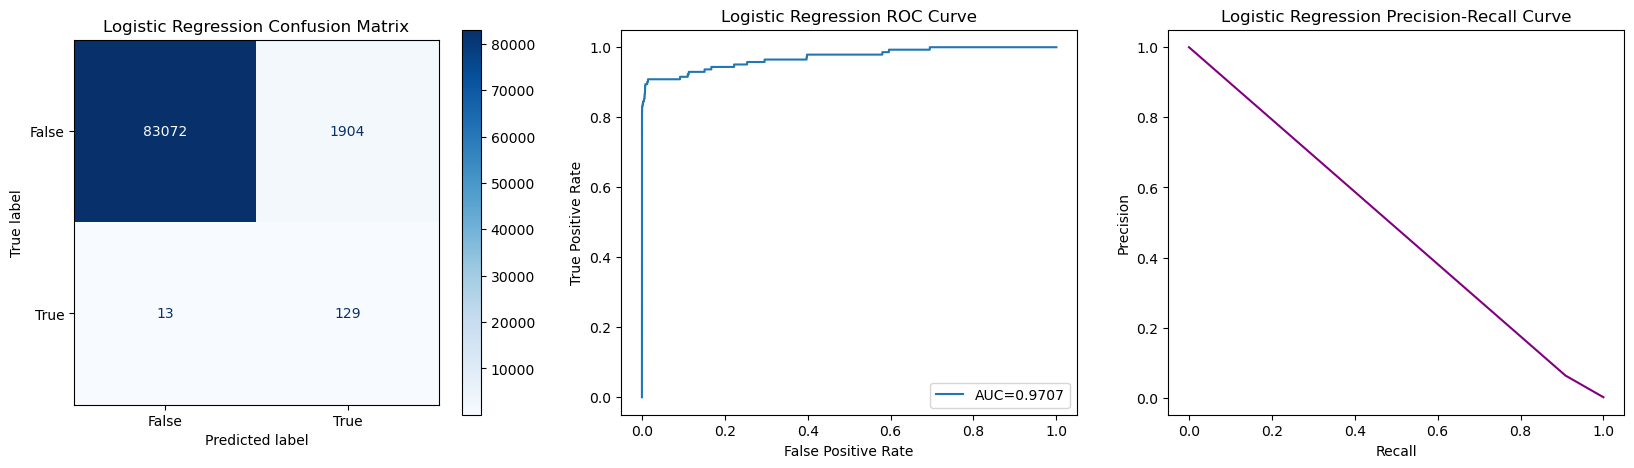

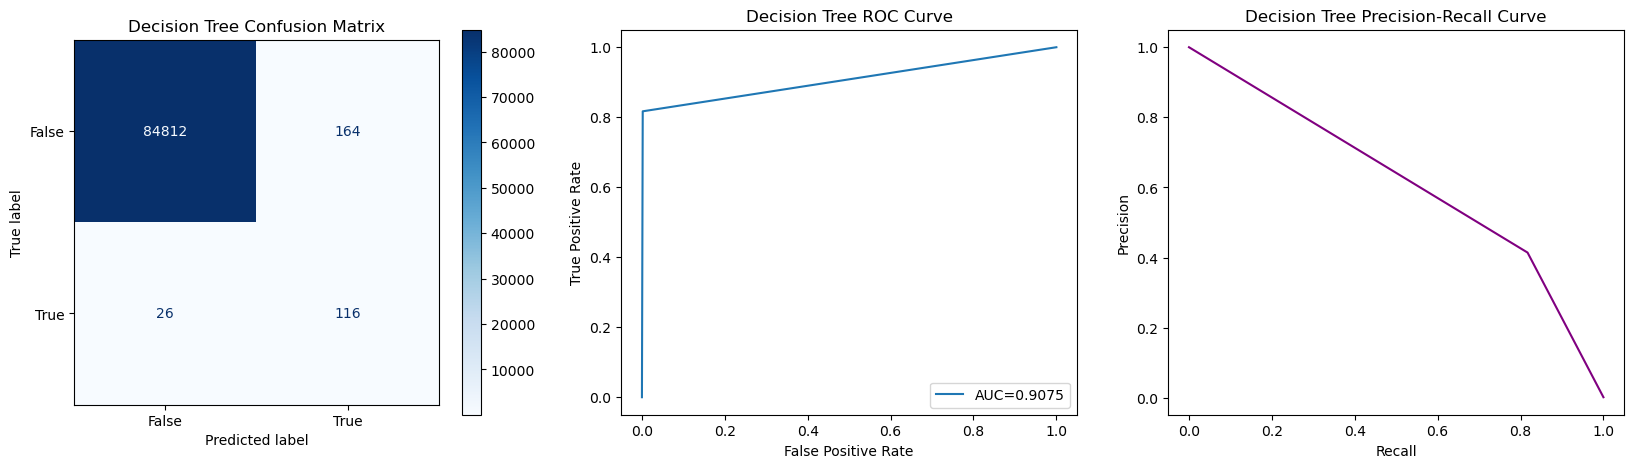

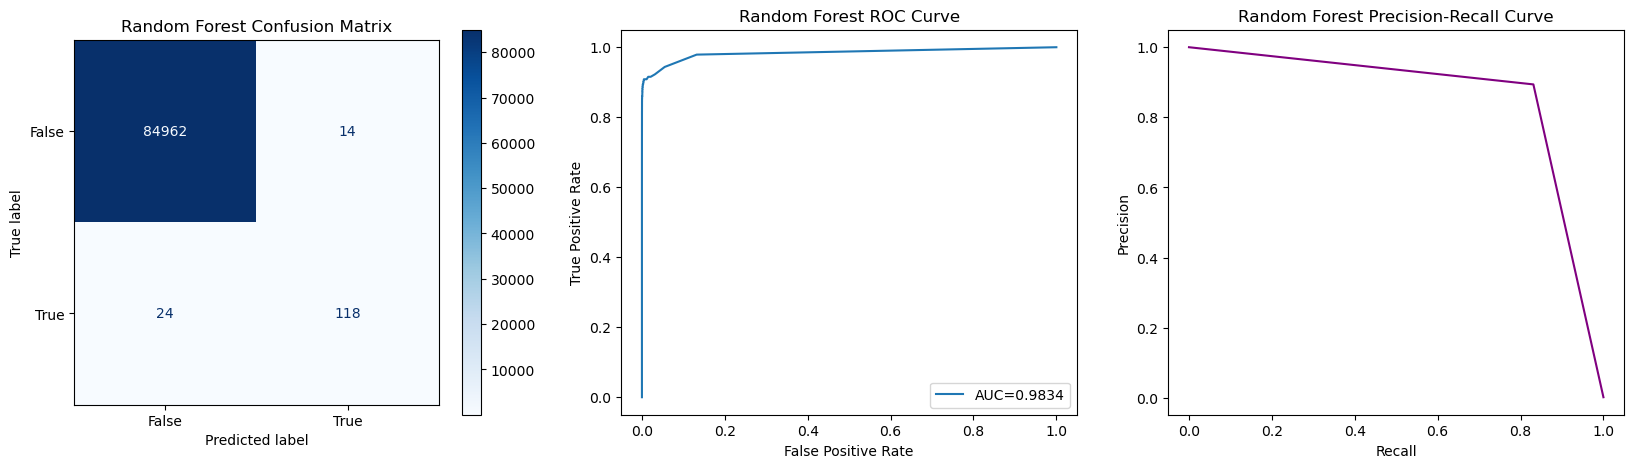

In [273]:
# Score after SmoteTeen Sampling Technique
performance_board_us_os = learning_algorithms_spot_check(X_train_smtn, y_train_smtn, X_test, y_test, 
                                                  'SMOTEENN Samplified ', performance_board_us_os)

display(performance_board_us_os.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

## 6.2 Cost sensitive learning <a id='6.2'></a>
- Considering fraud transactions comprised of only 0.17% of the entire dataset, the predictive models will inevitably tend to put more emphasize on flagging geniune transactions which will be in favor of precision but not recall metric
- Cost sensitive learning provides opportunity to tweak the predictive models so that they put equal or more emphasize on the minority class (fraud transactions) by adjusting the penalty to each misclassified fraud prediction
- In this section we will focus on class_weight parameter of each preditive model and evaluate prediction performance with respect to varying range of class weights
- Even tough some of the class_weights experimented eachived higher recall compared to baseline performance, in overall none of the weights considered were able to surpass the baseline performance

In [236]:
# Creating Custom Score Function to Evaluate ML Models from various metrices

def cs_learning_algorithms_spot_check(X_train, y_train, X_test, y_test, score_board, weight):
    
    models=[]
    models.append(("Logistic Regression",LogisticRegression(random_state = 0, max_iter=1000, class_weight=weight)))
    models.append(("Decision Tree",DecisionTreeClassifier(random_state = 0, class_weight=weight)))
    models.append(("Random Forest",RandomForestClassifier(random_state = 0, n_jobs=-1,class_weight=weight)))

    results=[]
    names= []

    for name, model in models:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        train_recall_score = recall_score(y_train, y_pred_train)
        test_recall_score = recall_score(y_test, y_pred_test)
        test_precision_score = precision_score(y_test, y_pred_test)
        test_f1_score = f1_score(y_test, y_pred_test, average='macro')
        y_pred_test_proba = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  y_pred_test_proba)
        test_auc_score = roc_auc_score(y_test, y_pred_test_proba)
        
        approach = 'CostSensitive '+str(weight)
        
        new_row = pd.DataFrame({'Model':name, 'Approach':approach, 'Recall':test_recall_score, 
                                'Precision':test_precision_score, 
                                'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
        score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
        
    return score_board

In [243]:
# calculate heuristic class weighting
from sklearn.utils.class_weight import compute_class_weight
from sklearn.datasets import make_classification

heuristic_weight = compute_class_weight('balanced', classes=np.unique (y), y=y)
heuristic_weight

array([  0.50083494, 299.9217759 ])

In [244]:
performance_board_cs = performance_board[performance_board['Approach']=='baseline']

custom_weights = ['balanced', {0:0.50083494,1:299.9217759}, {0:0,1:10}, {0:1,1:50}, {0:1,1:100}, {0:1,1:250}, {0:1,1:500}]

for custom_weight in custom_weights: 
    performance_board_cs = cs_learning_algorithms_spot_check(X_train, y_train, X_test, y_test,
                                                             performance_board_cs, custom_weight)

display(performance_board_cs.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

## 6.3 Applying Ensemble Methods in Conjunction with Over/Undersampling <a id='6.3'></a>
- Ensemle methods (part of imblearn library) containing boosting and bagging algorthms offers an alternate way to deal with imbalanced datasets by combining sampling with ensemble learning
- It generates under/over sampled subsets of training set, which later to be used by estimators within ensemble learning framework
- The most outstanding finding in this section is the improvement in both precision and recall metrics of Decision Tree model under Balanced Bagging Classifier Method with Kmeans Smote OverSampling method

### 6.3.1 Balanced Bagging Classifier Method with Kmeans Smote OverSampling
- Balanced bagging classifier offers flexible data sampling and ensemble learning hybrid strategy so that selected method of of sampler creates bootstrap samples of data which later gets fed into selected type of estimators (predictive models) in ensemble learning fashion
- In this section same set of prediction models used within bagging classifier with K-means over sampling technique
- Balanced bagging classifier with Decision Tree estimator yielded ~2% increase in recall and over 12% increse in precision
- Balanced bagging classifier with Logistic Regression estimator yielded almost 30% increase in recall while sacrificing precision by almost 10%
- Balanced bagging classifier with Logistic Regression estimator yielded ~1% decrease in both recall and precision metrics compared to baseline performance

In [21]:
# Creating Custom Score Function to Evaluate ML Models from various metrices
from imblearn.ensemble import BalancedBaggingClassifier

def os_ensemble_learning_algorithms_spot_check(X_train, y_train, X_test, y_test, score_board):
    
    models=[]
    models.append(("Logistic Regression",LogisticRegression(random_state = 0, max_iter=1000)))
    models.append(("Decision Tree",DecisionTreeClassifier(random_state = 0)))
    models.append(("Random Forest",RandomForestClassifier(random_state = 0, n_jobs=-1)))

    results=[]
    names= []

    for name, model in models:
        bbc = BalancedBaggingClassifier(random_state=0, n_jobs=-1, 
                               sampler=KMeansSMOTE(random_state=0, n_jobs=-1, cluster_balance_threshold=0.001), 
                                estimator = model)
        bbc.fit(X_train, y_train)
        y_pred_test = bbc.predict(X_test)
        test_recall_score = recall_score(y_test, y_pred_test)
        test_precision_score = precision_score(y_test, y_pred_test)
        test_f1_score = f1_score(y_test, y_pred_test, average='macro')
        y_pred_test_proba = bbc.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
        test_auc_score = roc_auc_score(y_test, y_pred_test_proba)
        
        approach = 'Balanced Bagging Classifier with KmeansSmote Oversampling ' + name
        
        new_row = pd.DataFrame({'Model':name, 'Approach':approach, 'Recall':test_recall_score, 
                                'Precision':test_precision_score, 
                                'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
        score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
        
    return score_board

In [22]:
performance_board_ensemble = os_ensemble_learning_algorithms_spot_check(X_train, y_train, X_test, y_test, performance_board)

display(performance_board_ensemble.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 6.3.2 Easy Ensemble Classifier Method
- Easy ensemble classifier is using an ensemble of adaboost learners trained on sampled (balanced) bootstraps samples 
- Easy ensemble classifier yielded over 90% recall score with very poor precision (<1%)

In [47]:
# Creating Custom Score Function to Evaluate ML Models from various metrices
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier(random_state=0, n_jobs=-1, sampling_strategy='auto')
eec.fit(X_train, y_train)
y_pred_test = eec.predict(X_test)
test_recall_score = recall_score(y_test, y_pred_test)
test_precision_score = precision_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average='macro')
y_pred_test_proba = eec.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

new_row = pd.DataFrame({'Model':'AdaBoost', 'Approach':'Easy Ensemble Classifier', 'Recall':test_recall_score, 
                        'Precision':test_precision_score, 
                        'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])

performance_board_ensemble = pd.concat([performance_board_ensemble, new_row]).reset_index(drop=True)
display(performance_board_ensemble.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 6.3.3 RUSBoost Classifier Method
- RUSBoost classifier method integrates randum undersampling technique with Adaboost learning algorithm.
- RUSBoost classifier yielded a very similar results as in Easy ensemble classifier with high recall and very low precision score

In [48]:
# Creating Custom Score Function to Evaluate ML Models from various metrices
from imblearn.ensemble import RUSBoostClassifier

rus_boost = RUSBoostClassifier(random_state=0, sampling_strategy=0.1)
rus_boost.fit(X_train, y_train)
y_pred_test = rus_boost.predict(X_test)
test_recall_score = recall_score(y_test, y_pred_test)
test_precision_score = precision_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average='macro')
y_pred_test_proba = rus_boost.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

new_row = pd.DataFrame({'Model':'AdaBoost', 'Approach':'RUS Boost Classifier', 'Recall':test_recall_score, 
                        'Precision':test_precision_score, 
                        'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])

performance_board_ensemble = pd.concat([performance_board_ensemble, new_row]).reset_index(drop=True)

display(performance_board_ensemble.sort_index().sort_values(by=['Model']).style.hide(axis='index'))


### 6.3.4 Balanced Random Forest Classifier Method
- Balanced Random Forest Classifier Method utilizes Random Forest with selected sampling technique
- Balanced Random Forest clssifier yielded the highest recall among other Random Forest models experimented (including the baseline) however, with a deficit of 30% in precision

In [50]:
# Creating Custom Score Function to Evaluate ML Models from various metrices
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(random_state=0, sampling_strategy=0.1, n_jobs=-1)
brf.fit(X_train, y_train)
y_pred_test = brf.predict(X_test)
test_recall_score = recall_score(y_test, y_pred_test)
test_precision_score = precision_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average='macro')
y_pred_test_proba = brf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

new_row = pd.DataFrame({'Model':'Random Forest', 'Approach':'Balanced Random Forest Classifier', 'Recall':test_recall_score, 
                        'Precision':test_precision_score, 
                        'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])

performance_board_ensemble = pd.concat([performance_board_ensemble, new_row]).reset_index(drop=True)
display(performance_board_ensemble.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

In [37]:
# Custom function to compute cross validation baseline scores of models

def ensemble_compute_cv_scores(X,y):
    
    score_board = pd.DataFrame(columns=['Model', 'Recall','Precision', 'F1', 'AUC'])

    models=[]
    models.append(("Logistic Regression",LogisticRegression(random_state = 0, max_iter=1000)))
    models.append(("Decision Tree",DecisionTreeClassifier(random_state = 0)))
    models.append(("Random Forest",RandomForestClassifier(random_state = 0, n_jobs=-1)))

    scoring = {'acc': 'accuracy', 'prec': 'precision', 'recall': 'recall', 'auc': 'roc_auc', 'f1': 'f1'}
    stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

    for name, model in models:
        bbc = BalancedBaggingClassifier(random_state=0, n_jobs=-1, 
                       sampler=KMeansSMOTE(random_state=0, n_jobs=-1, cluster_balance_threshold=0.001), 
                        estimator = model)
        cv_grid = cross_validate(bbc, X, y, cv=stratified_kfold, scoring=scoring, n_jobs=-1)
        cv_recall = str(round(cv_grid['test_recall'].mean()*100,2)) +'% (+/-' + str(round(cv_grid['test_recall'].std()*100,2)) +'%)'
        cv_precision = str(round(cv_grid['test_prec'].mean()*100,2)) +'% (+/-' + str(round(cv_grid['test_prec'].std()*100,2)) +'%)'
        cv_f1 = str(round(cv_grid['test_f1'].mean()*100,2)) +'% (+/-' + str(round(cv_grid['test_f1'].std()*100,2)) +'%)'
        cv_auc = str(round(cv_grid['test_auc'].mean()*100,2)) +'% (+/-' + str(round(cv_grid['test_auc'].std()*100,2)) +'%)'

        new_row = pd.DataFrame({'Model':name, 'Recall':cv_recall, 'Precision':cv_precision, 'F1':cv_f1, 'AUC':cv_auc}, index=[0])
        score_board = pd.concat([new_row, score_board.loc[:]]).reset_index(drop=True)

    score_board = score_board.sort_index(ascending=False)
    score_board = score_board.style.set_properties(**{'text-align': 'left'})
    score_board = score_board.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])

    return display(score_board)

In [38]:
# Baseline model performance after removing duplicates
ensemble_compute_cv_scores(X,y)

/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 7. Feature Selection  <a id='7'></a>

7.1 Filter Based Methods:  
- Feature Variance Analysis
- Feature Correleation analysis w.r.t target class
- Anova Test
- Inter-Feature Correlation analysis

7.2 Embedded Methods
- Feature Importance of selected mode

7.3 Wrapper Methods 
- Recersive Feature Elimination. (RFE)

### 7.1 Filter Based Feature Selection Methods <a id='7.1'></a>

#### 7.1.1. Feature Variance Analysis
- In this section variance threshold method is utilized to identify any zero-variance features such that they contain the same value in all samples
- Analysis below shows that there are no feature with zero-variance

In [211]:
from sklearn.feature_selection import VarianceThreshold

variance_t = VarianceThreshold(threshold=0)
variance_t.fit(X)
variance_t.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

#### 7.1.2 Feature Correleation Analysis w.r.t Target Class: Correleation Matrix
- Previously plotted heatmap on the correlation matrix showed that;
    - Time and Amount features shows noticable correlation with anonymized features (V1-V28)
    - Amount feature shows very high correlation with features: V2, V7 and V20
    - Time feature shows correlation with V3 and V5
    - Top influential predictors to target class are V4, V11, V12, V14 and V17 

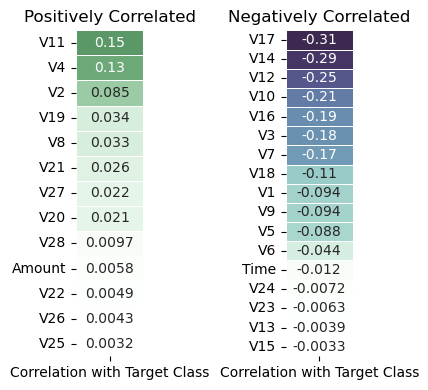

In [344]:
corr = df2.corrwith(df2['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation with Target Class']
corr.drop(index='Class', inplace=True)
corr_pos = corr.iloc[:13,:].sort_values(by=['Correlation with Target Class'], ascending=False)
corr_neg = corr.iloc[13:30].sort_values(by=['Correlation with Target Class'], ascending=True)

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (4,4))

plt.subplot(1,2,1)
sns.heatmap(corr_pos,annot = True,linewidths = 0.4,cmap= sns.cubehelix_palette(start=2, rot=0, dark=0.5, light=1, reverse=False, as_cmap=True), cbar = False)
plt.title("Positively Correlated")

plt.subplot(1,2,2)
sns.heatmap(corr_neg,annot = True,linewidths = 0.4,cmap= sns.cubehelix_palette(start=.5, rot=-.5, dark=0.2, light=1, reverse=True, as_cmap=True), cbar = False)
plt.title("Negatively Correlated")

fig.tight_layout(w_pad = 5)
plt.show()

#### 7.1.3 Feature Correleation Analysis w.r.t Target Class: ANOVA Test
Performed Anova test method results the same conclusion with correlation analysis above hence validates the correlation analysis findings on the importance ranking of features in the dataset

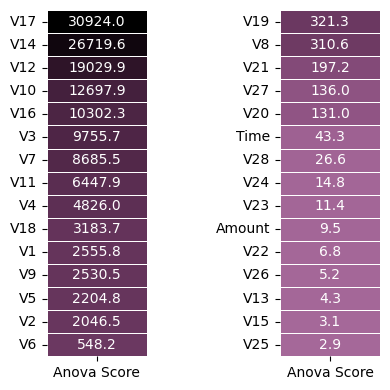

In [345]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

anova_test = SelectKBest(score_func=f_classif, k='all')
anova_test.fit(df2.drop(['Class'],axis=1), df2['Class'])

anova_scores = pd.DataFrame(data=anova_test.scores_,index=list(X.columns), columns=['Anova Score']).sort_values(by=['Anova Score'], ascending=False)

fig,ax = plt.subplots(nrows = 2,ncols = 1,figsize = (4,4))

plt.subplot(1,2,1)
sns.heatmap(anova_scores.iloc[:15,:],annot = True,linewidths = 0.4, cmap= sns.cubehelix_palette(start=0.5, rot=0, dark=0, light=0.3, reverse=False, as_cmap=True), cbar = False, fmt=".1f")

plt.subplot(1,2,2)
sns.heatmap(anova_scores.iloc[15:30],annot = True,linewidths = 0.4,cmap= sns.cubehelix_palette(start=0.5, rot=0, dark=0.5, light=0.3, reverse=True, as_cmap=True), cbar = False, fmt=".1f")

fig.tight_layout(w_pad = 5)
plt.show()

#### 7.1.4 Inter-Feature Correlation analysis
- In this section correlation within features are evaluated by using Variance Inflation Factor (VIF) method
- VIF method shows that Amount feature is indeeed highly corralated, hence can be easily predicted by using already existing features (especially V2, V5, V7 and V20)

In [190]:
#Creating custom VIF function
# Previously analyzed correleation matrix showed some signals that there may be correlated features may exist
# Lets utilize VIF - Variance Inflation Factor to quantify the correlation between the features

from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF_computation(dataset): 
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_Score'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    return vif.sort_values(by='VIF_Score', ascending=False)


In [231]:
# VIF computation on the original dataset
# Amount feature shows very high VIF score hence collinearity
VIF_computation(df.iloc[:,:-1]).style.hide(axis='index')


In [197]:
# Features V2, V7, V5, V20 shows some correlation to Amount feature
df_corr_per_Amount = df2.corr()['Amount'].to_frame()
df_corr_per_Amount['Abs_Corr_to_Amount'] = abs(df_corr_per_Amount)
df_corr_per_Amount = df_corr_per_Amount.drop(index=('Amount')).sort_values(by='Abs_Corr_to_Amount', ascending=False)

df_corr_per_Amount

Amount  Abs_Corr_to_Amount
V2    -0.533428            0.533428
V7     0.400408            0.400408
V5    -0.387685            0.387685
V20    0.340729            0.340729
V1    -0.230105            0.230105
V6     0.216389            0.216389
V3    -0.212410            0.212410
V23   -0.112833            0.112833
V21    0.108058            0.108058
V8    -0.104662            0.104662
V10   -0.102255            0.102255
V4     0.099514            0.099514
V22   -0.064965            0.064965
V19   -0.055994            0.055994
V25   -0.047596            0.047596
V9    -0.044123            0.044123
V18    0.035775            0.035775
V14    0.034122            0.034122
V27    0.027922            0.027922
Time  -0.010559            0.010559
V28    0.010143            0.010143
V12   -0.009254            0.009254
V17    0.007730            0.007730
Class  0.005777            0.005777
V13    0.005209            0.005209
V24    0.005055            0.005055
V16   -0.004488            0.004488
V26   -0.003425            0.003425
V15   -0.003265            0.003265
V11   -0.000015            0.000015

In [233]:
#Removing Amount feature brought the rest of VIF scores around 1 across all features
df_amount_removed = df.drop('Amount', axis=1)
VIF_computation(df_amount_removed.iloc[:,:-1])

Features  VIF_Score
0      Time   1.103579
3        V3   1.038970
11      V11   1.013578
25      V25   1.012024
15      V15   1.007449
5        V5   1.006629
22      V22   1.004593
12      V12   1.003422
1        V1   1.003050
4        V4   1.002452
14      V14   1.002159
18      V18   1.001810
7        V7   1.001588
17      V17   1.001189
13      V13   1.000961
6        V6   1.000879
23      V23   1.000579
20      V20   1.000573
21      V21   1.000443
26      V26   1.000379
8        V8   1.000302
10      V10   1.000207
19      V19   1.000186
24      V24   1.000058
16      V16   1.000031
2        V2   1.000025
28      V28   1.000020
9        V9   1.000017
27      V27   1.000006

### 7.2  Embedded Feature Selection Methods <a id='7.2'></a>
- In this section intrinsic feature selection method of each predictive model is utilized
- Even though the top 3 influencer feature (V12, V14, V17) across all 3 models is pretty much the same, the rest of the features and their improtance ranking showed some differences

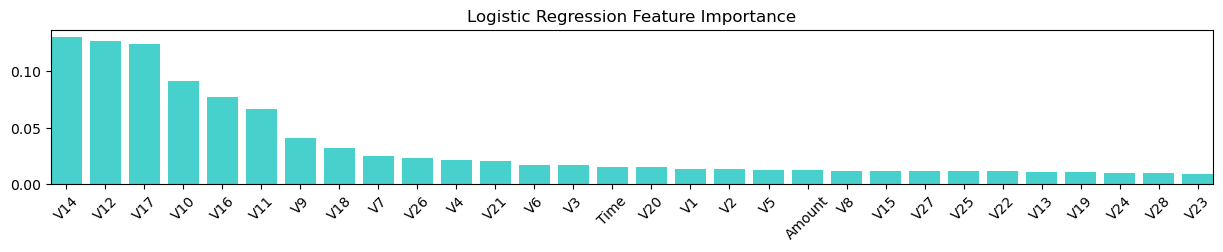

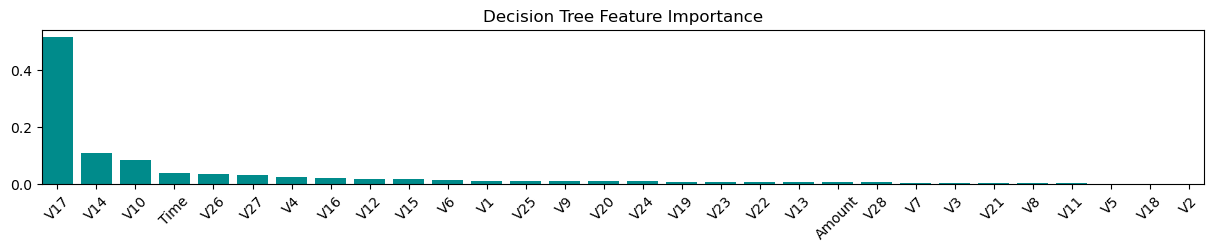

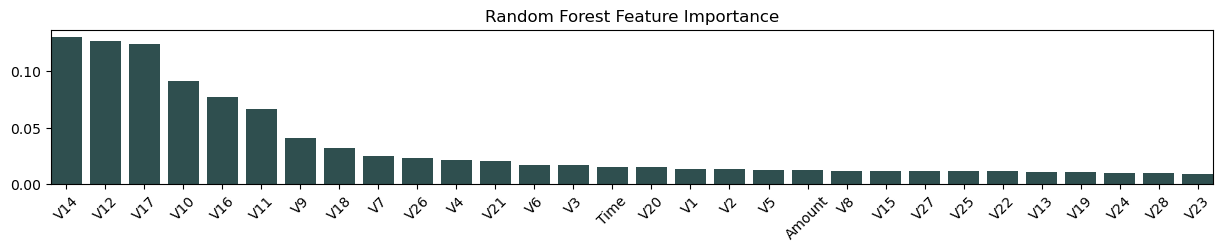

In [494]:
#Logistic Regression 
LR = LogisticRegression(random_state = 0, max_iter=1000)
LR.fit(X_train, y_train)
LR_feature_importance = LR.coef_[0]
LR_features = pd.DataFrame(list(zip(X.columns, abs(LR_feature_importance))),
                                        columns =['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

#Decision Tree
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train, y_train)
DT_feature_importance = DT.feature_importances_
DT_features = pd.DataFrame(list(zip(X.columns, abs(DT_feature_importance))),
                                        columns =['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

#Random Forest
RF = RandomForestClassifier(random_state = 0, n_jobs=-1)
RF.fit(X_train, y_train)
RF_feature_importance = RF.feature_importances_
RF_features = pd.DataFrame(list(zip(X.columns, abs(RF_feature_importance))),
                                        columns =['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

models = [RF_features, DT_features, RF_features]
colors= ['mediumturquoise', 'darkcyan', 'darkslategray']
model_names= ['Logistic Regression',  'Decision Tree', 'Random Forest']

for x in range(0,3): 
    fig1 = plt.figure(figsize =(15, 2))
    plt.bar(models[x]['Feature'], models[x]['Importance'],color=colors[x])
    plt.margins(x=0)
    plt.xticks(rotation = 45)
    plt.title(model_names[x] +' Feature Importance')
    plt.show()

### 7.3 Wrapper Feature Selection  Method: Recersive Feature Elimination <a id='7.3'></a>
- In this section recersive feature elimination (RFE) method is used for each of the predictive model and the method chose the most important list of features for each of the 3 predictive models 
- The advantage of RFECV method (RFE combined with cross validation - used only on the training set) is that it tries every single combination of features for each model and by computing the information gain in each iteration determines a list of features that yields the most information gain for each evaluated model
- The list of features for each model is in fact inline with previous feature selection methods applied
- The list of features for each model is as below:
 - Random Forest: 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V26'
 - Logistic Regression: 'V4','V5','V8','V9','V10','V12','V13','V14','V15','V16','V20','V21','V22','V23','V24','V26','V27','V28'
 - Decision Tree: 'Time','V1','V4','V6','V7','V10','V12','V13','V14','V15','V16','V17','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'

#### 7.3.1 Random Forest Recersive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFECV

stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

rfecv = RFECV(estimator=RandomForestClassifier(random_state = 0, n_jobs=-1),
              step=1, cv=stratified_kfold, scoring='recall', n_jobs=-1)

rfecv_rf_train = rfecv.fit(X_train, y_train)
rfecv_rf_train_feature_list = list(compress(X.columns, rfecv_rf_train.support_))

In [812]:
# Defining new X with the features selected for Random Forest
X2 = X[rfecv_rf_train_feature_list]
X_train2 = X_train[rfecv_rf_train_feature_list]
X_test2 = X_test[rfecv_rf_train_feature_list]

rfecv_rf_train_feature_list

['V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V26']

#### 7.3.2 Decision Tree Recersive Feature Elimination

In [730]:
from sklearn.feature_selection import RFECV

stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

dtcv = RFECV(estimator=DecisionTreeClassifier(random_state=0),
              step=1, cv=stratified_kfold, scoring='recall', n_jobs=-1)

dtcv_dt_train = dtcv.fit(X_train, y_train)
dtcv_dt_train_feature_list = list(compress(X.columns, dtcv_dt_train.support_))


In [813]:
# Defining new X with the features selected for Decision Tree
X3 = X[dtcv_dt_train_feature_list]
X_train3 = X_train[dtcv_dt_train_feature_list]
X_test3 = X_test[dtcv_dt_train_feature_list]

dtcv_dt_train_feature_list


['Time',
 'V1',
 'V4',
 'V6',
 'V7',
 'V10',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

#### 7.3.3 Logistic Regression Recersive Feature Elimination

In [734]:
from sklearn.feature_selection import RFECV

stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

lrcv = RFECV(estimator=LogisticRegression(random_state = 0, max_iter=1000),
              step=1, cv=stratified_kfold, scoring='recall', n_jobs=-1)

lrcv_lr_train = lrcv.fit(X_train, y_train)
lrcv_lr_train_feature_list = list(compress(X.columns, lrcv_lr_train.support_))

In [814]:
# Defining new X with the features selected for Decision Tree
X4 = X[lrcv_lr_train_feature_list]
X_train4 = X_train[lrcv_lr_train_feature_list]
X_test4 = X_test[lrcv_lr_train_feature_list]

lrcv_lr_train_feature_list

['V4',
 'V5',
 'V8',
 'V9',
 'V10',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V26',
 'V27',
 'V28']

In [558]:
# Defining new X with only 10 features selected
X2 = X[rfecv_rf_train_feature_list]

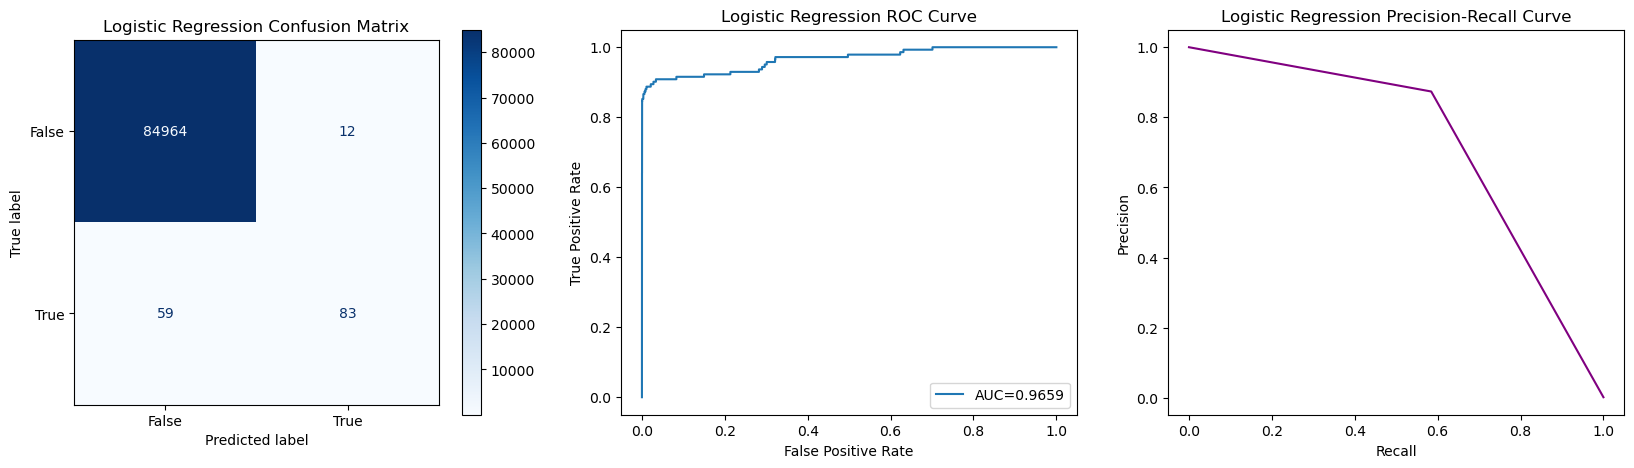

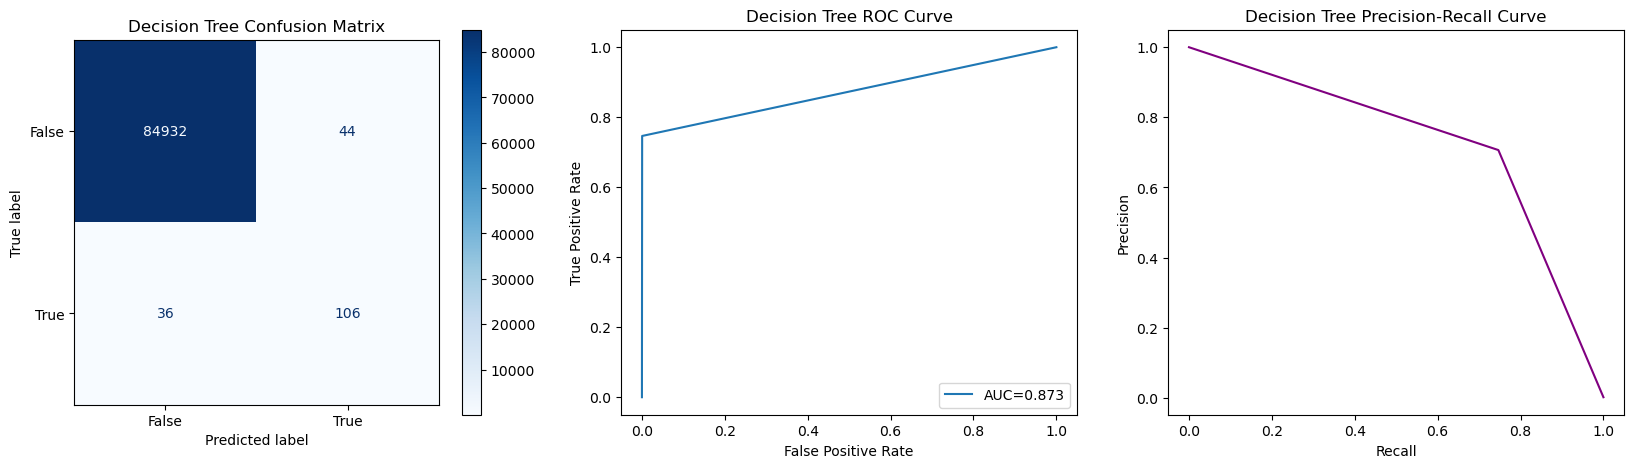

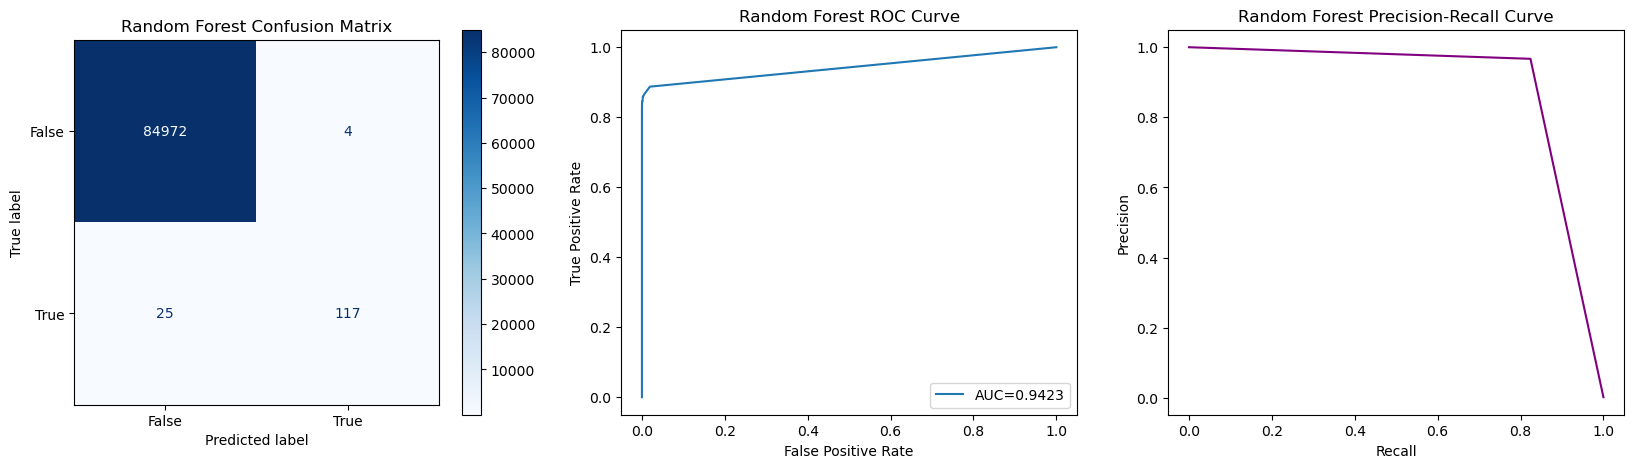

In [497]:
X_train2 = X_train[rfecv_rf_train_feature_list]
X_test2 = X_test[rfecv_rf_train_feature_list]

performance_board20 = learning_algorithms_spot_check(X_train2, y_train, X_test2, y_test, 'RFECV RF Train Optimized', performance_board)
display(performance_board20.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

## 8. Hyperparameter Tunning <a id='8'></a>
#### Context:
- So far we have used the default parameters of each of the 3 predictive models to predict fraud creditcard transactions
- In this section, we will dig deeper in each predictive model, fine tune their parameters to achieve the best predictive performance
- Hyperparameter tuning was performed manually first to narrow down the list of hyperparameters to experiment
- Later GridSearchCV hyperparameter technique was used to find the best combination of parametes for each model that yields the best prediction performance

#### Findings: 
- After hyperparameter tuning there are further improvements recorded on the predictive performance of models
- Random Forest had 1% further increase in precision while 3% increase in AUC
- Decision Tree had further 0.7% increase in recall, 20% boost on precision and 1% increase in AUC
- Logistic Rgression had further 2% increase in recall and 1% increase in AUC

### 8.1 Random Forest Hyperparameter Tuning  <a id='8.1'></a>

In [500]:
# Default paramters of the RF model
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [536]:
performance_board_rf = performance_board20.loc[[5]]
performance_board_rf['Approach']='baseline'

In [927]:
performance_board20

Model                  Approach    Recall  Precision  \
0  Logistic Regression                  baseline  0.584507   0.846939   
1        Decision Tree                  baseline  0.781690   0.720779   
2        Random Forest                  baseline  0.816901   0.966667   
3  Logistic Regression  RFECV RF Train Optimized  0.584507   0.873684   
4        Decision Tree  RFECV RF Train Optimized  0.746479   0.706667   
5        Random Forest  RFECV RF Train Optimized  0.823944   0.966942   

   F1 (Macro)       AUC  
0    0.845616  0.953559  
1    0.874782  0.890592  
2    0.942660  0.956041  
3    0.850002  0.965895  
4    0.862778  0.872981  
5    0.944782  0.942252

#### 8.1.1 Manual Hyperparameter Tuning

In [538]:
# Tuning of criterion parameter

performance_board_rf['Approach']='baseline (criterion=gini)'

RF = RandomForestClassifier(random_state = 0, n_jobs=-1, criterion='entropy')
RF.fit(X_train2, y_train)
y_pred_test = RF.predict(X_test2)
test_recall_score = recall_score(y_test, y_pred_test)
test_precision_score = precision_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average='macro')
y_pred_test_proba = RF.predict_proba(X_test2)[::,1]
test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

new_row = pd.DataFrame({'Model':'Random  Forest', 'Approach':'criterion=entropy', 'Recall':test_recall_score, 
                        'Precision':test_precision_score, 
                        'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
score_board = pd.concat([performance_board_rf, new_row]).reset_index(drop=True)
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

In [543]:
# Tuning of max_features parameter

performance_board_rf['Approach']='baseline (max_features=auto)'
score_board = performance_board_rf

max_feature_list = ['sqrt', 'log2', None]

for maxfeature in max_feature_list:
    RF = RandomForestClassifier(random_state = 0, n_jobs=-1, max_features=maxfeature)
    RF.fit(X_train2, y_train)
    y_pred_test = RF.predict(X_test2)
    test_recall_score = recall_score(y_test, y_pred_test)
    test_precision_score = precision_score(y_test, y_pred_test)
    test_f1_score = f1_score(y_test, y_pred_test, average='macro')
    y_pred_test_proba = RF.predict_proba(X_test2)[::,1]
    test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

    new_row = pd.DataFrame({'Model':'Random  Forest', 'Approach':'max_features='+str(maxfeature), 'Recall':test_recall_score, 
                            'Precision':test_precision_score, 
                            'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
    score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
    
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

In [667]:
# Tuning of max_depth parameter

performance_board_rf['Approach']='baseline (max_depth=None)'
score_board = performance_board_rf

max_depth_list = [10, 12, 15, 20, 50, 100]

for maxdepth in max_depth_list:
    RF = RandomForestClassifier(random_state = 0, n_jobs=-1, max_depth=maxdepth)
    RF.fit(X_train2, y_train)
    y_pred_test = RF.predict(X_test2)
    test_recall_score = recall_score(y_test, y_pred_test)
    test_precision_score = precision_score(y_test, y_pred_test)
    test_f1_score = f1_score(y_test, y_pred_test, average='macro')
    y_pred_test_proba = RF.predict_proba(X_test2)[::,1]
    test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

    new_row = pd.DataFrame({'Model':'Random  Forest', 'Approach':'max_depth='+str(maxdepth), 'Recall':test_recall_score, 
                            'Precision':test_precision_score, 
                            'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
    score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
    
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

In [669]:
# Tuning of min_samples_leaf parameter

performance_board_rf['Approach']='baseline (min_samples_leaf=1)'
score_board = performance_board_rf

min_samples_leaf_list = [2,3,4,5,6,7,8,9,10]

for MinSamplesLeaf in min_samples_leaf_list:
    RF = RandomForestClassifier(random_state = 0, n_jobs=-1, min_samples_leaf=MinSamplesLeaf)
    RF.fit(X_train2, y_train)
    y_pred_test = RF.predict(X_test2)
    test_recall_score = recall_score(y_test, y_pred_test)
    test_precision_score = precision_score(y_test, y_pred_test)
    test_f1_score = f1_score(y_test, y_pred_test, average='macro')
    y_pred_test_proba = RF.predict_proba(X_test2)[::,1]
    test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

    new_row = pd.DataFrame({'Model':'Random  Forest', 'Approach':'min_samples_leaf='+str(MinSamplesLeaf), 'Recall':test_recall_score, 
                            'Precision':test_precision_score, 
                            'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
    score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
    
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

In [673]:
# Tuning of min_samples_split parameter

performance_board_rf['Approach']='baseline (min_samples_split=2)'
score_board = performance_board_rf

min_samples_split_list = [3, 4, 5, 6]

for MinSamplesSplit in min_samples_split_list:
    RF = RandomForestClassifier(random_state = 0, n_jobs=-1, min_samples_split=MinSamplesSplit)
    RF.fit(X_train2, y_train)
    y_pred_test = RF.predict(X_test2)
    test_recall_score = recall_score(y_test, y_pred_test)
    test_precision_score = precision_score(y_test, y_pred_test)
    test_f1_score = f1_score(y_test, y_pred_test, average='macro')
    y_pred_test_proba = RF.predict_proba(X_test2)[::,1]
    test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

    new_row = pd.DataFrame({'Model':'Random  Forest', 'Approach':'min_samples_leaf='+str(MinSamplesSplit), 'Recall':test_recall_score, 
                            'Precision':test_precision_score, 
                            'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
    score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
    
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

In [557]:
# Tuning of n_estimators parameter

performance_board_rf['Approach']='baseline (n_estimators=100)'
score_board = performance_board_rf

n_estimators_list = [100, 200, 300, 400, 450, 500, 550, 600, 700, 800, 900, 1000]
recall_score_list = []
precision_score_list = []
AUC_score_list = []

for n_estimator in n_estimators_list: 
    RF = RandomForestClassifier(random_state = 0, n_jobs=-1, n_estimators=n_estimator)
    RF.fit(X_train2, y_train)
    y_pred_test = RF.predict(X_test2)
    recall_score_list.append(recall_score(y_test, y_pred_test))
    precision_score_list.append(precision_score(y_test, y_pred_test))
    AUC_score_list.append(roc_auc_score(y_test, y_pred_test_proba))

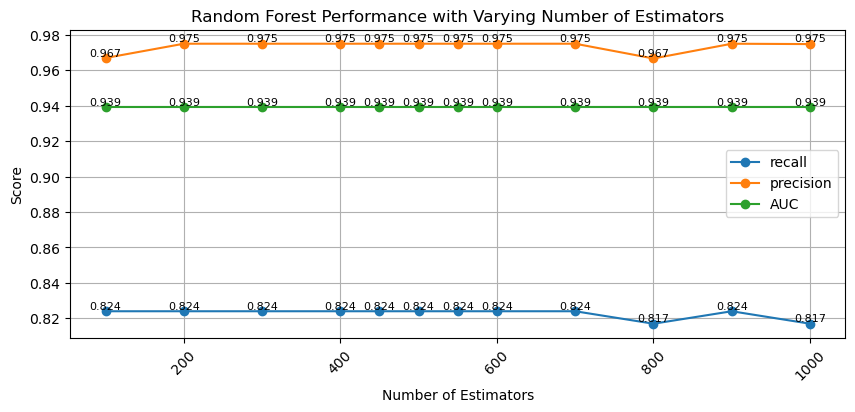

In [659]:
recall_score_list_3d = list(np.around(np.array(recall_score_list),3))
precision_score_list_3d = list(np.around(np.array(precision_score_list),3))
AUC_score_list_3d = list(np.around(np.array(AUC_score_list),3))

score_list = [recall_score_list_3d, precision_score_list_3d, AUC_score_list_3d]

fig = plt.figure(figsize =(10, 4))
plt.plot(n_estimators_list, recall_score_list, marker='o', label='recall')
plt.plot(n_estimators_list, precision_score_list, marker='o', label='precision')
plt.plot(n_estimators_list, AUC_score_list, marker='o', label='AUC')

plt.title('Random Forest Performance with Varying Number of Estimators')
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.xticks(rotation = 45)

for score in score_list: 
    for index in range(len(n_estimators_list)):
        plt.text(n_estimators_list[index], score[index],  
                 score[index], size=8, verticalalignment='bottom',
                 horizontalalignment='center')
    
plt.grid()
plt.legend()
plt.show()

#### 8.1.2 GridSearchCV Hyperparameter Tuning

In [689]:
from sklearn.model_selection import GridSearchCV

grid_of_params = {'criterion': ['gini'],
               'max_features': ['sqrt'],
               'n_estimators': [200],
               'max_depth': [None, 10, 12, 15],
               'min_samples_leaf': [1,2,3],
               'min_samples_split': [2,3,4]
                 }

grid_search = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=0), 
                           param_grid=grid_of_params, n_jobs=-1, cv=stratified_kfold, 
                           scoring='recall',verbose=5, error_score=0)
grid_result = grid_search.fit(X2, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.755 total time= 5.9min
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.798 total time= 5.9min
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.766 total time= 6.0min
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.787 total time= 6.0min
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.811 total time= 6.0min
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.811 total time= 6.0min
[CV 5/5]

In [690]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']

Best: 0.788555 using {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


In [700]:
# Comparison of tuned model vs baseline

performance_board_rf['Approach']='baseline'
score_board = performance_board_rf

RF = RandomForestClassifier(random_state = 0, n_jobs=-1, criterion='gini',
                           max_depth=15, max_features='sqrt', min_samples_leaf=1,
                           min_samples_split=2,  n_estimators=200)
RF.fit(X_train2, y_train)
y_pred_test = RF.predict(X_test2)
test_recall_score = recall_score(y_test, y_pred_test)
test_precision_score = precision_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average='macro')
y_pred_test_proba = RF.predict_proba(X_test2)[::,1]
test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

new_row = pd.DataFrame({'Model':'Random  Forest', 'Approach':'tuned model', 'Recall':test_recall_score, 
                        'Precision':test_precision_score, 
                        'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 8.2 Decision Tree Hyperparameter Tuning <a id='8.2'></a>

In [717]:
# Default paramters of the DT model
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [932]:
performance_board_dt = performance_board20.loc[[1]]
performance_board_dt['Approach']='baseline'
performance_board_dt

Model  Approach   Recall  Precision  F1 (Macro)       AUC
1  Decision Tree  baseline  0.78169   0.720779    0.874782  0.890592

#### 8.2.1 Manual Hyperparameter Tuning

In [721]:
# Tuning of criterion parameter

performance_board_dt['Approach']='baseline (criterion=gini)'

DT = DecisionTreeClassifier(random_state = 0, criterion='entropy')
DT.fit(X_train2, y_train)
y_pred_test = DT.predict(X_test2)
test_recall_score = recall_score(y_test, y_pred_test)
test_precision_score = precision_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average='macro')
y_pred_test_proba = DT.predict_proba(X_test2)[::,1]
test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

new_row = pd.DataFrame({'Model':'Decision Tree', 'Approach':'criterion=entropy', 'Recall':test_recall_score, 
                        'Precision':test_precision_score, 
                        'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
score_board = pd.concat([performance_board_dt, new_row]).reset_index(drop=True)
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))


In [818]:
# Tuning of max_features parameter

performance_board_dt['Approach']='baseline (max_features=auto)'
score_board = performance_board_dt

max_feature_list = ['sqrt', 'log2', None]

for maxfeature in max_feature_list:
    DT = DecisionTreeClassifier(random_state = 0, max_features=maxfeature)
    DT.fit(X_train3, y_train)
    y_pred_test = DT.predict(X_test3)
    test_recall_score = recall_score(y_test, y_pred_test)
    test_precision_score = precision_score(y_test, y_pred_test)
    test_f1_score = f1_score(y_test, y_pred_test, average='macro')
    y_pred_test_proba = DT.predict_proba(X_test3)[::,1]
    test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

    new_row = pd.DataFrame({'Model':'Decision Tree', 'Approach':'max_features='+str(maxfeature), 'Recall':test_recall_score, 
                            'Precision':test_precision_score, 
                            'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
    score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
    
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

In [821]:
# Tuning of max_depth parameter

performance_board_dt['Approach']='baseline (max_depth=None)'
score_board = performance_board_dt

max_depth_list = [1, 3, 5, 6, 7, 8 ,9, 10, 12, 15, 20, 50]

for maxdepth in max_depth_list:
    DT = DecisionTreeClassifier(random_state = 0, max_depth=maxdepth)
    DT.fit(X_train3, y_train)
    y_pred_test = DT.predict(X_test3)
    test_recall_score = recall_score(y_test, y_pred_test)
    test_precision_score = precision_score(y_test, y_pred_test)
    test_f1_score = f1_score(y_test, y_pred_test, average='macro')
    y_pred_test_proba = DT.predict_proba(X_test3)[::,1]
    test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

    new_row = pd.DataFrame({'Model':'Decision Tree', 'Approach':'max_depth='+str(maxdepth), 'Recall':test_recall_score, 
                            'Precision':test_precision_score, 
                            'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
    score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
    
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

In [822]:
# Tuning of min_samples_leaf parameter

performance_board_dt['Approach']='baseline (min_samples_leaf=1)'
score_board = performance_board_dt

min_samples_leaf_list = [2,3,4,5,6,7,8,9,10]

for MinSamplesLeaf in min_samples_leaf_list:
    DT = DecisionTreeClassifier(random_state = 0, min_samples_leaf=MinSamplesLeaf)
    DT.fit(X_train3, y_train)
    y_pred_test = DT.predict(X_test3)
    test_recall_score = recall_score(y_test, y_pred_test)
    test_precision_score = precision_score(y_test, y_pred_test)
    test_f1_score = f1_score(y_test, y_pred_test, average='macro')
    y_pred_test_proba = DT.predict_proba(X_test3)[::,1]
    test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

    new_row = pd.DataFrame({'Model':'Decision Tree', 'Approach':'min_samples_leaf='+str(MinSamplesLeaf), 'Recall':test_recall_score, 
                            'Precision':test_precision_score, 
                            'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
    score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
    
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

In [823]:
# Tuning of min_samples_split parameter

performance_board_dt['Approach']='baseline (min_samples_split=2)'
score_board = performance_board_dt

min_samples_split_list = [3, 4, 5, 6, 7,  8]

for MinSamplesSplit in min_samples_split_list:
    DT = DecisionTreeClassifier(random_state = 0, min_samples_split=MinSamplesSplit)
    DT.fit(X_train3, y_train)
    y_pred_test = DT.predict(X_test3)
    test_recall_score = recall_score(y_test, y_pred_test)
    test_precision_score = precision_score(y_test, y_pred_test)
    test_f1_score = f1_score(y_test, y_pred_test, average='macro')
    y_pred_test_proba = DT.predict_proba(X_test3)[::,1]
    test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

    new_row = pd.DataFrame({'Model':'Decision Tree', 'Approach':'min_samples_leaf='+str(MinSamplesSplit), 'Recall':test_recall_score, 
                            'Precision':test_precision_score, 
                            'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
    score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
    
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

#### 8.2.2 GridSearchCV Hyperparameter Tuning

In [825]:
from sklearn.model_selection import GridSearchCV

grid_of_params = {'criterion': ['entropy'],
               'max_features': [None, 'sqrt'],
               'max_depth': [None,4,5,6,7,8,9],
               'min_samples_leaf': [1,2,3,4,5],
               'min_samples_split': [2,3,4]
                 }

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), 
                           param_grid=grid_of_params, n_jobs=-1, cv=stratified_kfold, 
                           scoring='recall',verbose=5, error_score=0)
grid_result = grid_search.fit(X3, y)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV 2/5] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.734 total time=   9.9s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.768 total time=   9.8s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3;, score=0.745 total time=   9.9s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.779 total time=  10.2s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.734 total time=  10.9s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3;, score=0.734 total time=  10.8s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, min_sampl

In [826]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']

Best: 0.771557 using {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [934]:
# Comparison of tuned model vs baseline

performance_board_dt['Approach']='baseline'
score_board = performance_board_dt

DT = DecisionTreeClassifier(random_state = 0, criterion='entropy', 
                           max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=2)
DT.fit(X_train3, y_train)
y_pred_test = DT.predict(X_test3)
test_recall_score = recall_score(y_test, y_pred_test)
test_precision_score = precision_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average='macro')
y_pred_test_proba = DT.predict_proba(X_test3)[::,1]
test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

new_row = pd.DataFrame({'Model':'Decision Tree', 'Approach':'Tuned model', 'Recall':test_recall_score, 
                        'Precision':test_precision_score, 
                        'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
    
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

### 8.3 Logistic Regression Hyperparameter Tuning <a id='8.3'></a>

In [831]:
# Default paramters of the DT model
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [845]:
performance_board_lr = performance_board20.loc[[3]]
performance_board_lr['Approach']='baseline'
performance_board_lr


Model  Approach    Recall  Precision  F1 (Macro)       AUC
3  Logistic Regression  baseline  0.584507   0.873684    0.850002  0.965895

#### 8.3.1 Manual Hyperparameter Tuning

In [846]:
# Tuning of penalty and solver parameters (solver=lbfgs with penalties None, l2)

performance_board_lr['Approach']='baseline (solver="lbfgs", penalty=l2)'
score_board = performance_board_lr

LR = LogisticRegression(random_state = 0, max_iter=1000, solver='lbfgs', penalty='none', n_jobs=-1)
LR.fit(X_train4, y_train)
y_pred_test = LR.predict(X_test4)
test_recall_score = recall_score(y_test, y_pred_test)
test_precision_score = precision_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average='macro')
y_pred_test_proba = LR.predict_proba(X_test4)[::,1]
test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

new_row = pd.DataFrame({'Model':'Logistic Regression', 'Approach':'(solver="lbfgs", penalty=None)'
                        , 'Recall':test_recall_score, 
                        'Precision':test_precision_score, 
                        'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
    
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))


In [870]:
parameter_sets = [{'solver':'lbfgs', 'penalty':'none'},
                 {'solver':'lbfgs', 'penalty':'l2'},
                 {'solver':'liblinear', 'penalty':'l1'},
                 {'solver':'liblinear', 'penalty':'l2'}, 
                 {'solver':'newton-cg', 'penalty':'l2'},
                 {'solver':'newton-cg', 'penalty':'none'},
                  {'solver':'sag', 'penalty':'l2'},
                 {'solver':'sag', 'penalty':'none'},
                {'solver':'saga', 'penalty':'l2'},
                 {'solver':'saga', 'penalty':'none'},
                {'solver':'saga', 'penalty':'l1'}]
                    
# parameter_sets = [{'solver':'saga', 'penalty':'elasticnet'}]         


performance_board_lr['Approach']='baseline (solver="lbfgs", penalty=l2)'
score_board = performance_board_lr

for parameter_set in parameter_sets:
    LR = LogisticRegression(random_state=0, max_iter=100000, 
                            solver=parameter_set['solver'], penalty=parameter_set['penalty'],n_jobs=-1)
    LR.fit(X_train4, y_train)
    y_pred_test = LR.predict(X_test4)
    test_recall_score = recall_score(y_test, y_pred_test)
    test_precision_score = precision_score(y_test, y_pred_test)
    test_f1_score = f1_score(y_test, y_pred_test, average='macro')
    y_pred_test_proba = LR.predict_proba(X_test4)[::,1]
    test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

    new_row = pd.DataFrame({'Model':'Logistic Regression', 'Approach':'solver='+ parameter_set['solver']+', penalty= '+
                            parameter_set['penalty']
                            , 'Recall':test_recall_score, 
                            'Precision':test_precision_score, 
                            'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
    score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
    
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


In [880]:
l1_ratio_list = np.linspace(0.1,0.9,9)

performance_board_lr['Approach']='baseline (solver="lbfgs", penalty=l2)'
score_board = performance_board_lr

for L1Ratio in l1_ratio_list:
    LR = LogisticRegression(random_state=0, max_iter=100000, 
                            solver='saga', penalty='elasticnet', l1_ratio=L1Ratio, n_jobs=-1)
    LR.fit(X_train4, y_train)
    y_pred_test = LR.predict(X_test4)
    test_recall_score = recall_score(y_test, y_pred_test)
    test_precision_score = precision_score(y_test, y_pred_test)
    test_f1_score = f1_score(y_test, y_pred_test, average='macro')
    y_pred_test_proba = LR.predict_proba(X_test4)[::,1]
    test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

    new_row = pd.DataFrame({'Model':'Logistic Regression', 'Approach':'solver=saga, penalty=elasticnet, l1_ratio= '+str(L1Ratio)
                            , 'Recall':test_recall_score, 
                            'Precision':test_precision_score, 
                            'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
    score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
    
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

In [886]:
manual_grid = [{'solver':'saga', 'penalty':'l1', 'l1_ratio': None},
                {'solver':'saga', 'penalty':'none', 'l1_ratio': None},
              {'solver':'sag', 'penalty':'l2', 'l1_ratio': None},
              {'solver':'saga', 'penalty':'elasticnet', 'l1_ratio':0.9},
              {'solver':'saga', 'penalty':'elasticnet', 'l1_ratio':0.9}]

c_list=[0.001, 0.1, 1, 10, 100]

for parameter in manual_grid:
    for c_value in c_list:
        LR = LogisticRegression(random_state=0, max_iter=100000, 
                            solver=parameter['solver'], penalty=parameter['penalty'],
                                l1_ratio=parameter['l1_ratio'], n_jobs=-1)
        LR.fit(X_train4, y_train)
        y_pred_test = LR.predict(X_test4)
        test_recall_score = recall_score(y_test, y_pred_test)
        test_precision_score = precision_score(y_test, y_pred_test)
        test_f1_score = f1_score(y_test, y_pred_test, average='macro')
        y_pred_test_proba = LR.predict_proba(X_test4)[::,1]
        test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

        new_row = pd.DataFrame({'Model':'Logistic Regression', 
                                'Approach':'solver='+ parameter['solver']+', penalty= '+
                                parameter['penalty']+', l1_ratio= '+str(parameter['l1_ratio'])+', C='+str(c_value)
                                , 'Recall':test_recall_score, 
                                'Precision':test_precision_score, 
                                'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
        score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
        
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

#### 8.3.2 GridSearch Hyperparameter Tuning

In [889]:
from sklearn.model_selection import GridSearchCV

grid_of_params = {'solver': ['sag', 'saga'], 'penalty': ['l1', 'l2', 'none'], 'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=LogisticRegression(random_state=0, max_iter=100000, n_jobs=-1), 
                           param_grid=grid_of_params, n_jobs=-1, cv=stratified_kfold, 
                           scoring='recall',verbose=5, error_score=0)
grid_result = grid_search.fit(X4, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 5/5] END ....C=0.01, penalty=l1, solver=sag;, score=0.000 total time=   0.6s
[CV 3/5] END ....C=0.01, penalty=l1, solver=sag;, score=0.000 total time=   0.6s
[CV 2/5] END ....C=0.01, penalty=l1, solver=sag;, score=0.000 total time=   0.6s
[CV 1/5] END ....C=0.01, penalty=l1, solver=sag;, score=0.000 total time=   0.6s
[CV 4/5] END ....C=0.01, penalty=l1, solver=sag;, score=0.000 total time=   0.6s
[CV 1/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.589 total time= 1.5min
[CV 3/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.585 total time= 1.8min
[CV 2/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.553 total time= 1.9min
[CV 4/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.526 total time= 2.7min
[CV 1/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.526 total time= 2.7min
[CV 5/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.526 total time= 2.8min
[CV 3/5] END ...C=0.01, penalty=l1, solver=saga

/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.579 total time= 2.0min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.547 total time= 2.0min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.589 total time= 2.9min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.585 total time= 3.4min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.553 total time= 3.5min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.579 total time= 3.5min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.547 total time= 3.4min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ..C=0.01, penalty=none, solver=sag;, score=0.642 total time= 3.7min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ..C=0.01, penalty=none, solver=sag;, score=0.585 total time= 4.1min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ..C=0.01, penalty=none, solver=sag;, score=0.553 total time= 4.5min
[CV 1/5] END .....C=0.1, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 2/5] END .....C=0.1, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 3/5] END .....C=0.1, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 4/5] END .....C=0.1, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 5/5] END .....C=0.1, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 4/5] END ..C=0.01, penalty=none, solver=sag;, score=0.642 total time= 3.9min
[CV 5/5] END ..C=0.01, penalty=none, solver=sag;, score=0.579 total time= 3.8min
[CV 1/5] END .C=0.01, penalty=none, solver=saga;, score=0.632 total time= 5.6min
[CV 3/5] END .C=0.01, penalty=none, solver=saga;, score=0.585 total time= 6.0min
[CV 4/5] END .C=0.01, penalty=none, solver=saga;, score=0.642 total time= 6.0min
[CV 2/5] END .C=0.01, penalty=none, solver=saga;, score=0.553 total time= 6.6min
[CV 1/5] END ....C=0.1, pena

/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.558 total time= 3.3min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.558 total time= 6.0min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.632 total time= 5.0min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.553 total time= 5.8min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.585 total time= 5.4min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ...C=0.1, penalty=none, solver=sag;, score=0.642 total time= 3.7min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.632 total time= 5.7min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ...C=0.1, penalty=none, solver=sag;, score=0.585 total time= 4.1min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.568 total time= 5.5min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ...C=0.1, penalty=none, solver=sag;, score=0.553 total time= 4.6min
[CV 1/5] END .......C=1, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 2/5] END .......C=1, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 3/5] END .......C=1, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 4/5] END .......C=1, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 5/5] END .......C=1, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 4/5] END ...C=0.1, penalty=none, solver=sag;, score=0.642 total time= 3.7min
[CV 5/5] END ...C=0.1, penalty=none, solver=sag;, score=0.579 total time= 3.6min
[CV 1/5] END ..C=0.1, penalty=none, solver=saga;, score=0.632 total time= 5.1min
[CV 3/5] END ..C=0.1, penalty=none, solver=saga;, score=0.585 total time= 5.4min
[CV 4/5] END ..C=0.1, penalty=none, solver=saga;, score=0.642 total time= 5.4min
[CV 5/5] END ..C=0.1, penalty=none, solver=saga;, score=0.579 total time= 5.2min
[CV 2/5] END ..C=0.1, penalt

/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.579 total time= 6.3min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ......C=10, penalty=l2, solver=sag;, score=0.579 total time= 3.5min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l2, solver=saga;, score=0.632 total time= 5.0min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ....C=10, penalty=none, solver=sag;, score=0.642 total time= 3.1min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l2, solver=saga;, score=0.585 total time= 5.3min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l2, solver=saga;, score=0.553 total time= 5.9min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l2, solver=saga;, score=0.642 total time= 5.3min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l2, solver=saga;, score=0.579 total time= 5.2min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ....C=10, penalty=none, solver=sag;, score=0.553 total time= 3.7min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ....C=10, penalty=none, solver=sag;, score=0.585 total time= 3.4min
[CV 1/5] END .....C=100, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 2/5] END .....C=100, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 3/5] END .....C=100, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 4/5] END .....C=100, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 5/5] END .....C=100, penalty=l1, solver=sag;, score=0.000 total time=   0.1s
[CV 4/5] END ....C=10, penalty=none, solver=sag;, score=0.642 total time= 3.4min
[CV 5/5] END ....C=10, penalty=none, solver=sag;, score=0.579 total time= 3.3min
[CV 1/5] END ...C=10, penalty=none, solver=saga;, score=0.632 total time= 4.8min
[CV 5/5] END ...C=10, penalty=none, solver=saga;, score=0.579 total time= 5.0min
[CV 3/5] END ...C=10, penalty=none, solver=saga;, score=0.585 total time= 5.1min
[CV 4/5] END ...C=10, penalty=none, solver=saga;, score=0.642 total time= 5.1min
[CV 2/5] END ...C=10, penalt

/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.579 total time= 6.6min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END .....C=100, penalty=l2, solver=sag;, score=0.579 total time= 4.0min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l2, solver=saga;, score=0.632 total time= 5.5min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ...C=100, penalty=none, solver=sag;, score=0.642 total time= 3.3min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l2, solver=saga;, score=0.585 total time= 5.8min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l2, solver=saga;, score=0.642 total time= 5.8min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l2, solver=saga;, score=0.553 total time= 6.4min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l2, solver=saga;, score=0.579 total time= 5.6min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ...C=100, penalty=none, solver=sag;, score=0.553 total time= 4.1min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ...C=100, penalty=none, solver=sag;, score=0.585 total time= 3.6min
[CV 4/5] END ...C=100, penalty=none, solver=sag;, score=0.642 total time= 3.3min
[CV 5/5] END ...C=100, penalty=none, solver=sag;, score=0.579 total time= 3.2min
[CV 1/5] END ..C=100, penalty=none, solver=saga;, score=0.632 total time= 4.2min
[CV 3/5] END ..C=100, penalty=none, solver=saga;, score=0.585 total time= 4.4min
[CV 4/5] END ..C=100, penalty=none, solver=saga;, score=0.642 total time= 4.4min
[CV 5/5] END ..C=100, penalty=none, solver=saga;, score=0.579 total time= 4.2min
[CV 2/5] END ..C=100, penalty=none, solver=saga;, score=0.553 total time= 4.8min


/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklear

In [890]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']

Best: 0.600291 using {'C': 0.01, 'penalty': 'none', 'solver': 'sag'}


In [936]:
# Comparison of tuned model vs baseline

performance_board_lr['Approach']='baseline'
score_board = performance_board_lr

LR = LogisticRegression(C=0.01, penalty='none', solver='sag', n_jobs=-1, max_iter=10000)
LR.fit(X_train, y_train)
y_pred_test = LR.predict(X_test)
test_recall_score = recall_score(y_test, y_pred_test)
test_precision_score = precision_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test, average='macro')
y_pred_test_proba = LR.predict_proba(X_test)[::,1]
test_auc_score = roc_auc_score(y_test, y_pred_test_proba)

new_row = pd.DataFrame({'Model':'Logistic Resgression', 'Approach':'Tuned model', 'Recall':test_recall_score, 
                        'Precision':test_precision_score, 
                        'F1 (Macro)':test_f1_score, 'AUC': test_auc_score}, index=[0])
score_board = pd.concat([score_board, new_row]).reset_index(drop=True)
    
display(score_board.sort_index().sort_values(by=['Model']).style.hide(axis='index'))

/Users/hayriefeatakul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


## Conclusion
- Exploring and removing the duplicate 1081 transaction improved the performance of most of the models
- Amount feature found to be correlated with the existing features in the dataset
- Due to the population of extreme outliers among the most influential features resulted a significant information lost which yielded poor predictive model performance 
- Almost all oversampling and undersampling methods resulted noticable increase in recall but big lossess in precision performance
- Instance Hardeness Threshold oversampling method worked considerably well for Logistic Regression (increase over 15% in recall with only 5% drop on precision) which may be further experimented in future
- Among the Ensemble learning methods, Balanced Bagging Classifier with K-means Smote oversampling resulted competing performance with other baseline models (80.2% recall, 95.8% precision, 92.9% AUC) 
- Most of the of feature selection techniques implemented yielded the same feature improtance ranking
- Random Forest ended up benefiting from roughly 1/3 of the data versus Decision Tree ended up benefiting and using almost all the features 
- Hyperparameter tuning activity resulted further improvements in model prediction accuracy across all 3 models 
- Throughout the notebook there are notable improvements achieved on each model and below is the summary: 
    - Random Forest: >12% increase in recall, >3.5% increase in precision and 4% increase in AUC
    - Decision Tree: >4% increase in recall, 12% increase in precision and 3% increase in AUC
    - Logistic Regression: 0.5% increase in recall, 2% increase in precision and 4% increase in AUC
- In the future iterations of this notebook, the other fields that can be explored would be stakced ensemle methods and deeplearning